In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import geopandas

The World Happiness Report is a landmark survey of the state of global happiness. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

In [436]:
df = pd.read_csv("world-happiness-report.csv")
df

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008        3.724               7.370           0.451   
1     Afghanistan  2009        4.402               7.540           0.552   
2     Afghanistan  2010        4.758               7.647           0.539   
3     Afghanistan  2011        3.832               7.620           0.521   
4     Afghanistan  2012        3.783               7.705           0.521   
...           ...   ...          ...                 ...             ...   
1944     Zimbabwe  2016        3.735               7.984           0.768   
1945     Zimbabwe  2017        3.638               8.016           0.754   
1946     Zimbabwe  2018        3.616               8.049           0.775   
1947     Zimbabwe  2019        2.694               7.950           0.759   
1948     Zimbabwe  2020        3.160               7.829           0.717   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                                50.80                         0.718   
1                                51.20                         0.679   
2                                51.60                         0.600   
3                                51.92                         0.496   
4                                52.24                         0.531   
...                                ...                           ...   
1944                             54.40                         0.733   
1945                             55.00                         0.753   
1946                             55.60                         0.763   
1947                             56.20                         0.632   
1948                             56.80                         0.643   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
0          0.168                      0.882            0.518            0.258  
1          0.190                      0.850            0.584            0.237  
2          0.121                      0.707            0.618            0.275  
3          0.162                      0.731            0.611            0.267  
4          0.236                      0.776            0.710            0.268  
...          ...                        ...              ...              ...  
1944      -0.095                      0.724            0.738            0.209  
1945      -0.098                      0.751            0.806            0.224  
1946      -0.068                      0.844            0.710            0.212  
1947      -0.064                      0.831            0.716            0.235  
1948      -0.009                      0.789            0.703            0.346  

[1949 rows x 11 columns]

# Data Understanding

Ladder score: Happiness score or subjective well_being.

Logged GDP per capita: The GDP-per-capita time series using countryspecific forecasts of real GDP growth. 

Social suppırt: Social support refers to assistance or support provided by members of social networks to an individual.

Healthy life expectancy: Healthy life expectancy is the average life in good health 

The Corruption Perceptions Index (CPI) is an index which ranks countries "by their perceived levels of public sector corruption, as determined by expert assessments and opinion surveys." The CPI generally defines corruption as an "abuse of entrusted power for private gain"

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [438]:
df.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [439]:
df.nunique()

Country name                         166
year                                  16
Life Ladder                         1553
Log GDP per capita                  1500
Social support                       455
Healthy life expectancy at birth     828
Freedom to make life choices         535
Generosity                           609
Perceptions of corruption            572
Positive affect                      431
Negative affect                      374
dtype: int64

In [440]:
df.duplicated().sum()

0

In [441]:
df.describe()

year  Life Ladder  Log GDP per capita  Social support  \
count  1949.000000  1949.000000         1913.000000     1936.000000   
mean   2013.216008     5.466705            9.368453        0.812552   
std       4.166828     1.115711            1.154084        0.118482   
min    2005.000000     2.375000            6.635000        0.290000   
25%    2010.000000     4.640000            8.464000        0.749750   
50%    2013.000000     5.386000            9.460000        0.835500   
75%    2017.000000     6.283000           10.353000        0.905000   
max    2020.000000     8.019000           11.648000        0.987000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1894.000000                   1917.000000   
mean                          63.359374                      0.742558   
std                            7.510245                      0.142093   
min                           32.300000                      0.258000   
25%                           58.685000                      0.647000   
50%                           65.200000                      0.763000   
75%                           68.590000                      0.856000   
max                           77.100000                      0.985000   

        Generosity  Perceptions of corruption  Positive affect  \
count  1860.000000                1839.000000      1927.000000   
mean      0.000103                   0.747125         0.710003   
std       0.162215                   0.186789         0.107100   
min      -0.335000                   0.035000         0.322000   
25%      -0.113000                   0.690000         0.625500   
50%      -0.025500                   0.802000         0.722000   
75%       0.091000                   0.872000         0.799000   
max       0.698000                   0.983000         0.944000   

       Negative affect  
count      1933.000000  
mean          0.268544  
std           0.085168  
min           0.083000  
25%           0.206000  
50%           0.258000  
75%           0.320000  
max           0.705000

In [442]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

# Data Preparation

In [443]:
def outlier(df, i):
    return df[(df[i] > df[i].mean() + 3*df[i].std()) |(df[i] < df[i].mean() - 3*df[i].std())]

In [444]:
def outlier2(df, i):
    IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
    upper_bond = df[i].quantile(0.75) + 1.5*IQR
    lower_bond = df[i].quantile(0.25) - 1.5*IQR
    return df[(df[i]>upper_bond) | (df[i]<lower_bond)]

<Axes: >

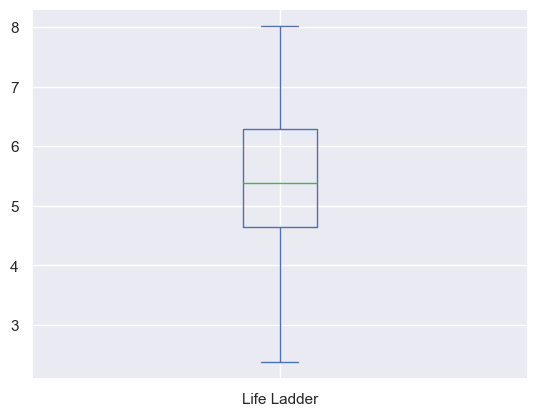

In [445]:
df['Life Ladder'].plot(kind='box')

In [446]:
outlier(df, 'Life Ladder')

Empty DataFrame
Columns: [Country name, year, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect]
Index: []

In [447]:
outlier2(df, 'Life Ladder')

Empty DataFrame
Columns: [Country name, year, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect]
Index: []

<Axes: >

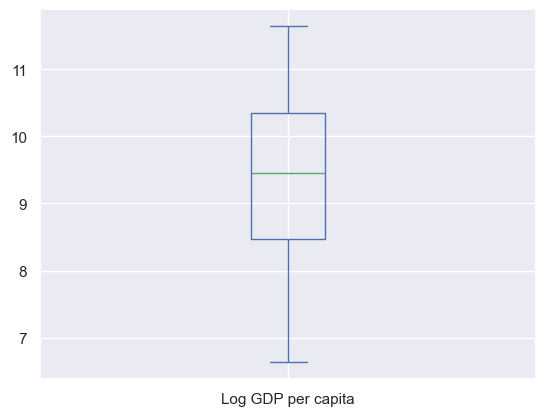

In [448]:
df['Log GDP per capita'].plot(kind='box')

In [449]:
outlier(df, 'Log GDP per capita')

Empty DataFrame
Columns: [Country name, year, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect]
Index: []

In [450]:
outlier2(df, 'Log GDP per capita')

Empty DataFrame
Columns: [Country name, year, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect]
Index: []

<Axes: >

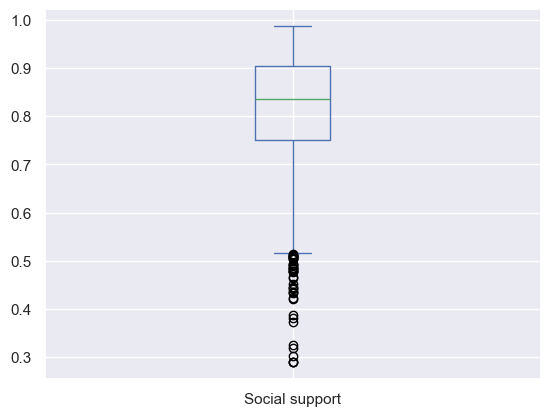

In [451]:
df['Social support'].plot(kind='box')

In [452]:
outlier(df, 'Social support')

Country name  year  Life Ladder  Log GDP per capita  \
0              Afghanistan  2008        3.724               7.370   
11             Afghanistan  2019        2.375               7.697   
163                  Benin  2006        3.330               7.866   
164                  Benin  2008        3.667               7.915   
169                  Benin  2015        3.625               7.988   
171                  Benin  2017        4.853               8.021   
173                  Benin  2019        4.976               8.098   
258                Burundi  2008        3.563               6.719   
259                Burundi  2009        3.792               6.723   
260                Burundi  2011        3.706               6.748   
310   Central African Rep.  2011        3.678               7.125   
311   Central African Rep.  2016        2.693               6.785   
312   Central African Rep.  2017        3.476               6.817   
1313              Pakistan  2008        4.414               8.271   
1727                  Togo  2006        3.202               7.078   
1728                  Togo  2008        2.808               7.052   
1729                  Togo  2011        2.936               7.146   
1730                  Togo  2014        2.839               7.247   

      Social support  Healthy life expectancy at birth  \
0              0.451                             50.80   
11             0.420                             52.40   
163            0.445                             50.10   
164            0.382                             50.90   
169            0.434                             53.10   
171            0.436                             53.90   
173            0.442                             54.70   
258            0.291                             49.02   
259            0.326                             49.66   
260            0.422                             50.68   
310            0.387                             43.08   
311            0.290                             44.90   
312            0.320                             45.20   
1313           0.373                             55.40   
1727           0.435                             49.26   
1728           0.291                             50.18   
1729           0.303                             51.58   
1730           0.444                             53.02   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
0                            0.718       0.168                      0.882   
11                           0.394      -0.108                      0.924   
163                          0.580      -0.011                      0.790   
164                          0.709      -0.004                      0.825   
169                          0.733      -0.027                      0.850   
171                          0.727      -0.065                      0.767   
173                          0.770      -0.016                      0.698   
258                          0.260      -0.019                      0.860   
259                          0.427      -0.019                      0.718   
260                          0.490      -0.062                      0.677   
310                          0.780      -0.016                      0.834   
311                          0.624       0.033                      0.859   
312                          0.645       0.073                      0.890   
1313                         0.335       0.100                      0.848   
1727                         0.628      -0.007                      0.850   
1728                         0.287      -0.055                      0.932   
1729                         0.584      -0.070                      0.832   
1730                         0.663      -0.085                      0.795   

      Positive affect  Negative affect  
0               0.518            0.258  
11              0.351            0.502  
163         

In [453]:
outlier2(df, 'Social support')

Country name  year  Life Ladder  Log GDP per capita  \
0              Afghanistan  2008        3.724               7.370   
5              Afghanistan  2013        3.572               7.725   
9              Afghanistan  2017        2.662               7.697   
10             Afghanistan  2018        2.694               7.692   
11             Afghanistan  2019        2.375               7.697   
119             Bangladesh  2007        4.607               7.839   
120             Bangladesh  2008        5.052               7.886   
163                  Benin  2006        3.330               7.866   
164                  Benin  2008        3.667               7.915   
165                  Benin  2011        3.870               7.904   
168                  Benin  2014        3.347               7.998   
169                  Benin  2015        3.625               7.988   
170                  Benin  2016        4.007               7.993   
171                  Benin  2017        4.853               8.021   
172                  Benin  2018        5.820               8.059   
173                  Benin  2019        4.976               8.098   
174                  Benin  2020        4.408               8.102   
258                Burundi  2008        3.563               6.719   
259                Burundi  2009        3.792               6.723   
260                Burundi  2011        3.706               6.748   
262                Burundi  2018        3.775               6.635   
309   Central African Rep.  2010        3.568               7.091   
310   Central African Rep.  2011        3.678               7.125   
311   Central African Rep.  2016        2.693               6.785   
312   Central African Rep.  2017        3.476               6.817   
314                   Chad  2007        4.141               7.359   
596                Georgia  2011        4.203               9.263   
738                  India  2012        4.720               8.428   
1044                Malawi  2014        4.563               6.935   
1045                Malawi  2015        3.868               6.935   
1312              Pakistan  2007        5.671               8.277   
1313              Pakistan  2008        4.414               8.271   
1316              Pakistan  2011        5.267               8.276   
1456                Rwanda  2008        4.363               7.239   
1466                Rwanda  2019        3.268               7.708   
1668                 Syria  2015        3.462               8.442   
1727                  Togo  2006        3.202               7.078   
1728                  Togo  2008        2.808               7.052   
1729                  Togo  2011        2.936               7.146   
1730                  Togo  2014        2.839               7.247   
1731                  Togo  2015        3.768               7.277   
1732                  Togo  2016        3.879               7.306   
1733                  Togo  2017        4.361               7.324   

      Social support  Healthy life expectancy at birth  \
0              0.451                             50.80   
5              0.484                             52.56   
9              0.491                             52.80   
10             0.508                             52.60   
11             0.420                             52.40   
119            0.514                             59.44   
120            0.467                             59.86   
163            0.445                             50.10   
164            0.382                             50.90   
165            0.477                             51.98   
168            0.506                             52.82   
169            0.434                             53.10   
170            0.493                             53.50   
171            0.436                             53.90   
172            0.504                             54.30   
173            0.442                             

<Axes: >

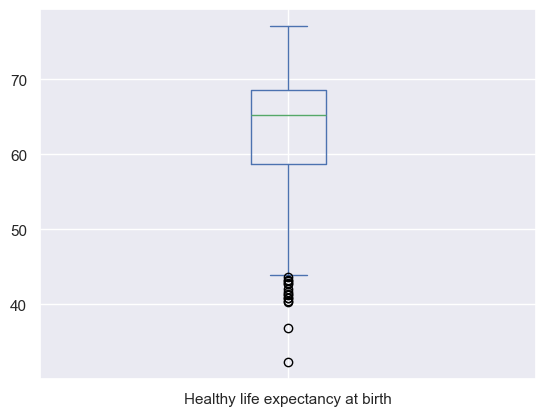

In [454]:
df['Healthy life expectancy at birth'].plot(kind='box')

In [455]:
outlier(df, 'Healthy life expectancy at birth')

Country name  year  Life Ladder  Log GDP per capita  Social support  \
675          Haiti  2008        3.846               7.417           0.679   
676          Haiti  2010        3.766               7.384           0.554   
677          Haiti  2011        4.845               7.423           0.567   
1509  Sierra Leone  2006        3.628               7.136           0.561   
1634     Swaziland  2011        4.867               8.940           0.837   

      Healthy life expectancy at birth  Freedom to make life choices  \
675                             40.380                         0.465   
676                             32.300                         0.373   
677                             36.860                         0.413   
1509                            40.300                         0.679   
1634                            40.808                         0.607   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
675        0.261                      0.812            0.608            0.256  
676        0.216                      0.848            0.555            0.293  
677        0.243                      0.682            0.625            0.245  
1509       0.101                      0.836            0.505            0.381  
1634      -0.067                      0.917            0.821            0.251

In [456]:
outlier2(df, 'Healthy life expectancy at birth')

Country name  year  Life Ladder  Log GDP per capita  \
308   Central African Rep.  2007        4.160               6.987   
309   Central African Rep.  2010        3.568               7.091   
310   Central African Rep.  2011        3.678               7.125   
313                   Chad  2006        3.435               7.360   
314                   Chad  2007        4.141               7.359   
675                  Haiti  2008        3.846               7.417   
676                  Haiti  2010        3.766               7.384   
677                  Haiti  2011        4.845               7.423   
678                  Haiti  2012        4.413               7.437   
1509          Sierra Leone  2006        3.628               7.136   
1510          Sierra Leone  2007        3.585               7.187   
1511          Sierra Leone  2008        2.997               7.215   
1634             Swaziland  2011        4.867               8.940   
1934              Zimbabwe  2006        3.826               7.711   
1935              Zimbabwe  2007        3.280               7.666   

      Social support  Healthy life expectancy at birth  \
308            0.532                            40.900   
309            0.483                            42.700   
310            0.387                            43.080   
313            0.724                            43.180   
314            0.479                            43.660   
675            0.679                            40.380   
676            0.554                            32.300   
677            0.567                            36.860   
678            0.749                            41.420   
1509           0.561                            40.300   
1510           0.686                            41.200   
1511           0.591                            42.100   
1634           0.837                            40.808   
1934           0.822                            41.580   
1935           0.828                            42.860   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
308                          0.663       0.081                      0.782   
309                          0.690      -0.036                      0.845   
310                          0.780      -0.016                      0.834   
313                          0.306       0.028                      0.961   
314                          0.295      -0.011                      0.874   
675                          0.465       0.261                      0.812   
676                          0.373       0.216                      0.848   
677                          0.413       0.243                      0.682   
678                          0.482       0.289                      0.717   
1509                         0.679       0.101                      0.836   
1510                         0.720       0.248                      0.830   
1511                         0.716       0.148                      0.925   
1634                         0.607      -0.067                      0.917   
1934                         0.431      -0.076                      0.905   
1935                         0.456      -0.082                      0.946   

      Positive affect  Negative affect  
308             0.568            0.330  
309             0.523            0.257  
310             0.524            0.277  
313             0.580            0.263  
314             0.614            0.245  
675             0.608            0.256  
676             0.555            0.293  
677             0.625            0.245  
678             0.593            0.284  
1509            0.505            0.381  
1510            0.582            0.290  
1511            0.534            0.370  
1634            0.821            0.251  
1934            0.715            0.297  
1935            0.661            0.265

In [457]:
Q1 = df['Healthy life expectancy at birth'].quantile(0.25)
Q3 = df['Healthy life expectancy at birth'].quantile(0.75)
IQR = Q3 - Q1
df['Healthy life expectancy at birth'] = np.where((df['Healthy life expectancy at birth'] < Q1 - 1.5 * IQR), Q1 - 1.5 * IQR, df['Healthy life expectancy at birth'])
df['Healthy life expectancy at birth'] = np.where((df['Healthy life expectancy at birth'] >Q3 + 1.5 * IQR), Q3 + 1.5 * IQR, df['Healthy life expectancy at birth'])

<Axes: >

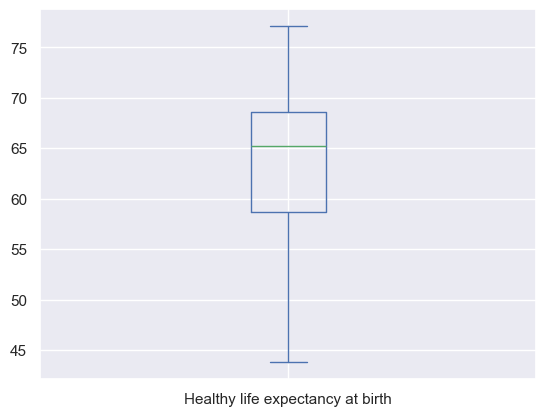

In [458]:
df['Healthy life expectancy at birth'].plot(kind='box')

<Axes: >

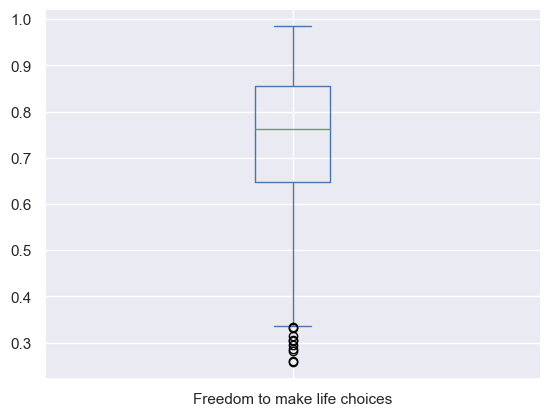

In [459]:
df[['Freedom to make life choices']].plot(kind='box')

In [460]:
outlier(df, 'Freedom to make life choices')

Country name  year  Life Ladder  Log GDP per capita  \
194   Bosnia and Herzegovina  2009        4.963               9.296   
258                  Burundi  2008        3.563               6.719   
313                     Chad  2006        3.435               7.360   
314                     Chad  2007        4.141               7.359   
423                     Cuba  2006        5.418                 NaN   
682                    Haiti  2016        3.352               7.477   
778                     Iraq  2012        4.660               9.246   
1728                    Togo  2008        2.808               7.052   

      Social support  Healthy life expectancy at birth  \
194            0.735                           66.4800   
258            0.291                           49.0200   
313            0.724                           43.8275   
314            0.479                           43.8275   
423            0.970                           68.4400   
682            0.584                           55.3000   
778            0.730                           59.1200   
1728           0.291                           50.1800   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
194                          0.258      -0.026                      0.959   
258                          0.260      -0.019                      0.860   
313                          0.306       0.028                      0.961   
314                          0.295      -0.011                      0.874   
423                          0.281         NaN                        NaN   
682                          0.304       0.291                      0.839   
778                          0.315      -0.020                      0.789   
1728                         0.287      -0.055                      0.932   

      Positive affect  Negative affect  
194             0.572            0.390  
258             0.440            0.253  
313             0.580            0.263  
314             0.614            0.245  
423             0.647            0.277  
682             0.553            0.367  
778             0.423            0.449  
1728            0.362            0.379

In [461]:
outlier2(df, "Freedom to make life choices")

Country name  year  Life Ladder  Log GDP per capita  \
194   Bosnia and Herzegovina  2009        4.963               9.296   
196   Bosnia and Herzegovina  2011        4.995               9.333   
258                  Burundi  2008        3.563               6.719   
313                     Chad  2006        3.435               7.360   
314                     Chad  2007        4.141               7.359   
423                     Cuba  2006        5.418                 NaN   
682                    Haiti  2016        3.352               7.477   
778                     Iraq  2012        4.660               9.246   
1028              Madagascar  2008        4.640               7.439   
1728                    Togo  2008        2.808               7.052   

      Social support  Healthy life expectancy at birth  \
194            0.735                           66.4800   
196            0.725                           66.7400   
258            0.291                           49.0200   
313            0.724                           43.8275   
314            0.479                           43.8275   
423            0.970                           68.4400   
682            0.584                           55.3000   
778            0.730                           59.1200   
1028           0.776                           54.9200   
1728           0.291                           50.1800   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
194                          0.258      -0.026                      0.959   
196                          0.333      -0.035                      0.925   
258                          0.260      -0.019                      0.860   
313                          0.306       0.028                      0.961   
314                          0.295      -0.011                      0.874   
423                          0.281         NaN                        NaN   
682                          0.304       0.291                      0.839   
778                          0.315      -0.020                      0.789   
1028                         0.332      -0.099                      0.773   
1728                         0.287      -0.055                      0.932   

      Positive affect  Negative affect  
194             0.572            0.390  
196             0.596            0.326  
258             0.440            0.253  
313             0.580            0.263  
314             0.614            0.245  
423             0.647            0.277  
682             0.553            0.367  
778             0.423            0.449  
1028            0.614            0.215  
1728            0.362            0.379

In [462]:
Q1 = df['Freedom to make life choices'].quantile(0.25)
Q3 = df['Freedom to make life choices'].quantile(0.75)
IQR = Q3 - Q1
df['Freedom to make life choices'] = np.where((df['Freedom to make life choices'] < Q1 - 1.5 * IQR), Q1 - 1.5 * IQR, df['Freedom to make life choices'])
df['Freedom to make life choices'] = np.where((df['Freedom to make life choices'] >Q3 + 1.5 * IQR), Q3 + 1.5 * IQR, df['Freedom to make life choices'])

<Axes: >

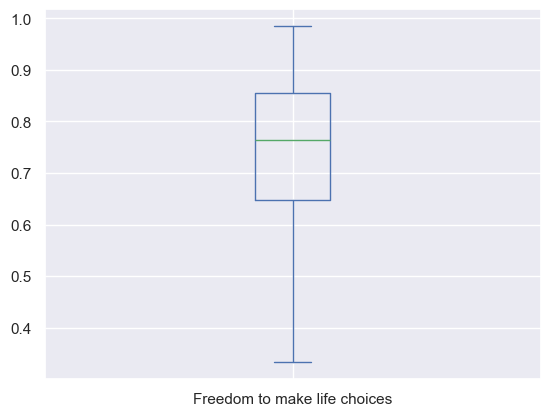

In [463]:
df[['Freedom to make life choices']].plot(kind='box')

<Axes: >

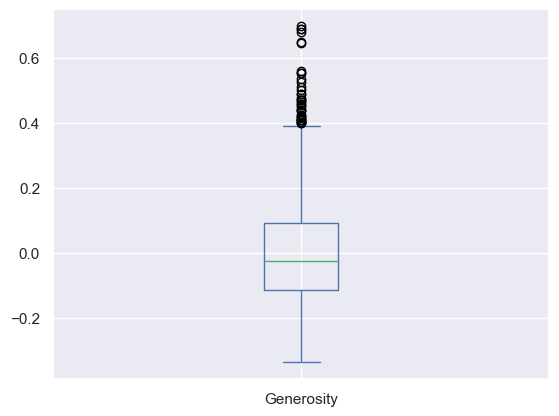

In [464]:
df[['Generosity']].plot(kind='box')

In [465]:
outlier(df, 'Generosity')

Country name  year  Life Ladder  Log GDP per capita  Social support  \
757     Indonesia  2016        5.136               9.262           0.792   
758     Indonesia  2017        5.098               9.300           0.796   
759     Indonesia  2018        5.340               9.339           0.809   
760     Indonesia  2019        5.347               9.377           0.802   
1182      Myanmar  2012        4.439               8.158           0.612   
1183      Myanmar  2013        4.176               8.230           0.757   
1184      Myanmar  2014        4.786               8.299           0.774   
1185      Myanmar  2015        4.224               8.359           0.752   
1186      Myanmar  2016        4.623               8.408           0.793   
1187      Myanmar  2017        4.154               8.464           0.795   
1188      Myanmar  2018        4.411               8.523           0.774   
1189      Myanmar  2019        4.434               8.545           0.763   
1715     Thailand  2009        5.476               9.508           0.893   
1716     Thailand  2010        6.217               9.576           0.898   
1720     Thailand  2014        6.985               9.672           0.933   

      Healthy life expectancy at birth  Freedom to make life choices  \
757                              61.70                         0.830   
758                              61.90                         0.865   
759                              62.10                         0.879   
760                              62.30                         0.866   
1182                             57.02                         0.691   
1183                             57.38                         0.775   
1184                             57.74                           NaN   
1185                             58.10                         0.808   
1186                             58.40                         0.877   
1187                             58.70                         0.886   
1188                             59.00                         0.906   
1189                             59.30                         0.899   
1715                             65.16                         0.868   
1716                             65.50                         0.860   
1720                             66.38                         0.900   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
757        0.500                      0.890            0.833            0.342  
758        0.488                      0.900            0.863            0.319  
759        0.512                      0.868            0.864            0.296  
760        0.555                      0.861            0.877            0.302  
1182       0.645                      0.695            0.764            0.205  
1183       0.689                      0.638            0.803            0.217  
1184       0.698                      0.592            0.858            0.112  
1185       0.688                      0.633            0.866            0.272  
1186       0.679                      0.607            0.804            0.302  
1187       0.650                      0.619            0.746            0.282  
1188       0.490                      0.647            0.777            0.300  
1189       0.561                      0.682            0.755            0.286  
1715       0.525                      0.904            0.898            0.166  
1716       0.536                      0.917            0.901            0.182  
1720       0.553                      0.920            0.811            0.169

In [466]:
outlier2(df, 'Generosity')

Country name  year  Life Ladder  Log GDP per capita  Social support  \
268         Cambodia  2011        4.161               7.960           0.716   
589           Gambia  2018        4.922               7.671           0.685   
590           Gambia  2019        5.164               7.699           0.694   
674            Haiti  2006        3.754               7.407           0.694   
684            Haiti  2018        3.615               7.477           0.538   
751        Indonesia  2010        5.457               9.022           0.816   
752        Indonesia  2011        5.173               9.069           0.825   
755        Indonesia  2014        5.597               9.190           0.905   
756        Indonesia  2015        5.043               9.225           0.809   
757        Indonesia  2016        5.136               9.262           0.792   
758        Indonesia  2017        5.098               9.300           0.796   
759        Indonesia  2018        5.340               9.339           0.809   
760        Indonesia  2019        5.347               9.377           0.802   
945             Laos  2006        5.076               8.251           0.807   
946             Laos  2007        5.364               8.307           0.790   
947             Laos  2008        5.044               8.366           0.807   
948             Laos  2011        4.704               8.548           0.691   
1076           Malta  2009        6.328              10.331           0.916   
1080           Malta  2013        6.380              10.422           0.942   
1081           Malta  2014        6.452              10.486           0.941   
1182         Myanmar  2012        4.439               8.158           0.612   
1183         Myanmar  2013        4.176               8.230           0.757   
1184         Myanmar  2014        4.786               8.299           0.774   
1185         Myanmar  2015        4.224               8.359           0.752   
1186         Myanmar  2016        4.623               8.408           0.793   
1187         Myanmar  2017        4.154               8.464           0.795   
1188         Myanmar  2018        4.411               8.523           0.774   
1189         Myanmar  2019        4.434               8.545           0.763   
1190         Myanmar  2020        4.431               8.554           0.796   
1714        Thailand  2008        5.636               9.520           0.832   
1715        Thailand  2009        5.476               9.508           0.893   
1716        Thailand  2010        6.217               9.576           0.898   
1717        Thailand  2011        6.664               9.579           0.884   
1719        Thailand  2013        6.231               9.667           0.926   
1720        Thailand  2014        6.985               9.672           0.933   
1825  United Kingdom  2010        7.029              10.649           0.955   

      Healthy life expectancy at birth  Freedom to make life choices  \
268                              58.88                         0.927   
589                              55.00                         0.719   
590                              55.30                         0.677   
674                              48.46                         0.449   
684                              55.70                         0.591   
751                              60.40                         0.700   
752                              60.62                         0.878   
755                              61.28                         0.719   
756                              61.50                         0.779   
757                              61.70                         0.830   
758                              61.90                         0.865   
759                              62.10                         0.879   
760                              62.30                         0.866   
945                              53.92                         0.925   
946 

بخشندگی بیش از 0.4 پرت شناسایی شده اما بنظر من پرت نیست و فقط با بخشندگی اکثر کشورها در سالهای متوالی تفاوت زیادی دارد. برای مثال بخشندگی کشور اندونزی در سالهای 2014 تا 2019 بیش از 0.4 است و با نگاهی به حمایت اجتماعی این کشور در این سالها که بین 0.7 تا 0.9 است میتوان به واقعی بودن بخشندگی این کشور پی برد

<Axes: >

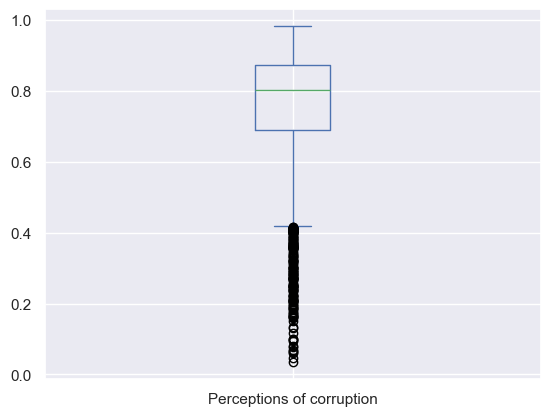

In [467]:
df[['Perceptions of corruption']].plot(kind='box')

In [468]:
outlier(df, 'Perceptions of corruption')

Country name  year  Life Ladder  Log GDP per capita  Social support  \
453       Denmark  2010        7.771              10.839           0.975   
456       Denmark  2013        7.589              10.851           0.965   
460       Denmark  2017        7.594              10.916           0.952   
461       Denmark  2018        7.649              10.935           0.958   
462       Denmark  2019        7.693              10.954           0.958   
551       Finland  2006        7.672              10.745           0.965   
563       Finland  2020        7.889              10.750           0.962   
1233  New Zealand  2015        7.418              10.608           0.987   
1422        Qatar  2009        6.418              11.456           0.894   
1458       Rwanda  2011        4.097               7.369           0.570   
1459       Rwanda  2012        3.333               7.428           0.637   
1460       Rwanda  2013        3.466               7.449           0.750   
1461       Rwanda  2014        3.596               7.484           0.748   
1462       Rwanda  2015        3.483               7.544           0.678   
1463       Rwanda  2016        3.333               7.576           0.665   
1465       Rwanda  2018        3.561               7.644           0.616   
1466       Rwanda  2019        3.268               7.708           0.489   
1522    Singapore  2007        6.834              11.212           0.921   
1523    Singapore  2008        6.642              11.178           0.845   
1524    Singapore  2009        6.145              11.149           0.866   
1525    Singapore  2010        6.531              11.267           0.864   
1526    Singapore  2011        6.561              11.307           0.904   
1528    Singapore  2014        7.062              11.383           0.822   
1529    Singapore  2015        6.620              11.400           0.866   
1530    Singapore  2016        6.033              11.419           0.925   
1531    Singapore  2017        6.378              11.461           0.897   
1532    Singapore  2018        6.375              11.490           0.903   
1533    Singapore  2019        6.378              11.486           0.925   

      Healthy life expectancy at birth  Freedom to make life choices  \
453                              70.40                         0.944   
456                              71.06                         0.920   
460                              72.10                         0.955   
461                              72.40                         0.935   
462                              72.70                         0.963   
551                              69.76                         0.969   
563                              72.10                         0.962   
1233                             72.60                         0.942   
1422                             66.58                         0.865   
1458                             56.82                         0.829   
1459                             57.44                         0.835   
1460                             58.06                         0.904   
1461                             58.68                         0.894   
1462                             59.30                         0.908   
1463                             59.90                         0.911   
1465                             61.10                         0.924   
1466                             61.70                         0.869   
1522                             73.90                         0.867   
1523                             74.20                         0.661   
1524                             74.50                         0.776   
1525                             74.80                         0.846   
1526                             75.02                         0.822   
1528                             75.68                         0.835   
1529                             75.90                         0.887   


In [469]:
outlier2(df, 'Perceptions of corruption')

Country name  year  Life Ladder  Log GDP per capita  \
66               Australia  2005        7.341              10.659   
69               Australia  2010        7.450              10.722   
70               Australia  2011        7.406              10.733   
71               Australia  2012        7.196              10.754   
74               Australia  2015        7.309              10.779   
...                    ...   ...          ...                 ...   
1808  United Arab Emirates  2006        6.734              11.367   
1809  United Arab Emirates  2009        6.866              10.975   
1810  United Arab Emirates  2010        7.097              10.914   
1821        United Kingdom  2005        6.984              10.663   
1833        United Kingdom  2018        7.233              10.743   

      Social support  Healthy life expectancy at birth  \
66             0.968                             71.40   
69             0.955                             72.20   
70             0.967                             72.30   
71             0.945                             72.40   
74             0.952                             72.70   
...              ...                               ...   
1808           0.903                             65.92   
1809           0.885                             66.28   
1810           0.912                             66.40   
1821           0.979                             69.90   
1833           0.928                             72.30   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
66                           0.935         NaN                      0.390   
69                           0.932       0.317                      0.366   
70                           0.945       0.369                      0.382   
71                           0.935       0.274                      0.368   
74                           0.922       0.332                      0.357   
...                            ...         ...                        ...   
1808                         0.898      -0.033                      0.203   
1809                         0.849       0.019                      0.339   
1810                         0.878       0.057                      0.355   
1821                         0.922         NaN                      0.398   
1833                         0.838       0.226                      0.404   

      Positive affect  Negative affect  
66              0.843            0.238  
69              0.834            0.220  
70              0.816            0.195  
71              0.811            0.214  
74              0.790            0.210  
...               ...              ...  
1808            0.746            0.275  
1809            0.770            0.287  
1810            0.763            0.233  
1821            0.864            0.262  
1833            0.783            0.228  

[164 rows x 11 columns]

<Axes: >

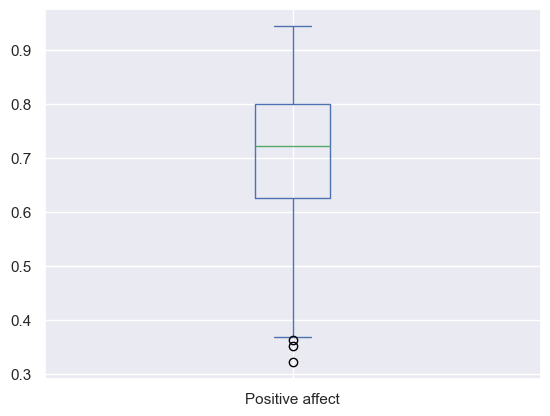

In [470]:
df[['Positive affect']].plot(kind='box')

In [471]:
Q1 = df['Positive affect'].quantile(0.25)
Q3 = df['Positive affect'].quantile(0.75)
IQR = Q3 - Q1
df['Positive affect'] = np.where((df['Positive affect'] < Q1 - 1.5 * IQR), Q1 - 1.5 * IQR, df['Positive affect'])
df['Positive affect'] = np.where((df['Positive affect'] >Q3 + 1.5 * IQR), Q3 + 1.5 * IQR, df['Positive affect'])

<Axes: >

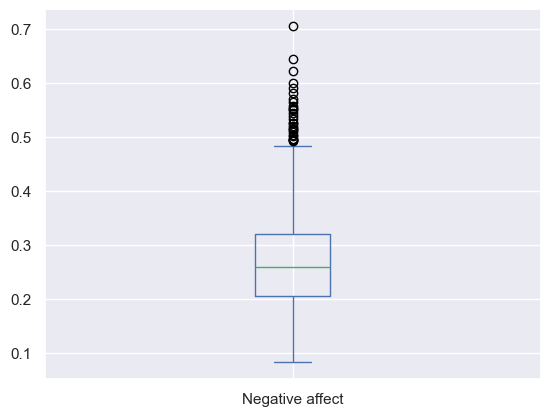

In [472]:
df[['Negative affect']].plot(kind='box')

In [473]:
Q1 = df['Negative affect'].quantile(0.25)
Q3 = df['Negative affect'].quantile(0.75)
IQR = Q3 - Q1
df['Negative affect'] = np.where((df['Negative affect'] < Q1 - 1.5 * IQR), Q1 - 1.5 * IQR, df['Negative affect'])
df['Negative affect'] = np.where((df['Negative affect'] >Q3 + 1.5 * IQR), Q3 + 1.5 * IQR, df['Negative affect'])

In [474]:
from sklearn.impute import KNNImputer

In [475]:

num = df.drop('Country name', axis=1)
cat = df['Country name']

imputer = KNNImputer().fit_transform(num)
num = pd.DataFrame(imputer, columns=num.columns)
num

year  Life Ladder  Log GDP per capita  Social support  \
0     2008.0        3.724               7.370           0.451   
1     2009.0        4.402               7.540           0.552   
2     2010.0        4.758               7.647           0.539   
3     2011.0        3.832               7.620           0.521   
4     2012.0        3.783               7.705           0.521   
...      ...          ...                 ...             ...   
1944  2016.0        3.735               7.984           0.768   
1945  2017.0        3.638               8.016           0.754   
1946  2018.0        3.616               8.049           0.775   
1947  2019.0        2.694               7.950           0.759   
1948  2020.0        3.160               7.829           0.717   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                                50.80                         0.718   
1                                51.20                         0.679   
2                                51.60                         0.600   
3                                51.92                         0.496   
4                                52.24                         0.531   
...                                ...                           ...   
1944                             54.40                         0.733   
1945                             55.00                         0.753   
1946                             55.60                         0.763   
1947                             56.20                         0.632   
1948                             56.80                         0.643   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
0          0.168                      0.882            0.518            0.258  
1          0.190                      0.850            0.584            0.237  
2          0.121                      0.707            0.618            0.275  
3          0.162                      0.731            0.611            0.267  
4          0.236                      0.776            0.710            0.268  
...          ...                        ...              ...              ...  
1944      -0.095                      0.724            0.738            0.209  
1945      -0.098                      0.751            0.806            0.224  
1946      -0.068                      0.844            0.710            0.212  
1947      -0.064                      0.831            0.716            0.235  
1948      -0.009                      0.789            0.703            0.346  

[1949 rows x 10 columns]

In [476]:
df = pd.concat([cat, num], axis=1)
df

Country name    year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008.0        3.724               7.370           0.451   
1     Afghanistan  2009.0        4.402               7.540           0.552   
2     Afghanistan  2010.0        4.758               7.647           0.539   
3     Afghanistan  2011.0        3.832               7.620           0.521   
4     Afghanistan  2012.0        3.783               7.705           0.521   
...           ...     ...          ...                 ...             ...   
1944     Zimbabwe  2016.0        3.735               7.984           0.768   
1945     Zimbabwe  2017.0        3.638               8.016           0.754   
1946     Zimbabwe  2018.0        3.616               8.049           0.775   
1947     Zimbabwe  2019.0        2.694               7.950           0.759   
1948     Zimbabwe  2020.0        3.160               7.829           0.717   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                                50.80                         0.718   
1                                51.20                         0.679   
2                                51.60                         0.600   
3                                51.92                         0.496   
4                                52.24                         0.531   
...                                ...                           ...   
1944                             54.40                         0.733   
1945                             55.00                         0.753   
1946                             55.60                         0.763   
1947                             56.20                         0.632   
1948                             56.80                         0.643   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
0          0.168                      0.882            0.518            0.258  
1          0.190                      0.850            0.584            0.237  
2          0.121                      0.707            0.618            0.275  
3          0.162                      0.731            0.611            0.267  
4          0.236                      0.776            0.710            0.268  
...          ...                        ...              ...              ...  
1944      -0.095                      0.724            0.738            0.209  
1945      -0.098                      0.751            0.806            0.224  
1946      -0.068                      0.844            0.710            0.212  
1947      -0.064                      0.831            0.716            0.235  
1948      -0.009                      0.789            0.703            0.346  

[1949 rows x 11 columns]

In [477]:
df.isna().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [478]:
df.describe()

year  Life Ladder  Log GDP per capita  Social support  \
count  1949.000000  1949.000000         1949.000000     1949.000000   
mean   2013.216008     5.466705            9.365819        0.812900   
std       4.166828     1.115711            1.149441        0.118207   
min    2005.000000     2.375000            6.635000        0.290000   
25%    2010.000000     4.640000            8.464000        0.751000   
50%    2013.000000     5.386000            9.458000        0.836000   
75%    2017.000000     6.283000           10.339000        0.905000   
max    2020.000000     8.019000           11.648000        0.987000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1949.000000                   1949.000000   
mean                          63.427467                      0.742217   
std                            7.381862                      0.140843   
min                           43.827500                      0.333500   
25%                           58.800000                      0.646000   
50%                           65.200000                      0.762000   
75%                           68.600000                      0.854000   
max                           77.100000                      0.985000   

        Generosity  Perceptions of corruption  Positive affect  \
count  1949.000000                1949.000000      1949.000000   
mean      0.000767                   0.748501         0.709947   
std       0.160037                   0.182415         0.106632   
min      -0.335000                   0.035000         0.365250   
25%      -0.109000                   0.695000         0.626000   
50%      -0.023000                   0.801000         0.722000   
75%       0.090600                   0.868000         0.798000   
max       0.698000                   0.983000         0.944000   

       Negative affect  
count      1949.000000  
mean          0.267831  
std           0.082404  
min           0.083000  
25%           0.206000  
50%           0.258000  
75%           0.320000  
max           0.491000

<Axes: >

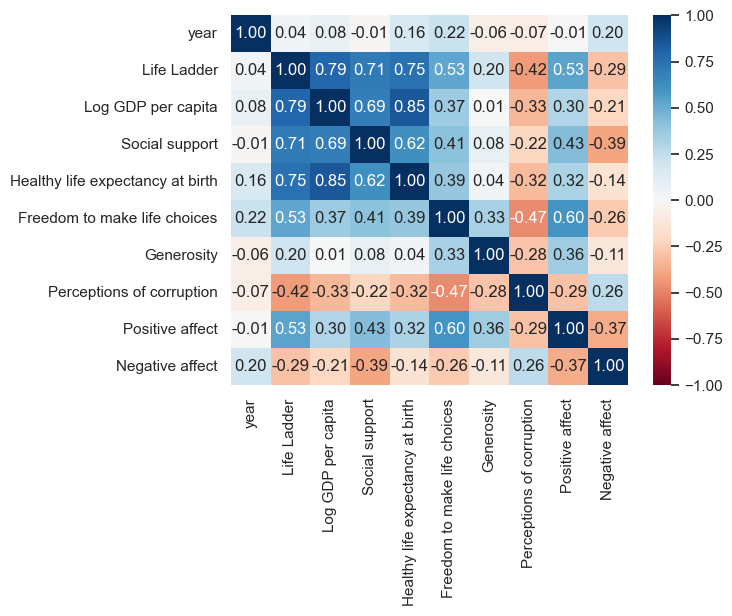

In [479]:
corr = df.select_dtypes(include=['float', 'int']).corr()
sns.heatmap(corr, vmin=-1, vmax=1, fmt='.2f', annot=True, cmap='RdBu')

In [480]:
#برای تحلیل بهتر داده ها را بر اساس سال تقسیم می کنیم
by_year = df.groupby('year')

In [481]:
by_year.describe()

Life Ladder                                                       \
             count      mean       std    min      25%     50%      75%   
year                                                                      
2005.0        27.0  6.446259  0.919129  4.719  5.53900  6.6200  7.16150   
2006.0        89.0  5.196899  1.094545  3.202  4.46000  5.0840  5.95400   
2007.0       102.0  5.418275  1.047920  3.280  4.67025  5.2215  6.12175   
2008.0       110.0  5.418509  1.169425  2.808  4.60425  5.1815  6.23550   
2009.0       114.0  5.457667  1.029690  3.408  4.68700  5.3605  6.25375   
2010.0       124.0  5.496806  1.125612  3.229  4.64050  5.4605  6.31875   
2011.0       146.0  5.424082  1.084030  2.936  4.70925  5.2240  6.32550   
2012.0       142.0  5.443754  1.116601  3.164  4.60375  5.3365  6.21100   
2013.0       137.0  5.394562  1.180784  2.688  4.51400  5.2460  6.32500   
2014.0       145.0  5.389021  1.155524  2.839  4.50000  5.3330  6.27500   
2015.0       143.0  5.404035  1.116039  2.702  4.61450  5.3440  6.27900   
2016.0       142.0  5.399479  1.140646  2.693  4.52125  5.4240  6.13450   
2017.0       147.0  5.460408  1.140804  2.662  4.61950  5.5530  6.25150   
2018.0       142.0  5.499444  1.083489  2.694  4.77250  5.4685  6.24700   
2019.0       144.0  5.570868  1.111850  2.375  4.92750  5.5945  6.28125   
2020.0        95.0  5.840600  0.978608  3.160  5.20450  5.8850  6.49500   

              Log GDP per capita             ... Positive affect         \
          max              count       mean  ...             75%    max   
year                                         ...                          
2005.0  8.019               27.0  10.118667  ...         0.81950  0.869   
2006.0  7.672               89.0   9.058115  ...         0.80900  0.886   
2007.0  7.834              102.0   9.172951  ...         0.78350  0.875   
2008.0  7.971              110.0   9.167273  ...         0.79350  0.890   
2009.0  7.683              114.0   9.254502  ...         0.79275  0.898   
2010.0  7.771              124.0   9.389332  ...         0.80900  0.901   
2011.0  7.788              146.0   9.277736  ...         0.80275  0.934   
2012.0  7.776              142.0   9.391630  ...         0.81100  0.917   
2013.0  7.594              137.0   9.375009  ...         0.79660  0.919   
2014.0  7.508              145.0   9.362819  ...         0.80300  0.944   
2015.0  7.603              143.0   9.384839  ...         0.80000  0.910   
2016.0  7.660              142.0   9.389961  ...         0.79250  0.925   
2017.0  7.788              147.0   9.386973  ...         0.79200  0.903   
2018.0  7.858              142.0   9.394080  ...         0.79275  0.884   
2019.0  7.780              144.0   9.471754  ...         0.79875  0.891   
2020.0  7.889               95.0   9.767844  ...         0.78800  0.878   

       Negative affect                                                       \
                 count      mean       std    min      25%     50%      75%   
year                                                                          
2005.0            27.0  0.258044  0.064298  0.151  0.23300  0.2430  0.29100   
2006.0            89.0  0.254811  0.070009  0.094  0.20100  0.2490  0.30300   
2007.0           102.0  0.250216  0.068496  0.114  0.20850  0.2400  0.28700   
2008.0           110.0  0.243545  0.070806  0.120  0.18625  0.2335  0.28775   
2009.0           114.0  0.246807  0.076692  0.112  0.18925  0.2375  0.29075   
2010.0           124.0  0.240127  0.077483  0.083  0.18375  0.2335  0.28775   
2011.0           146.0  0.248178  0.079151  0.112  0.18775  0.2475  0.28775   
2012.0           142.0  0.258521  0.085088  0.095  0.19425  0.2500  0.31825   
2013.0           137.0  0.269358  0.085803  0.124  0.20500  0.2630  0.31500   
2014.0           145.0  0.268870  0.077397  0.106  0.21600  0.2600  0.31300   
2015.0           143.0  0.276583  0.078839  0.103  0.21450  0.2740  0.33100   
2016.0           142.0  0.284303  0.087356  0.108

In [482]:
by_year['Life Ladder'].describe()

count      mean       std    min      25%     50%      75%    max
year                                                                     
2005.0   27.0  6.446259  0.919129  4.719  5.53900  6.6200  7.16150  8.019
2006.0   89.0  5.196899  1.094545  3.202  4.46000  5.0840  5.95400  7.672
2007.0  102.0  5.418275  1.047920  3.280  4.67025  5.2215  6.12175  7.834
2008.0  110.0  5.418509  1.169425  2.808  4.60425  5.1815  6.23550  7.971
2009.0  114.0  5.457667  1.029690  3.408  4.68700  5.3605  6.25375  7.683
2010.0  124.0  5.496806  1.125612  3.229  4.64050  5.4605  6.31875  7.771
2011.0  146.0  5.424082  1.084030  2.936  4.70925  5.2240  6.32550  7.788
2012.0  142.0  5.443754  1.116601  3.164  4.60375  5.3365  6.21100  7.776
2013.0  137.0  5.394562  1.180784  2.688  4.51400  5.2460  6.32500  7.594
2014.0  145.0  5.389021  1.155524  2.839  4.50000  5.3330  6.27500  7.508
2015.0  143.0  5.404035  1.116039  2.702  4.61450  5.3440  6.27900  7.603
2016.0  142.0  5.399479  1.140646  2.693  4.52125  5.4240  6.13450  7.660
2017.0  147.0  5.460408  1.140804  2.662  4.61950  5.5530  6.25150  7.788
2018.0  142.0  5.499444  1.083489  2.694  4.77250  5.4685  6.24700  7.858
2019.0  144.0  5.570868  1.111850  2.375  4.92750  5.5945  6.28125  7.780
2020.0   95.0  5.840600  0.978608  3.160  5.20450  5.8850  6.49500  7.889

<Axes: xlabel='year', ylabel='Life Ladder'>

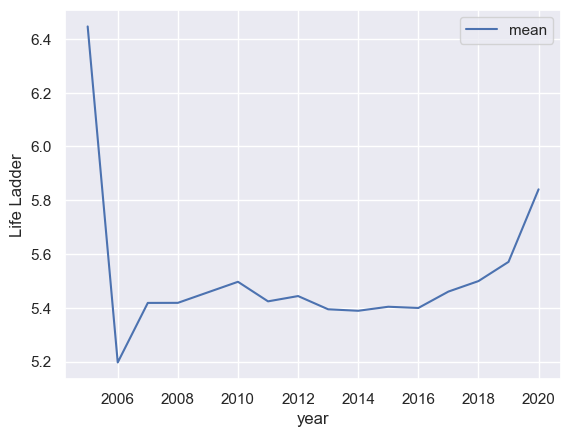

In [483]:
by_year['Life Ladder'].describe().plot( y='mean', xlabel='year', ylabel='Life Ladder')

In [484]:
by_year['Log GDP per capita'].describe()

count       mean       std    min      25%      50%       75%     max
year                                                                         
2005.0   27.0  10.118667  0.690141  8.218  9.64450  10.4620  10.67600  10.851
2006.0   89.0   9.058115  1.245510  6.678  8.03900   9.0880  10.03200  11.367
2007.0  102.0   9.172951  1.118447  6.742  8.32125   9.2290  10.00800  11.212
2008.0  110.0   9.167273  1.219757  6.719  8.16900   9.2110  10.27100  11.178
2009.0  114.0   9.254502  1.151719  6.723  8.33300   9.3140  10.08525  11.562
2010.0  124.0   9.389332  1.123586  6.941  8.48500   9.4430  10.41900  11.592
2011.0  146.0   9.277736  1.184578  6.748  8.34550   9.3320  10.23500  11.595
2012.0  142.0   9.391630  1.118648  6.832  8.53175   9.4645  10.27850  11.567
2013.0  137.0   9.375009  1.108952  6.880  8.48900   9.4430  10.26300  11.580
2014.0  145.0   9.362819  1.144351  6.787  8.45700   9.4260  10.25700  11.598
2015.0  143.0   9.384839  1.167268  6.935  8.46300   9.4490  10.34100  11.617
2016.0  142.0   9.389961  1.180566  6.785  8.46950   9.5050  10.37225  11.640
2017.0  147.0   9.386973  1.183108  6.817  8.48400   9.4910  10.37300  11.634
2018.0  142.0   9.394080  1.150380  6.635  8.53025   9.5400  10.33400  11.645
2019.0  144.0   9.471754  1.124634  6.966  8.56625   9.5945  10.40025  11.648
2020.0   95.0   9.767844  0.932421  7.684  9.12700   9.9130  10.57150  11.323

<Axes: xlabel='year', ylabel='Log GDP per capita'>

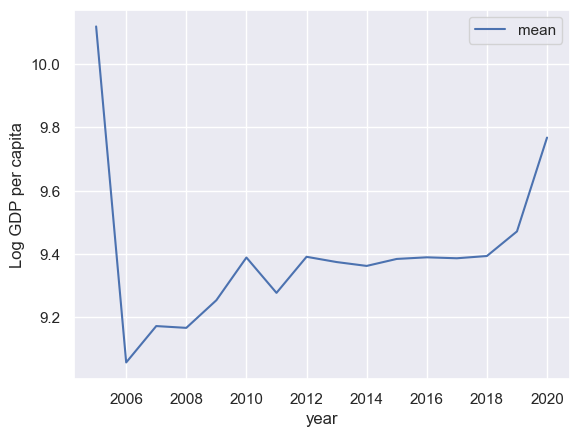

In [485]:
by_year['Log GDP per capita'].describe().plot( y='mean', xlabel='year', ylabel='Log GDP per capita')

In [486]:
by_year['Social support'].describe()

count      mean       std    min      25%     50%      75%    max
year                                                                     
2005.0   27.0  0.897407  0.084185  0.591  0.85800  0.9280  0.95300  0.979
2006.0   89.0  0.835809  0.111844  0.435  0.77500  0.8750  0.91200  0.970
2007.0  102.0  0.810416  0.110393  0.479  0.74925  0.8325  0.88575  0.970
2008.0  110.0  0.784391  0.146848  0.291  0.70975  0.8205  0.88675  0.983
2009.0  114.0  0.819291  0.109767  0.326  0.77200  0.8350  0.90250  0.964
2010.0  124.0  0.832165  0.102663  0.483  0.78500  0.8570  0.90650  0.976
2011.0  146.0  0.803362  0.127291  0.303  0.75025  0.8315  0.89375  0.977
2012.0  142.0  0.809063  0.112738  0.511  0.74325  0.8260  0.90300  0.979
2013.0  137.0  0.806555  0.110145  0.484  0.74000  0.8270  0.90100  0.967
2014.0  145.0  0.806630  0.114354  0.444  0.75500  0.8220  0.89800  0.968
2015.0  143.0  0.798698  0.125569  0.434  0.72950  0.8270  0.89950  0.987
2016.0  142.0  0.811894  0.125169  0.290  0.75650  0.8380  0.91025  0.985
2017.0  147.0  0.805329  0.121760  0.320  0.73350  0.8290  0.90500  0.967
2018.0  142.0  0.812345  0.114989  0.485  0.74025  0.8390  0.90800  0.984
2019.0  144.0  0.816792  0.117761  0.420  0.75900  0.8440  0.91050  0.982
2020.0   95.0  0.838916  0.105662  0.507  0.77300  0.8740  0.93000  0.983

<Axes: xlabel='year', ylabel='Social support'>

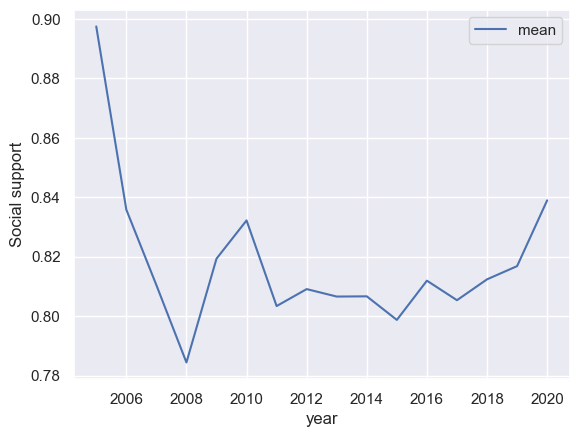

In [487]:
by_year['Social support'].describe().plot(y='mean', xlabel='year', ylabel='Social support')

In [488]:
by_year['Healthy life expectancy at birth'].describe()

count       mean       std      min     25%      50%     75%    max
year                                                                       
2005.0   27.0  67.007407  4.549719  54.2000  63.750  67.0000  70.850  73.20
2006.0   89.0  60.310904  8.684999  43.8275  53.920  62.9200  66.820  73.60
2007.0  102.0  61.394686  8.101290  43.8275  57.370  63.7580  66.605  73.90
2008.0  110.0  61.380018  8.333249  43.8275  54.930  63.4000  68.005  74.20
2009.0  114.0  62.454746  7.401928  44.6200  58.918  64.3145  67.025  74.50
2010.0  124.0  63.192153  7.471926  43.8275  60.150  64.9500  68.150  74.80
2011.0  146.0  62.305596  7.718283  43.8275  56.330  64.6605  67.410  75.02
2012.0  142.0  63.299792  7.009073  43.8275  59.155  64.8900  68.055  74.16
2013.0  137.0  63.356599  7.153230  45.1600  58.300  65.1000  68.080  75.46
2014.0  145.0  63.355593  7.110175  45.5800  57.740  65.2000  68.020  75.68
2015.0  143.0  63.670664  7.124471  46.0000  58.250  65.5000  68.400  75.90
2016.0  142.0  63.921725  7.245606  44.9000  58.725  65.7500  68.775  76.20
2017.0  147.0  64.142605  7.057540  45.2000  58.700  66.0000  68.900  76.50
2018.0  142.0  64.579310  6.686288  48.2000  59.225  66.2000  68.975  76.80
2019.0  144.0  65.014847  6.596006  48.7000  59.900  66.6000  69.225  77.10
2020.0   95.0  67.145053  5.769823  50.5000  64.700  68.1000  72.150  75.20

<Axes: xlabel='year', ylabel='Healthy life expectancy at birth'>

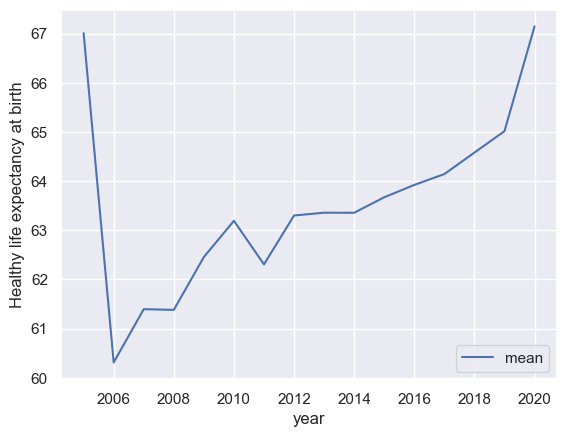

In [489]:
by_year['Healthy life expectancy at birth'].describe().plot(y='mean', xlabel='year', ylabel='Healthy life expectancy at birth')

In [490]:
by_year['Freedom to make life choices'].describe()

count      mean       std     min      25%     50%      75%    max
year                                                                      
2005.0   27.0  0.825030  0.102944  0.6230  0.76080  0.8380  0.90850  0.971
2006.0   89.0  0.730782  0.135496  0.3335  0.65000  0.7360  0.82800  0.969
2007.0  102.0  0.686921  0.146391  0.3335  0.60500  0.6840  0.79450  0.932
2008.0  110.0  0.687765  0.158360  0.3335  0.60100  0.6700  0.83250  0.970
2009.0  114.0  0.688401  0.149276  0.3335  0.59475  0.7055  0.79875  0.949
2010.0  124.0  0.708889  0.142927  0.3640  0.59950  0.7280  0.81750  0.944
2011.0  146.0  0.732423  0.148350  0.3335  0.62000  0.7676  0.84600  0.962
2012.0  142.0  0.710571  0.151756  0.3335  0.60200  0.7050  0.84075  0.956
2013.0  137.0  0.726888  0.136694  0.3900  0.64200  0.7390  0.82100  0.950
2014.0  145.0  0.732553  0.141408  0.3690  0.64600  0.7380  0.84300  0.956
2015.0  143.0  0.747523  0.135668  0.3890  0.65450  0.7750  0.85000  0.980
2016.0  142.0  0.763364  0.126603  0.3335  0.69675  0.7745  0.86075  0.984
2017.0  147.0  0.780173  0.127001  0.4270  0.71350  0.8120  0.88400  0.985
2018.0  142.0  0.784394  0.117153  0.3740  0.71675  0.7970  0.87575  0.970
2019.0  144.0  0.794987  0.116517  0.3850  0.71750  0.8175  0.88800  0.970
2020.0   95.0  0.817756  0.096672  0.5100  0.76550  0.8240  0.89800  0.965

<Axes: xlabel='year', ylabel='Freedom to make life choices'>

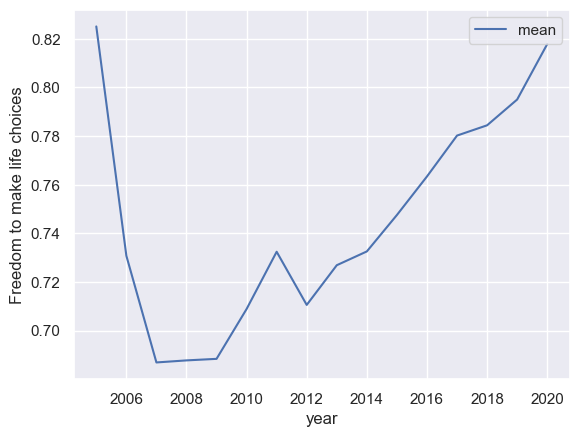

In [491]:
by_year['Freedom to make life choices'].describe().plot(y='mean', xlabel='year', ylabel='Freedom to make life choices')

In [492]:
by_year['Generosity'].describe()

count      mean       std    min      25%     50%      75%    max
year                                                                     
2005.0   27.0  0.088919  0.116170 -0.131 -0.00660  0.0696  0.18410  0.256
2006.0   89.0  0.011744  0.164346 -0.307 -0.07480 -0.0060  0.10100  0.439
2007.0  102.0  0.014833  0.168196 -0.284 -0.09450 -0.0050  0.11575  0.478
2008.0  110.0  0.022344  0.162404 -0.305 -0.09150 -0.0080  0.11975  0.425
2009.0  114.0 -0.005049  0.162182 -0.303 -0.10675 -0.0240  0.07600  0.525
2010.0  124.0  0.002882  0.160914 -0.303 -0.10450 -0.0290  0.07975  0.536
2011.0  146.0 -0.014255  0.160310 -0.316 -0.12525 -0.0365  0.04950  0.459
2012.0  142.0 -0.002246  0.164848 -0.305 -0.12250 -0.0300  0.07850  0.645
2013.0  137.0  0.000921  0.170080 -0.289 -0.11700 -0.0310  0.08500  0.689
2014.0  145.0  0.019697  0.165574 -0.288 -0.09000 -0.0020  0.10400  0.698
2015.0  143.0  0.020138  0.163876 -0.272 -0.09200 -0.0160  0.11000  0.688
2016.0  142.0 -0.000335  0.152371 -0.266 -0.09075 -0.0314  0.08950  0.679
2017.0  147.0 -0.007563  0.157162 -0.290 -0.13500 -0.0300  0.09300  0.650
2018.0  142.0 -0.025746  0.158458 -0.335 -0.14475 -0.0500  0.06725  0.512
2019.0  144.0 -0.020543  0.150946 -0.289 -0.12675 -0.0455  0.06550  0.561
2020.0   95.0 -0.014642  0.134839 -0.259 -0.11150 -0.0530  0.06750  0.470

<Axes: xlabel='year', ylabel='Generosity'>

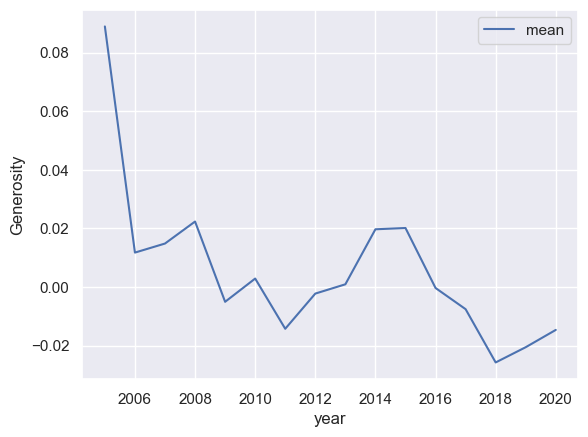

In [493]:
by_year['Generosity'].describe().plot(y='mean', xlabel='year', ylabel='Generosity')

In [494]:
by_year['Perceptions of corruption'].describe()

count      mean       std    min      25%     50%      75%    max
year                                                                     
2005.0   27.0  0.717178  0.195412  0.237  0.59190  0.7450  0.87900  0.983
2006.0   89.0  0.755002  0.182283  0.132  0.70800  0.8050  0.86500  0.967
2007.0  102.0  0.791851  0.163909  0.064  0.75775  0.8285  0.89475  0.976
2008.0  110.0  0.762962  0.188261  0.066  0.69900  0.8160  0.89175  0.968
2009.0  114.0  0.763547  0.191026  0.035  0.69000  0.8215  0.89750  0.979
2010.0  124.0  0.753577  0.187030  0.060  0.69625  0.8102  0.88025  0.983
2011.0  146.0  0.753326  0.183139  0.099  0.68325  0.7925  0.88075  0.977
2012.0  142.0  0.755901  0.177840  0.081  0.70925  0.7950  0.88225  0.962
2013.0  137.0  0.765909  0.172697  0.117  0.69900  0.8160  0.88200  0.973
2014.0  145.0  0.740960  0.180689  0.078  0.67700  0.7940  0.86100  0.976
2015.0  143.0  0.741653  0.189730  0.095  0.68900  0.8100  0.86050  0.962
2016.0  142.0  0.750485  0.181291  0.047  0.71950  0.8086  0.86275  0.969
2017.0  147.0  0.733577  0.178714  0.162  0.68150  0.7830  0.85100  0.954
2018.0  142.0  0.737462  0.180295  0.097  0.69425  0.7955  0.84875  0.952
2019.0  144.0  0.725333  0.181224  0.070  0.68200  0.7745  0.84800  0.963
2020.0   95.0  0.713322  0.194188  0.164  0.63500  0.7840  0.84450  0.961

<Axes: xlabel='year', ylabel='Perceptions of corruption'>

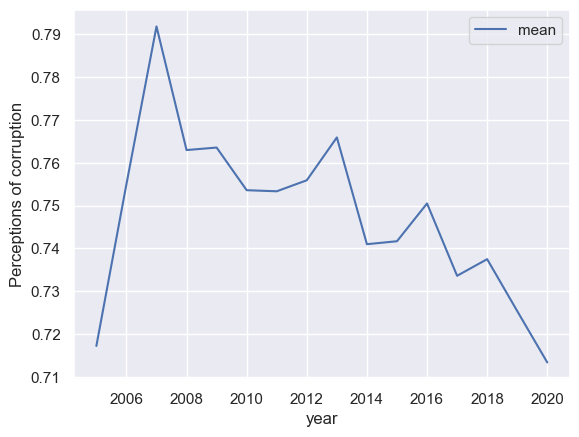

In [495]:
by_year['Perceptions of corruption'].describe().plot(y='mean', xlabel='year', ylabel='Perceptions of corruption')

In [496]:
by_year['Positive affect'].describe()

count      mean       std      min      25%     50%      75%    max
year                                                                       
2005.0   27.0  0.749600  0.087475  0.55700  0.69400  0.7690  0.81950  0.869
2006.0   89.0  0.719090  0.102766  0.43300  0.65200  0.7230  0.80900  0.886
2007.0  102.0  0.709000  0.097151  0.42700  0.63525  0.7085  0.78350  0.875
2008.0  110.0  0.705795  0.111173  0.36525  0.61625  0.7315  0.79350  0.890
2009.0  114.0  0.706263  0.109320  0.49100  0.60425  0.7320  0.79275  0.898
2010.0  124.0  0.712247  0.111382  0.47300  0.62875  0.7175  0.80900  0.901
2011.0  146.0  0.702400  0.117150  0.44600  0.59825  0.7190  0.80275  0.934
2012.0  142.0  0.707000  0.116368  0.42300  0.60900  0.7145  0.81100  0.917
2013.0  137.0  0.711571  0.105935  0.38700  0.63500  0.7180  0.79660  0.919
2014.0  145.0  0.709197  0.103692  0.48300  0.62000  0.7160  0.80300  0.944
2015.0  143.0  0.709692  0.105927  0.36900  0.62550  0.7140  0.80000  0.910
2016.0  142.0  0.711486  0.099177  0.46500  0.63600  0.7040  0.79250  0.925
2017.0  147.0  0.704703  0.108192  0.42100  0.61500  0.7210  0.79200  0.903
2018.0  142.0  0.708003  0.109661  0.42400  0.63925  0.7255  0.79275  0.884
2019.0  144.0  0.710991  0.110247  0.36525  0.63375  0.7275  0.79875  0.891
2020.0   95.0  0.719682  0.084382  0.38400  0.64890  0.7340  0.78800  0.878

<Axes: xlabel='year'>

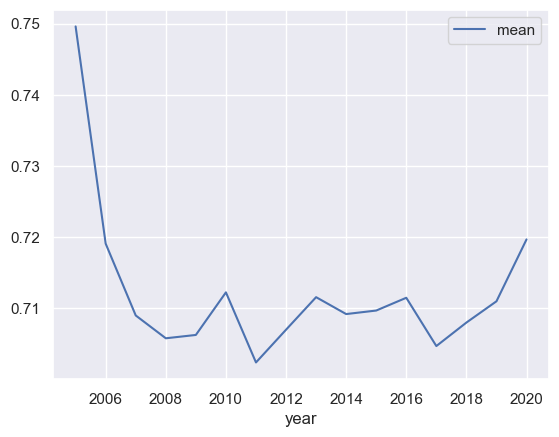

In [497]:
by_year['Positive affect'].describe().plot(y='mean')

In [498]:
by_year['Negative affect'].describe()

count      mean       std    min      25%     50%      75%    max
year                                                                     
2005.0   27.0  0.258044  0.064298  0.151  0.23300  0.2430  0.29100  0.456
2006.0   89.0  0.254811  0.070009  0.094  0.20100  0.2490  0.30300  0.469
2007.0  102.0  0.250216  0.068496  0.114  0.20850  0.2400  0.28700  0.435
2008.0  110.0  0.243545  0.070806  0.120  0.18625  0.2335  0.28775  0.448
2009.0  114.0  0.246807  0.076692  0.112  0.18925  0.2375  0.29075  0.466
2010.0  124.0  0.240127  0.077483  0.083  0.18375  0.2335  0.28775  0.431
2011.0  146.0  0.248178  0.079151  0.112  0.18775  0.2475  0.28775  0.491
2012.0  142.0  0.258521  0.085088  0.095  0.19425  0.2500  0.31825  0.491
2013.0  137.0  0.269358  0.085803  0.124  0.20500  0.2630  0.31500  0.491
2014.0  145.0  0.268870  0.077397  0.106  0.21600  0.2600  0.31300  0.491
2015.0  143.0  0.276583  0.078839  0.103  0.21450  0.2740  0.33100  0.491
2016.0  142.0  0.284303  0.087356  0.108  0.22000  0.2735  0.33875  0.491
2017.0  147.0  0.289634  0.084951  0.114  0.22450  0.2800  0.34710  0.491
2018.0  142.0  0.292810  0.088366  0.093  0.21775  0.2855  0.36050  0.491
2019.0  144.0  0.287687  0.088727  0.093  0.21875  0.2745  0.35625  0.491
2020.0   95.0  0.292598  0.078638  0.083  0.24150  0.2920  0.34100  0.491

<Axes: xlabel='year'>

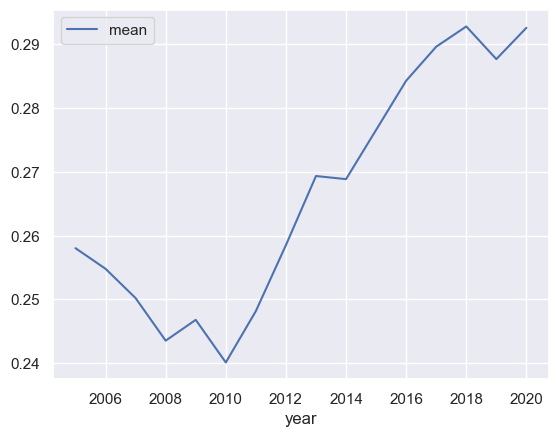

In [499]:
by_year['Negative affect'].describe().plot(y='mean')

In [500]:
df['Rank'] = by_year['Life Ladder'].rank(method='min', ascending=False)
df

Country name    year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008.0        3.724               7.370           0.451   
1     Afghanistan  2009.0        4.402               7.540           0.552   
2     Afghanistan  2010.0        4.758               7.647           0.539   
3     Afghanistan  2011.0        3.832               7.620           0.521   
4     Afghanistan  2012.0        3.783               7.705           0.521   
...           ...     ...          ...                 ...             ...   
1944     Zimbabwe  2016.0        3.735               7.984           0.768   
1945     Zimbabwe  2017.0        3.638               8.016           0.754   
1946     Zimbabwe  2018.0        3.616               8.049           0.775   
1947     Zimbabwe  2019.0        2.694               7.950           0.759   
1948     Zimbabwe  2020.0        3.160               7.829           0.717   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                                50.80                         0.718   
1                                51.20                         0.679   
2                                51.60                         0.600   
3                                51.92                         0.496   
4                                52.24                         0.531   
...                                ...                           ...   
1944                             54.40                         0.733   
1945                             55.00                         0.753   
1946                             55.60                         0.763   
1947                             56.20                         0.632   
1948                             56.80                         0.643   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  \
0          0.168                      0.882            0.518            0.258   
1          0.190                      0.850            0.584            0.237   
2          0.121                      0.707            0.618            0.275   
3          0.162                      0.731            0.611            0.267   
4          0.236                      0.776            0.710            0.268   
...          ...                        ...              ...              ...   
1944      -0.095                      0.724            0.738            0.209   
1945      -0.098                      0.751            0.806            0.224   
1946      -0.068                      0.844            0.710            0.212   
1947      -0.064                      0.831            0.716            0.235   
1948      -0.009                      0.789            0.703            0.346   

       Rank  
0     105.0  
1      96.0  
2      84.0  
3     140.0  
4     136.0  
...     ...  
1944  132.0  
1945  139.0  
1946  135.0  
1947  143.0  
1948   95.0  

[1949 rows x 12 columns]

In [501]:
df.sort_values(by='Rank', ascending=True)

Country name    year  Life Ladder  Log GDP per capita  Social support  \
300        Canada  2013.0        7.594              10.757           0.936   
450       Denmark  2007.0        7.834              10.891           0.954   
559       Finland  2016.0        7.660              10.740           0.954   
560       Finland  2017.0        7.788              10.768           0.964   
561       Finland  2018.0        7.858              10.783           0.962   
...           ...     ...          ...                 ...             ...   
1730         Togo  2014.0        2.839               7.247           0.444   
209      Botswana  2011.0        3.520               9.600           0.860   
1599     S. Sudan  2017.0        2.817               7.918           0.557   
1729         Togo  2011.0        2.936               7.146           0.303   
9     Afghanistan  2017.0        2.662               7.697           0.491   

      Healthy life expectancy at birth  Freedom to make life choices  \
300                              72.68                         0.916   
450                              69.92                         0.932   
559                              71.70                         0.948   
560                              71.80                         0.962   
561                              71.90                         0.938   
...                                ...                           ...   
1730                             53.02                         0.663   
209                              53.68                         0.813   
1599                             51.00                         0.456   
1729                             51.58                         0.584   
9                                52.80                         0.427   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  \
300        0.316                      0.406            0.851            0.263   
450        0.240                      0.206            0.828            0.194   
559       -0.027                      0.250            0.797            0.182   
560       -0.002                      0.192            0.787            0.176   
561       -0.127                      0.199            0.782            0.182   
...          ...                        ...              ...              ...   
1730      -0.085                      0.795            0.583            0.443   
209       -0.250                      0.816            0.739            0.160   
1599      -0.066                      0.761            0.586            0.491   
1729      -0.070                      0.832            0.480            0.395   
9         -0.121                      0.954            0.496            0.371   

       Rank  
300     1.0  
450     1.0  
559     1.0  
560     1.0  
561     1.0  
...     ...  
1730  145.0  
209   145.0  
1599  146.0  
1729  146.0  
9     147.0  

[1949 rows x 12 columns]

In [502]:
Finland = df[df['Country name'] == 'Finland']
Finland

Country name    year  Life Ladder  Log GDP per capita  Social support  \
551      Finland  2006.0        7.672              10.745           0.965   
552      Finland  2008.0        7.671              10.796           0.951   
553      Finland  2010.0        7.393              10.734           0.935   
554      Finland  2011.0        7.354              10.754           0.938   
555      Finland  2012.0        7.420              10.735           0.928   
556      Finland  2013.0        7.445              10.722           0.941   
557      Finland  2014.0        7.385              10.714           0.952   
558      Finland  2015.0        7.448              10.716           0.948   
559      Finland  2016.0        7.660              10.740           0.954   
560      Finland  2017.0        7.788              10.768           0.964   
561      Finland  2018.0        7.858              10.783           0.962   
562      Finland  2019.0        7.780              10.792           0.937   
563      Finland  2020.0        7.889              10.750           0.962   

     Healthy life expectancy at birth  Freedom to make life choices  \
551                             69.76                         0.969   
552                             70.08                         0.934   
553                             70.40                         0.916   
554                             70.64                         0.936   
555                             70.88                         0.921   
556                             71.12                         0.919   
557                             71.36                         0.933   
558                             71.60                         0.930   
559                             71.70                         0.948   
560                             71.80                         0.962   
561                             71.90                         0.938   
562                             72.00                         0.948   
563                             72.10                         0.962   

     Generosity  Perceptions of corruption  Positive affect  Negative affect  \
551      -0.005                      0.132            0.722            0.172   
552       0.028                      0.217            0.773            0.144   
553       0.091                      0.413            0.832            0.202   
554       0.101                      0.320            0.773            0.205   
555      -0.001                      0.361            0.796            0.202   
556       0.040                      0.306            0.769            0.195   
557      -0.001                      0.265            0.784            0.199   
558       0.111                      0.223            0.751            0.191   
559      -0.027                      0.250            0.797            0.182   
560      -0.002                      0.192            0.787            0.176   
561      -0.127                      0.199            0.782            0.182   
562      -0.052                      0.195            0.755            0.181   
563      -0.116                      0.164            0.744            0.193   

     Rank  
551   1.0  
552   2.0  
553   7.0  
554   8.0  
555   7.0  
556   5.0  
557   5.0  
558   5.0  
559   1.0  
560   1.0  
561   1.0  
562   1.0  
563   1.0

<Axes: >

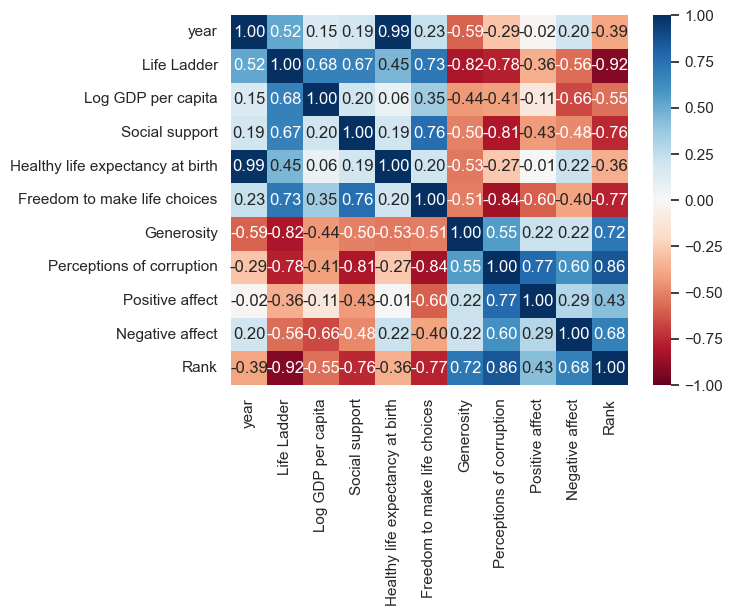

In [503]:
sns.heatmap(Finland.select_dtypes(include=['float', 'int']).corr(), vmax=1, vmin=-1, fmt='.2f', annot=True, cmap='RdBu')

<Axes: xlabel='year'>

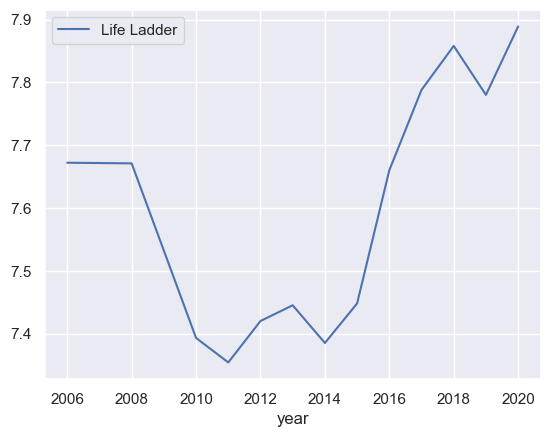

In [504]:
Finland.plot(x='year', y='Life Ladder')

<Axes: xlabel='year'>

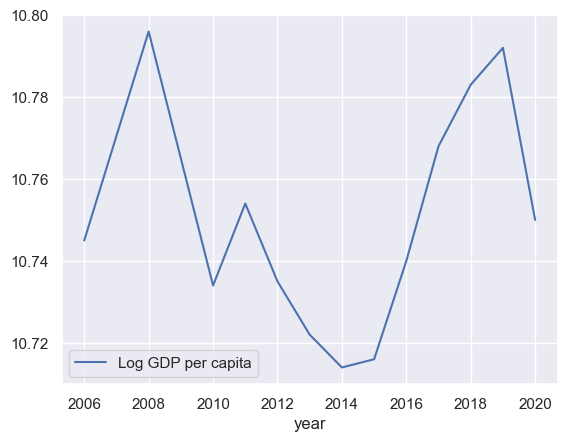

In [505]:
Finland.plot(y='Log GDP per capita', x='year')

<Axes: xlabel='year'>

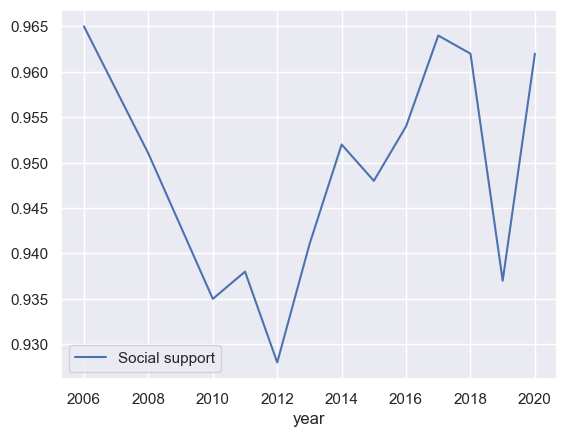

In [506]:
Finland.plot(x='year', y='Social support')

<Axes: xlabel='year'>

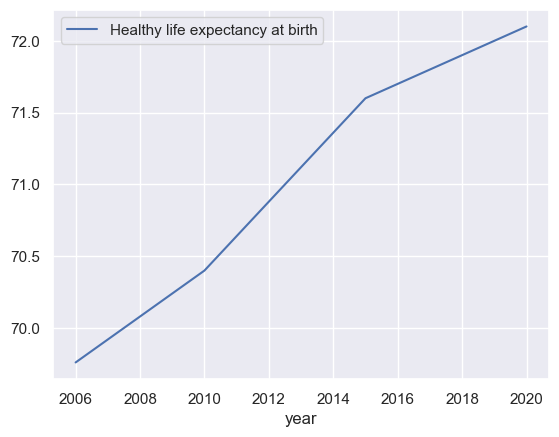

In [507]:
Finland.plot(x='year', y='Healthy life expectancy at birth')

<Axes: xlabel='year'>

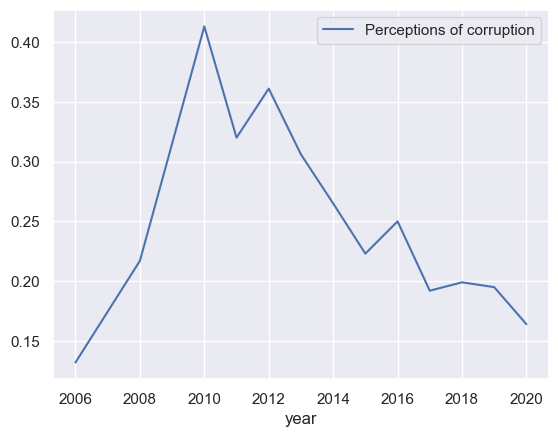

In [508]:
Finland.plot(x='year', y='Perceptions of corruption')

<Axes: ylabel='Frequency'>

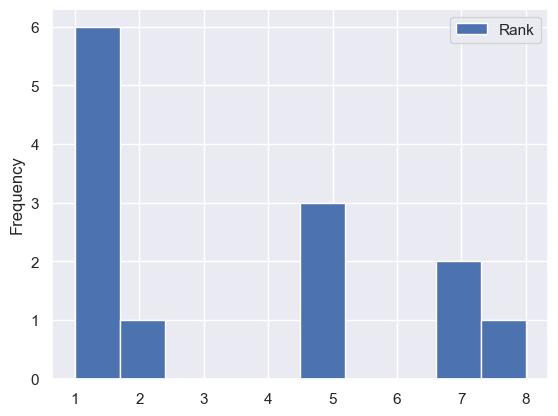

In [509]:
Finland.plot(y='Rank', kind='hist')

In [510]:
Finland['Rank'].value_counts()

Rank
1.0    6
5.0    3
7.0    2
2.0    1
8.0    1
Name: count, dtype: int64

In [511]:
Togo = df[df['Country name'] == 'Togo']
Togo

Country name    year  Life Ladder  Log GDP per capita  Social support  \
1727         Togo  2006.0        3.202               7.078           0.435   
1728         Togo  2008.0        2.808               7.052           0.291   
1729         Togo  2011.0        2.936               7.146           0.303   
1730         Togo  2014.0        2.839               7.247           0.444   
1731         Togo  2015.0        3.768               7.277           0.479   
1732         Togo  2016.0        3.879               7.306           0.509   
1733         Togo  2017.0        4.361               7.324           0.508   
1734         Togo  2018.0        4.023               7.348           0.596   
1735         Togo  2019.0        4.179               7.375           0.539   

      Healthy life expectancy at birth  Freedom to make life choices  \
1727                             49.26                        0.6280   
1728                             50.18                        0.3335   
1729                             51.58                        0.5840   
1730                             53.02                        0.6630   
1731                             53.50                        0.7720   
1732                             53.90                        0.7300   
1733                             54.30                        0.7170   
1734                             54.70                        0.6120   
1735                             55.10                        0.6170   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  \
1727      -0.007                      0.850          0.61500            0.348   
1728      -0.055                      0.932          0.36525            0.379   
1729      -0.070                      0.832          0.48000            0.395   
1730      -0.085                      0.795          0.58300            0.443   
1731      -0.069                      0.733          0.59900            0.416   
1732      -0.007                      0.815          0.60400            0.483   
1733      -0.042                      0.726          0.61400            0.426   
1734      -0.007                      0.809          0.60800            0.446   
1735       0.065                      0.737          0.59000            0.444   

       Rank  
1727   89.0  
1728  110.0  
1729  146.0  
1730  145.0  
1731  131.0  
1732  129.0  
1733  120.0  
1734  130.0  
1735  131.0

<Axes: >

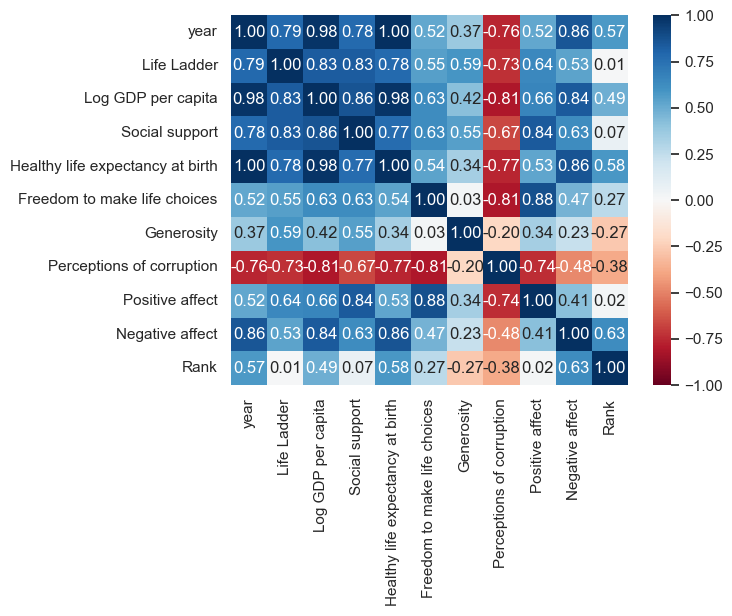

In [512]:
sns.heatmap(Togo.select_dtypes(include=['float', 'int']).corr(), vmax=1, vmin=-1, fmt='.2f', annot=True, cmap='RdBu')

<Axes: xlabel='year'>

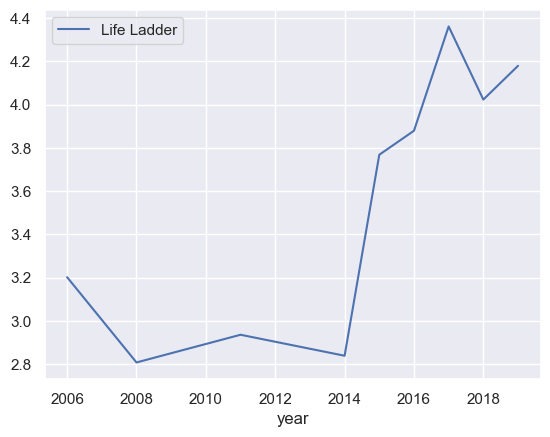

In [513]:
Togo.plot(x='year', y='Life Ladder')

<Axes: xlabel='year'>

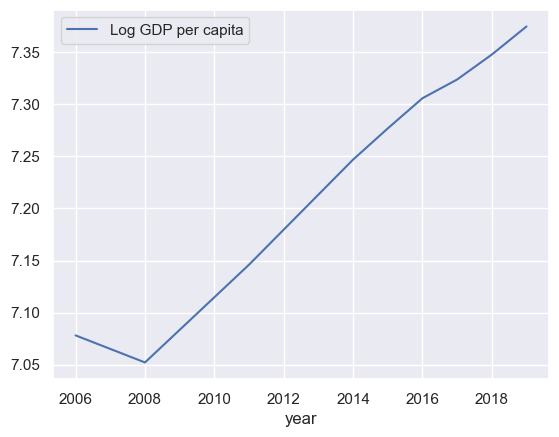

In [514]:
Togo.plot(y='Log GDP per capita', x='year')

<Axes: xlabel='year'>

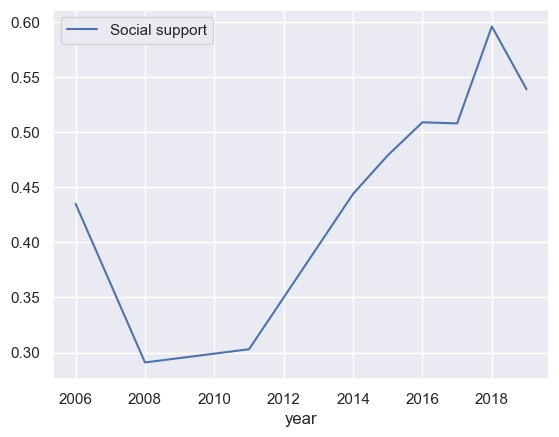

In [515]:
Togo.plot(x='year', y='Social support')

<Axes: xlabel='year'>

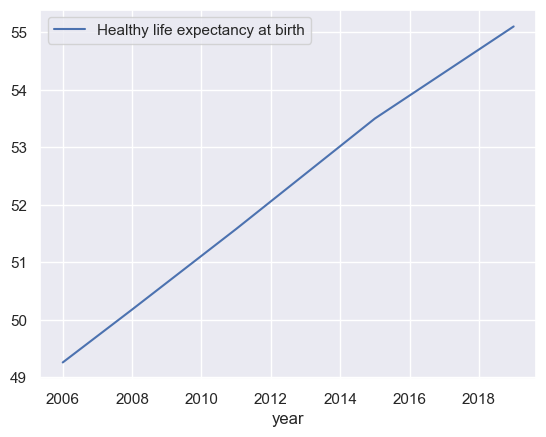

In [516]:
Togo.plot(x='year', y='Healthy life expectancy at birth')

<Axes: xlabel='year'>

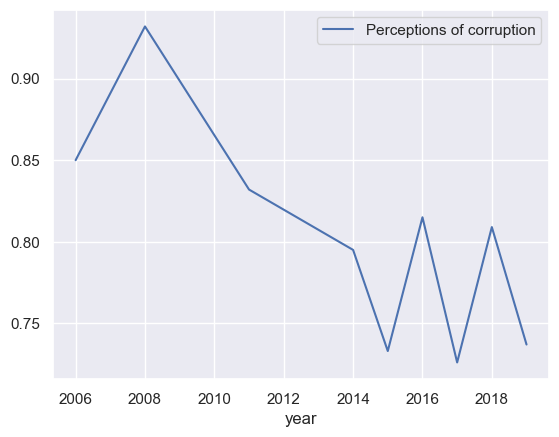

In [517]:
Togo.plot(x='year', y='Perceptions of corruption')

<Axes: ylabel='Frequency'>

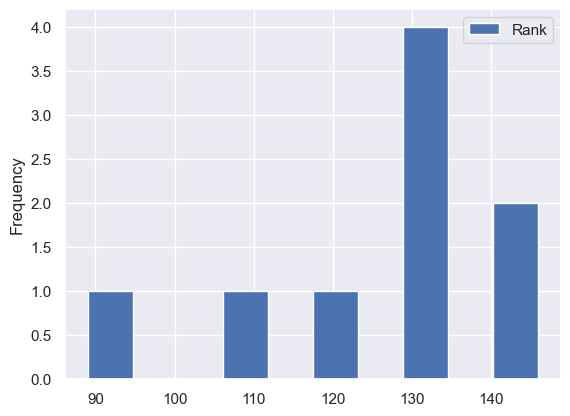

In [518]:
Togo.plot(y='Rank', kind='hist')

In [519]:
Togo['Rank'].value_counts()

Rank
131.0    2
89.0     1
110.0    1
146.0    1
145.0    1
129.0    1
120.0    1
130.0    1
Name: count, dtype: int64

In [520]:
Iran = df[df['Country name'] == 'Iran']
Iran

Country name    year  Life Ladder  Log GDP per capita  Social support  \
761         Iran  2005.0        5.308              9.3930           0.766   
762         Iran  2007.0        5.336              9.4970           0.718   
763         Iran  2008.0        5.129              9.4890           0.633   
764         Iran  2011.0        4.768              9.5470           0.582   
765         Iran  2012.0        4.609              9.4580           0.600   
766         Iran  2013.0        5.140              9.4430           0.664   
767         Iran  2014.0        4.682              9.4760           0.644   
768         Iran  2015.0        4.750              9.4490           0.572   
769         Iran  2016.0        4.653              9.5610           0.566   
770         Iran  2017.0        4.717              9.5840           0.714   
771         Iran  2018.0        4.278              9.3908           0.674   
772         Iran  2019.0        5.006              9.7768           0.698   
773         Iran  2020.0        4.865              9.4284           0.757   

     Healthy life expectancy at birth  Freedom to make life choices  \
761                             62.00                         0.651   
762                             62.76                         0.533   
763                             63.14                         0.601   
764                             64.14                         0.798   
765                             64.38                         0.764   
766                             64.62                         0.730   
767                             64.86                         0.767   
768                             65.10                         0.780   
769                             65.40                         0.773   
770                             65.70                         0.731   
771                             66.00                         0.603   
772                             66.30                         0.623   
773                             66.60                         0.600   

     Generosity  Perceptions of corruption  Positive affect  Negative affect  \
761     -0.0716                      0.636            0.608            0.456   
762      0.0560                      0.872            0.626            0.361   
763      0.0520                      0.868            0.624            0.345   
764      0.2000                      0.665            0.578            0.359   
765     -0.1484                      0.678            0.609            0.491   
766      0.2160                      0.685            0.659            0.491   
767      0.2410                      0.640            0.618            0.491   
768      0.1760                      0.699            0.645            0.491   
769      0.1860                      0.713            0.687            0.491   
770      0.2180                      0.715            0.694            0.439   
771     -0.1954                      0.703            0.553            0.491   
772     -0.0990                      0.728            0.600            0.449   
773     -0.1592                      0.710            0.582            0.470   

      Rank  
761   22.0  
762   46.0  
763   60.0  
764  106.0  
765  106.0  
766   76.0  
767  102.0  
768  102.0  
769  100.0  
770  104.0  
771  125.0  
772   99.0  
773   77.0

<Axes: >

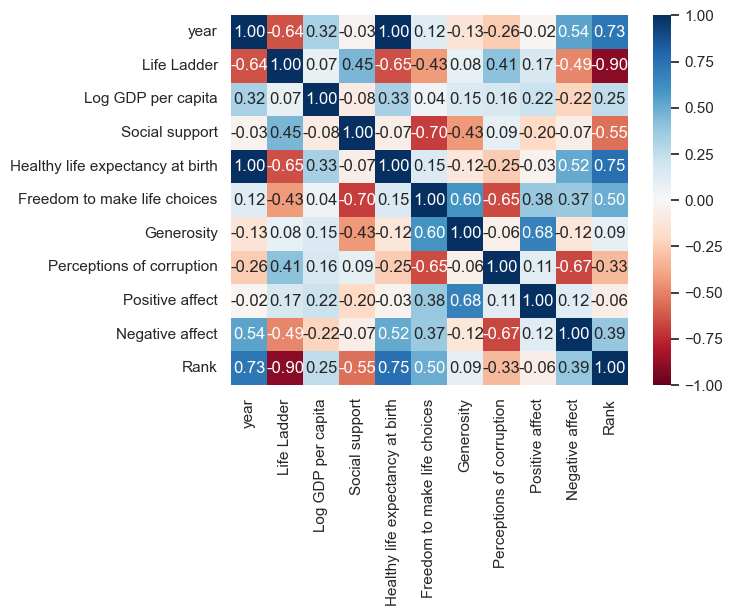

In [521]:
sns.heatmap(Iran.select_dtypes(include=['float', 'int']).corr(), vmax=1, vmin=-1, fmt='.2f', annot=True, cmap='RdBu')

<Axes: xlabel='year'>

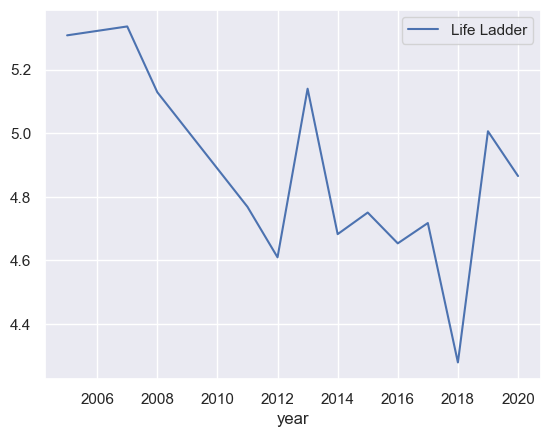

In [522]:
Iran.plot(x='year', y='Life Ladder')

<Axes: xlabel='year'>

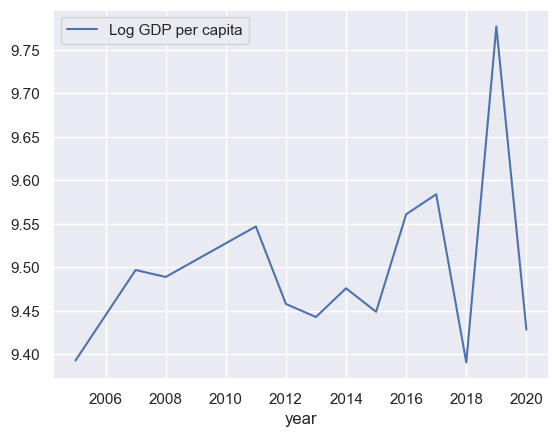

In [523]:
Iran.plot(y='Log GDP per capita', x='year')

<Axes: xlabel='year'>

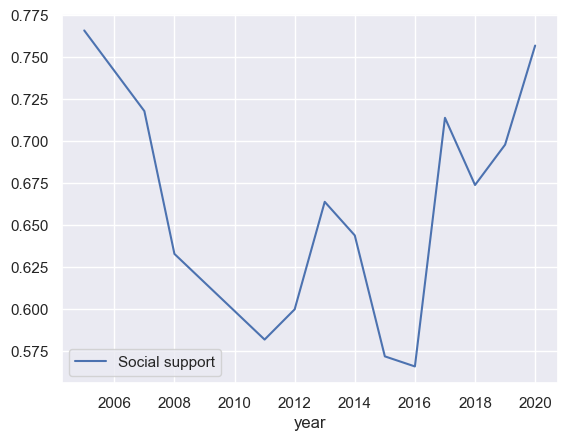

In [524]:
Iran.plot(x='year', y='Social support')

<Axes: xlabel='year'>

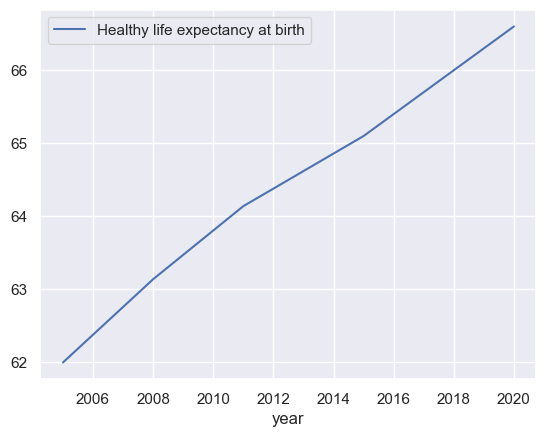

In [525]:
Iran.plot(x='year', y='Healthy life expectancy at birth')

<Axes: xlabel='year'>

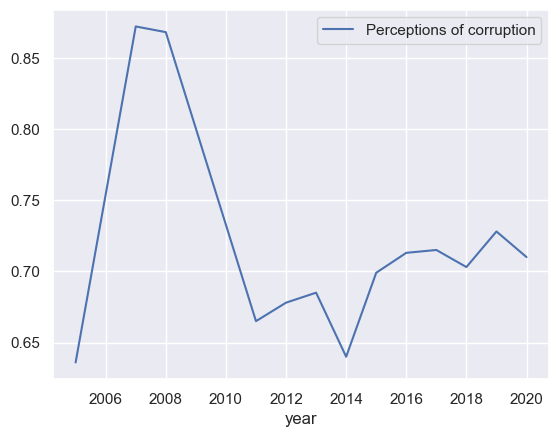

In [526]:
Iran.plot(x='year', y='Perceptions of corruption')

<Axes: ylabel='Frequency'>

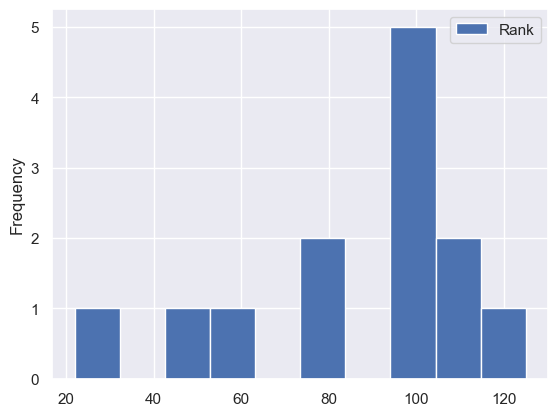

In [527]:
Iran.plot(y='Rank', kind='hist')

In [528]:
Iran['Rank'].value_counts()

Rank
106.0    2
102.0    2
22.0     1
46.0     1
60.0     1
76.0     1
100.0    1
104.0    1
125.0    1
99.0     1
77.0     1
Name: count, dtype: int64

In [529]:
USA = df[df['Country name'] == 'United States of America']
USA

Country name    year  Life Ladder  Log GDP per capita  \
1836  United States of America  2006.0        7.182              10.924   
1837  United States of America  2007.0        7.513              10.933   
1838  United States of America  2008.0        7.280              10.922   
1839  United States of America  2009.0        7.158              10.888   
1840  United States of America  2010.0        7.164              10.905   
1841  United States of America  2011.0        7.115              10.913   
1842  United States of America  2012.0        7.026              10.928   
1843  United States of America  2013.0        7.249              10.939   
1844  United States of America  2014.0        7.151              10.956   
1845  United States of America  2015.0        6.864              10.977   
1846  United States of America  2016.0        6.804              10.986   
1847  United States of America  2017.0        6.992              11.001   
1848  United States of America  2018.0        6.883              11.025   
1849  United States of America  2019.0        6.944              11.043   
1850  United States of America  2020.0        7.028              11.001   

      Social support  Healthy life expectancy at birth  \
1836          0.9650                             68.06   
1837          0.9354                             68.22   
1838          0.9530                             68.38   
1839          0.9120                             68.54   
1840          0.9260                             68.70   
1841          0.9220                             68.68   
1842          0.9030                             68.66   
1843          0.9250                             68.64   
1844          0.9020                             68.62   
1845          0.9040                             68.60   
1846          0.8970                             68.50   
1847          0.9210                             68.40   
1848          0.9040                             68.30   
1849          0.9170                             68.20   
1850          0.9370                             68.10   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
1836                         0.911       0.046                      0.600   
1837                         0.872       0.197                      0.633   
1838                         0.878       0.255                      0.668   
1839                         0.831       0.201                      0.665   
1840                         0.828       0.244                      0.690   
1841                         0.863       0.161                      0.697   
1842                         0.823       0.215                      0.710   
1843                         0.792       0.274                      0.747   
1844                         0.866       0.221                      0.702   
1845                         0.849       0.219                      0.698   
1846                         0.758       0.144                      0.739   
1847                         0.868       0.197                      0.681   
1848                         0.825       0.116                      0.710   
1849                         0.836       0.144                      0.707   
1850                         0.850       0.034                      0.678   

      Positive affect  Negative affect  Rank  
1836            0.827            0.261   5.0  
1837            0.829            0.232   3.0  
1838            0.872            0.227  10.0  
1839            0.843            0.262   8.0  
1840            0.861            0.231  14.0  
1841            0.836            0.273  13.0  
1842            0.834            0.260  17.0  
1843            0.814            0.260  12.0  
1844            0.834            0.281  12.0  
1845            0.814            0.275  15.0  
1846            0.806            0.264  21.0  
1847            0.827            0.268  19.0  
1848            0.815            0.292  20.0

<Axes: >

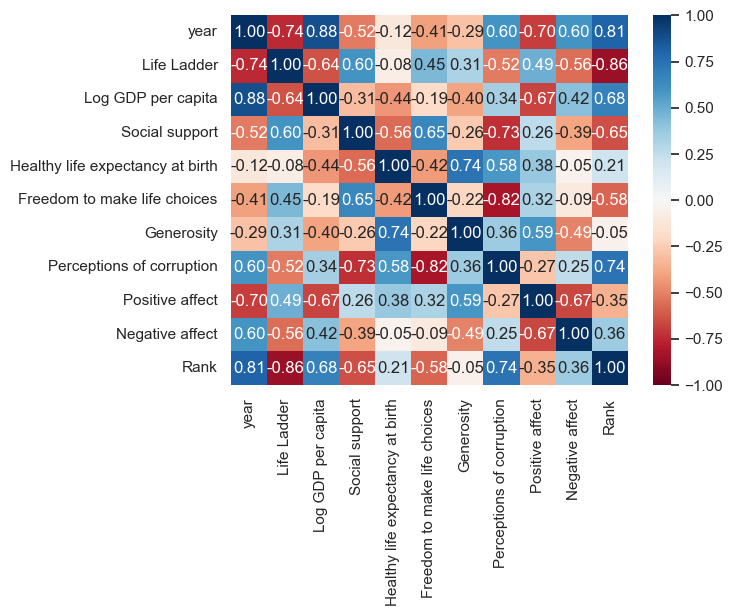

In [530]:
sns.heatmap(USA.select_dtypes(include=['float', 'int']).corr(), vmax=1, vmin=-1, fmt='.2f', annot=True, cmap='RdBu')

<Axes: xlabel='year'>

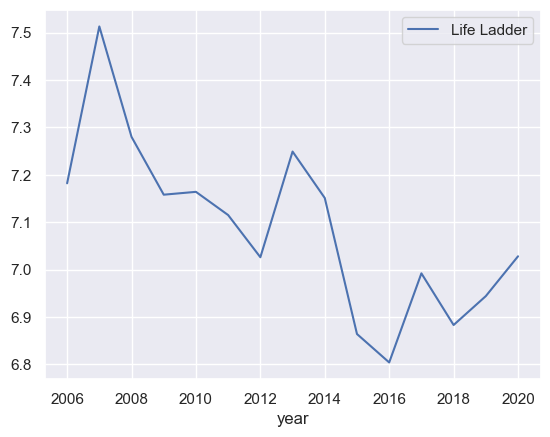

In [531]:
USA.plot(x='year', y='Life Ladder')

<Axes: xlabel='year'>

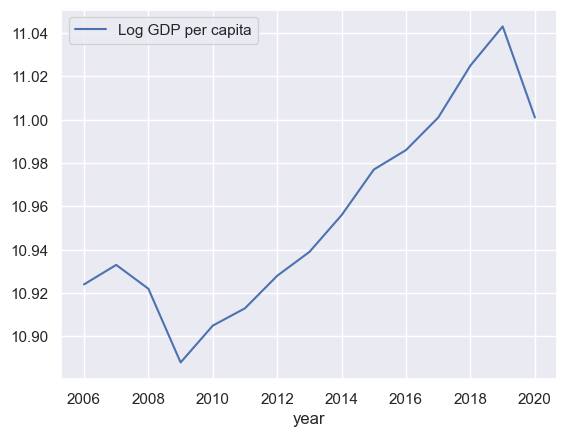

In [532]:
USA.plot(y='Log GDP per capita', x='year')

<Axes: xlabel='year'>

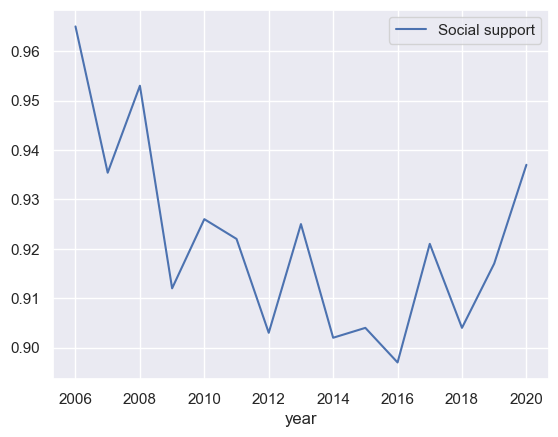

In [533]:
USA.plot(x='year', y='Social support')

<Axes: xlabel='year'>

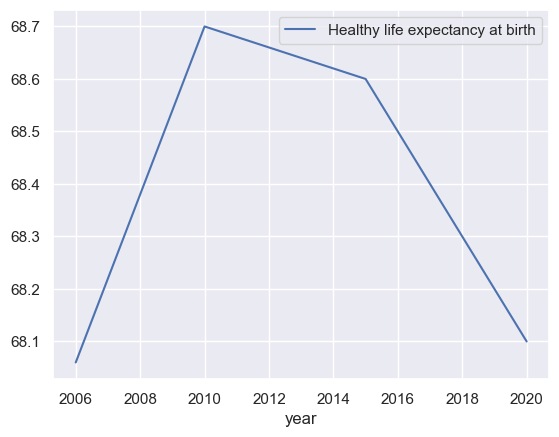

In [534]:
USA.plot(x='year', y='Healthy life expectancy at birth')

<Axes: xlabel='year'>

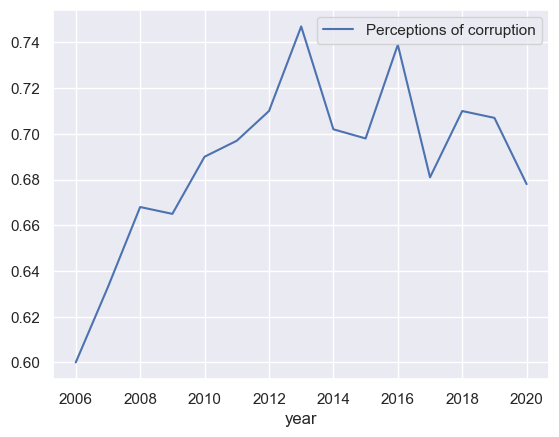

In [535]:
USA.plot(x='year', y='Perceptions of corruption')

<Axes: ylabel='Frequency'>

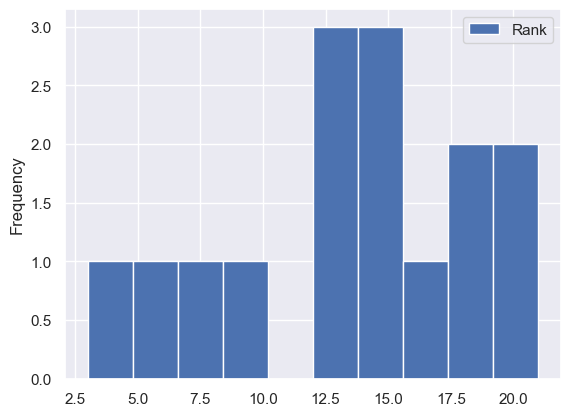

In [536]:
USA.plot(y='Rank', kind='hist')

In [537]:
USA['Rank'].value_counts()

Rank
14.0    2
12.0    2
19.0    2
5.0     1
3.0     1
10.0    1
8.0     1
13.0    1
17.0    1
15.0    1
21.0    1
20.0    1
Name: count, dtype: int64

In [538]:
Germany = df[df['Country name'] == 'Germany']
Germany

Country name    year  Life Ladder  Log GDP per capita  Social support  \
606      Germany  2005.0        6.620              10.689           0.963   
607      Germany  2007.0        6.417              10.759           0.926   
608      Germany  2008.0        6.522              10.770           0.923   
609      Germany  2009.0        6.641              10.714           0.935   
610      Germany  2010.0        6.725              10.756           0.939   
611      Germany  2011.0        6.621              10.813           0.947   
612      Germany  2012.0        6.702              10.816           0.926   
613      Germany  2013.0        6.965              10.817           0.931   
614      Germany  2014.0        6.984              10.835           0.938   
615      Germany  2015.0        7.037              10.844           0.926   
616      Germany  2016.0        6.874              10.858           0.906   
617      Germany  2017.0        7.074              10.878           0.892   
618      Germany  2018.0        7.118              10.890           0.920   
619      Germany  2019.0        7.035              10.893           0.886   
620      Germany  2020.0        7.312              10.833           0.905   

     Healthy life expectancy at birth  Freedom to make life choices  \
606                             70.20                         0.847   
607                             70.48                         0.801   
608                             70.62                         0.766   
609                             70.76                         0.844   
610                             70.90                         0.843   
611                             70.98                         0.906   
612                             71.06                         0.904   
613                             71.14                         0.894   
614                             71.22                         0.899   
615                             71.30                         0.889   
616                             71.60                         0.871   
617                             71.90                         0.841   
618                             72.20                         0.877   
619                             72.50                         0.885   
620                             72.80                         0.864   

     Generosity  Perceptions of corruption  Positive affect  Negative affect  \
606      0.1972                      0.781            0.776            0.197   
607      0.1670                      0.792            0.732            0.231   
608      0.1158                      0.758            0.787            0.220   
609      0.1270                      0.690            0.792            0.206   
610      0.0950                      0.688            0.794            0.182   
611      0.0330                      0.677            0.794            0.165   
612      0.0710                      0.679            0.804            0.170   
613      0.0240                      0.566            0.743            0.205   
614      0.0880                      0.474            0.785            0.188   
615      0.1780                      0.412            0.765            0.203   
616      0.1480                      0.446            0.738            0.187   
617      0.1450                      0.414            0.737            0.196   
618      0.0340                      0.496            0.780            0.243   
619      0.0570                      0.462            0.751            0.226   
620     -0.0600                      0.424            0.760            0.206   

     Rank  
606  14.0  
607  21.0  
608  26.0  
609  18.0  
610  25.0  
611  27.0  
612  23.0  
613  17.0  
614  16.0  
615  13.0  
616  17.0  
617  15.0  
618  14.0  
619  17.0  
620   7.0

<Axes: >

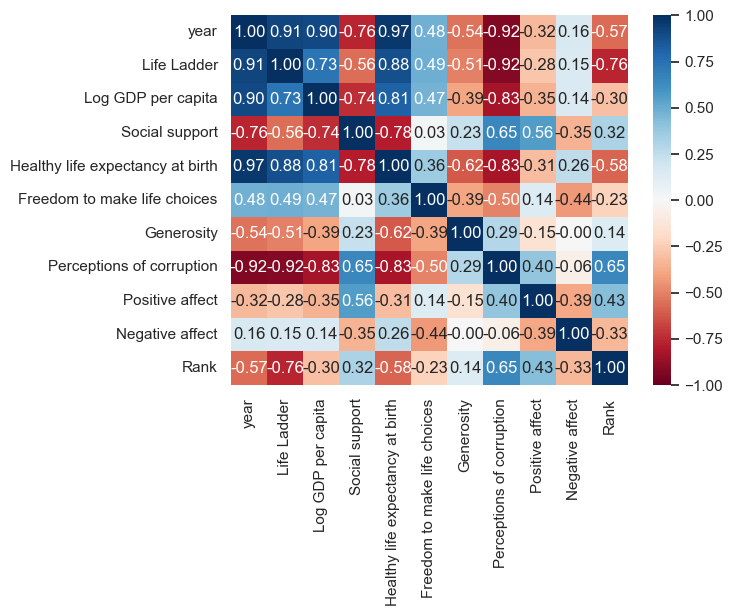

In [539]:
sns.heatmap(Germany.select_dtypes(include=['float', 'int']).corr(), vmax=1, vmin=-1, fmt='.2f', annot=True, cmap='RdBu')

<Axes: xlabel='year'>

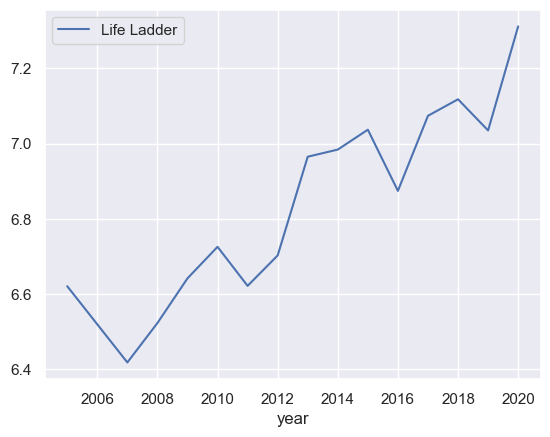

In [540]:
Germany.plot(x='year', y='Life Ladder')

<Axes: xlabel='year'>

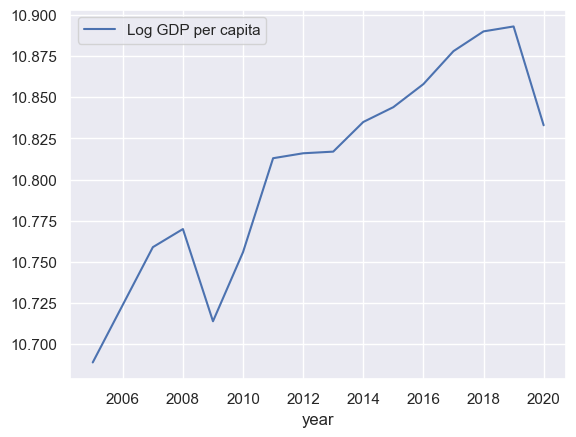

In [541]:
Germany.plot(y='Log GDP per capita', x='year')

<Axes: xlabel='year'>

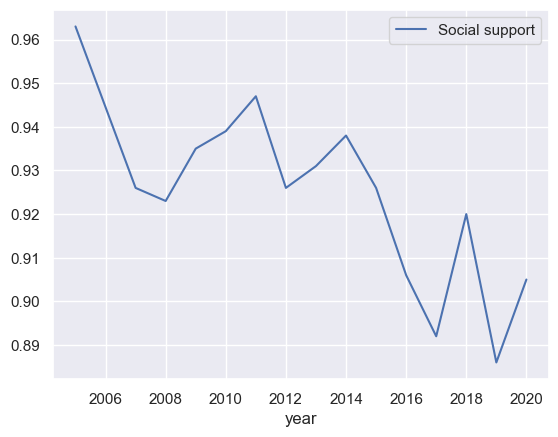

In [542]:
Germany.plot(x='year', y='Social support')

<Axes: xlabel='year'>

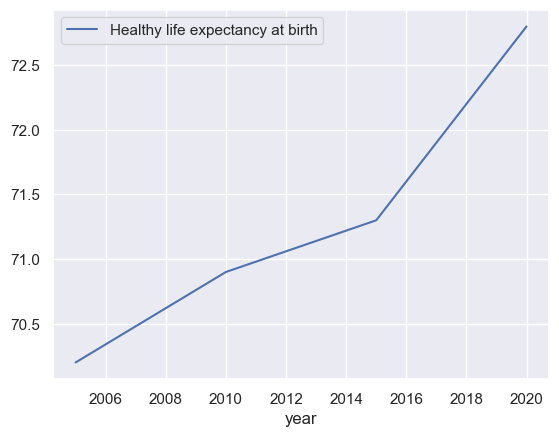

In [543]:
Germany.plot(x='year', y='Healthy life expectancy at birth')

<Axes: xlabel='year'>

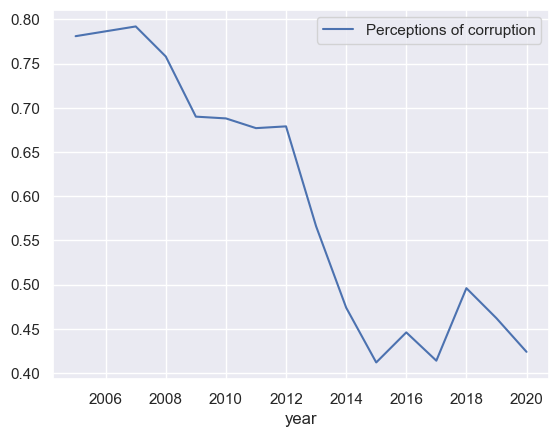

In [544]:
Germany.plot(x='year', y='Perceptions of corruption')

<Axes: ylabel='Frequency'>

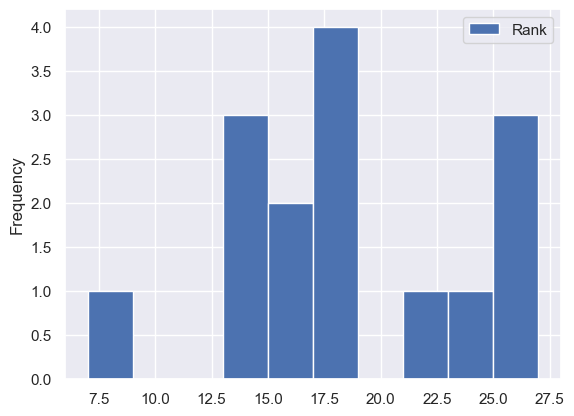

In [545]:
Germany.plot(y='Rank', kind='hist')

In [546]:
Germany['Rank'].value_counts()

Rank
17.0    3
14.0    2
21.0    1
26.0    1
18.0    1
25.0    1
27.0    1
23.0    1
16.0    1
13.0    1
15.0    1
7.0     1
Name: count, dtype: int64

In [547]:
China = df[df['Country name'] == 'China']
China

Country name    year  Life Ladder  Log GDP per capita  Social support  \
342        China  2006.0        4.560               8.696           0.747   
343        China  2007.0        4.863               8.824           0.811   
344        China  2008.0        4.846               8.911           0.748   
345        China  2009.0        4.454               8.996           0.798   
346        China  2010.0        4.653               9.092           0.768   
347        China  2011.0        5.037               9.179           0.787   
348        China  2012.0        5.095               9.249           0.788   
349        China  2013.0        5.241               9.319           0.778   
350        China  2014.0        5.196               9.386           0.820   
351        China  2015.0        5.304               9.449           0.794   
352        China  2016.0        5.325               9.510           0.742   
353        China  2017.0        5.099               9.571           0.772   
354        China  2018.0        5.131               9.632           0.788   
355        China  2019.0        5.144               9.688           0.822   
356        China  2020.0        5.771               9.702           0.808   

     Healthy life expectancy at birth  Freedom to make life choices  \
342                             66.88                        0.6664   
343                             67.06                        0.6064   
344                             67.24                        0.8530   
345                             67.42                        0.7710   
346                             67.60                        0.8050   
347                             67.76                        0.8240   
348                             67.92                        0.8080   
349                             68.08                        0.8050   
350                             68.24                        0.6056   
351                             68.40                        0.6654   
352                             68.70                        0.7500   
353                             69.00                        0.8780   
354                             69.30                        0.8950   
355                             69.60                        0.9270   
356                             69.90                        0.8910   

     Generosity  Perceptions of corruption  Positive affect  Negative affect  \
342     -0.0092                     0.8620            0.809            0.170   
343     -0.1760                     0.8158            0.817            0.159   
344     -0.0920                     0.7308            0.817            0.147   
345     -0.1600                     0.7428            0.786            0.162   
346     -0.1330                     0.8094            0.765            0.158   
347     -0.1860                     0.7530            0.820            0.134   
348     -0.1850                     0.7248            0.821            0.159   
349     -0.1580                     0.8390            0.836            0.142   
350     -0.2170                     0.8072            0.854            0.112   
351     -0.2440                     0.8050            0.809            0.171   
352     -0.2280                     0.8040            0.826            0.146   
353     -0.1750                     0.8314            0.821            0.214   
354     -0.1590                     0.8192            0.856            0.190   
355     -0.1730                     0.8126            0.891            0.147   
356     -0.1030                     0.7618            0.789            0.245   

     Rank  
342  65.0  
343  70.0  
344  71.0  
345  94.0  
346  92.0  
347  80.0  
348  82.0  
349  71.0  
350  82.0  
351  74.0  
352  77.0  
353  90.0  
354  90.0  
355  91.0  
356  52.0

<Axes: >

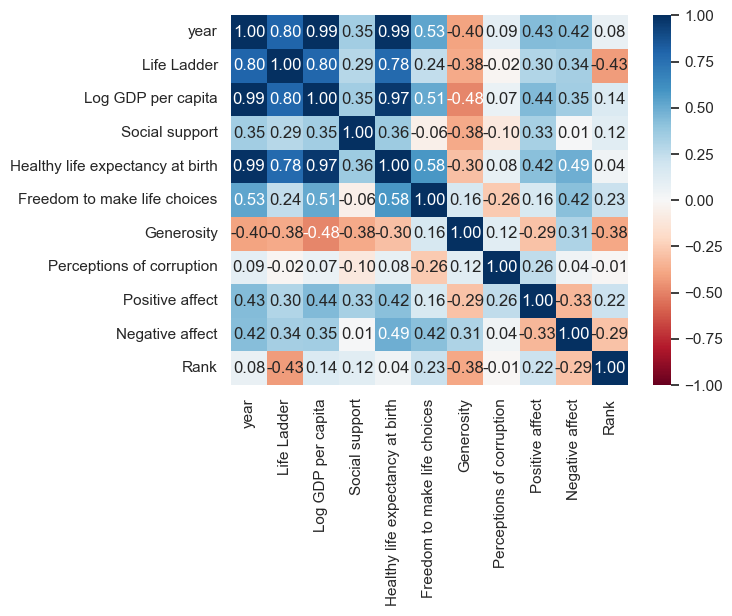

In [548]:
sns.heatmap(China.select_dtypes(include=['float', 'int']).corr(), vmax=1, vmin=-1, fmt='.2f', annot=True, cmap='RdBu')

<Axes: xlabel='year'>

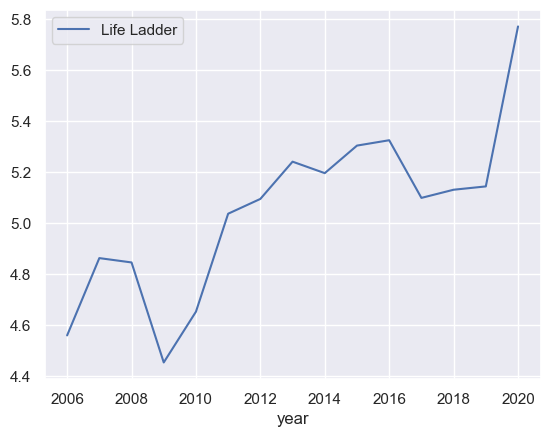

In [549]:
China.plot(x='year', y='Life Ladder')

<Axes: xlabel='year'>

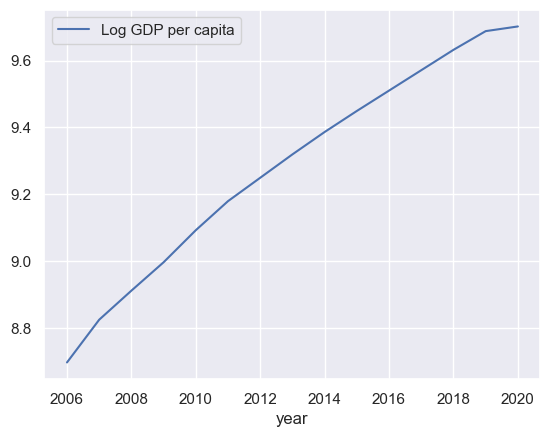

In [550]:
China.plot(y='Log GDP per capita', x='year')

<Axes: xlabel='year'>

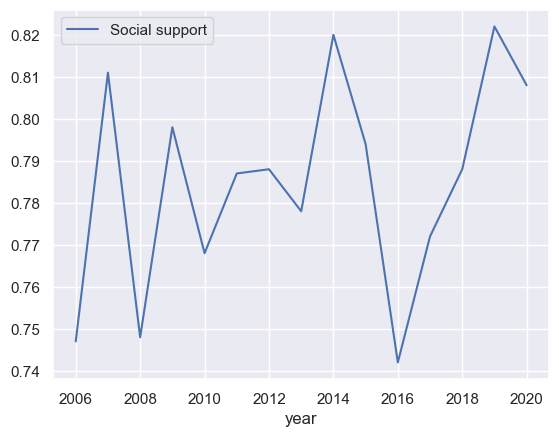

In [551]:
China.plot(x='year', y='Social support')

<Axes: xlabel='year'>

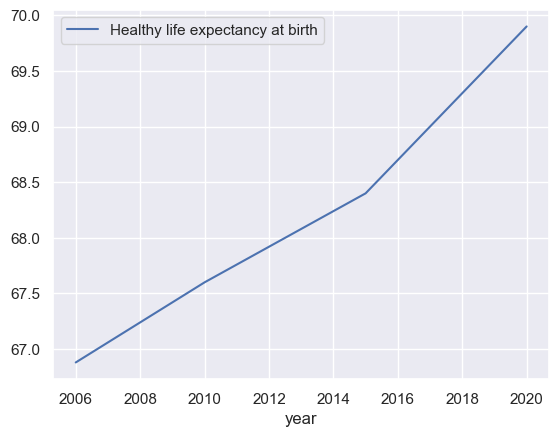

In [552]:
China.plot(x='year', y='Healthy life expectancy at birth')

<Axes: xlabel='year'>

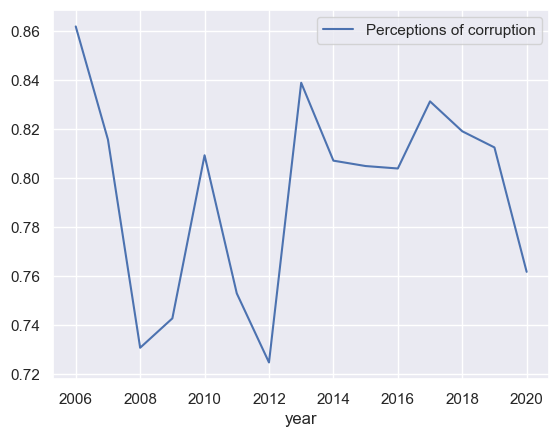

In [553]:
China.plot(x='year', y='Perceptions of corruption')

<Axes: ylabel='Frequency'>

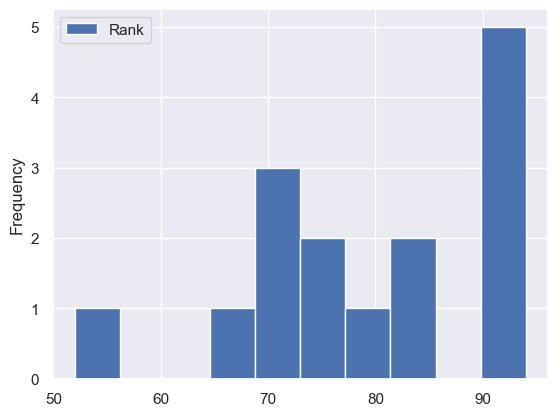

In [554]:
China.plot(y='Rank', kind='hist')

In [555]:
China['Rank'].value_counts()

Rank
71.0    2
82.0    2
90.0    2
65.0    1
70.0    1
94.0    1
92.0    1
80.0    1
74.0    1
77.0    1
91.0    1
52.0    1
Name: count, dtype: int64

In [557]:
Nicaragua = df[df['Country name'] == 'Nicaragua']
Nicaragua

Country name    year  Life Ladder  Log GDP per capita  Social support  \
1239    Nicaragua  2006.0        4.460               8.398           0.877   
1240    Nicaragua  2007.0        4.944               8.434           0.866   
1241    Nicaragua  2008.0        5.104               8.454           0.857   
1242    Nicaragua  2009.0        5.353               8.407           0.835   
1243    Nicaragua  2010.0        5.687               8.436           0.863   
1244    Nicaragua  2011.0        5.386               8.484           0.800   
1245    Nicaragua  2012.0        5.448               8.534           0.894   
1246    Nicaragua  2013.0        5.772               8.569           0.868   
1247    Nicaragua  2014.0        6.275               8.602           0.839   
1248    Nicaragua  2015.0        5.924               8.636           0.827   
1249    Nicaragua  2016.0        6.013               8.668           0.853   
1250    Nicaragua  2017.0        6.476               8.700           0.838   
1251    Nicaragua  2018.0        5.819               8.647           0.854   
1252    Nicaragua  2019.0        6.113               8.595           0.874   

      Healthy life expectancy at birth  Freedom to make life choices  \
1239                             64.14                         0.745   
1240                             64.48                         0.836   
1241                             64.82                         0.791   
1242                             65.16                         0.746   
1243                             65.50                         0.792   
1244                             65.72                         0.779   
1245                             65.94                         0.850   
1246                             66.16                         0.859   
1247                             66.38                         0.817   
1248                             66.60                         0.809   
1249                             66.90                         0.717   
1250                             67.20                         0.922   
1251                             67.50                         0.797   
1252                             67.80                         0.883   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  \
1239       0.010                      0.844            0.779            0.294   
1240       0.140                      0.826            0.810            0.287   
1241       0.076                      0.819            0.784            0.289   
1242       0.070                      0.794            0.781            0.299   
1243       0.018                      0.802            0.805            0.268   
1244      -0.020                      0.760            0.791            0.309   
1245       0.017                      0.644            0.803            0.255   
1246       0.039                      0.636            0.839            0.271   
1247       0.104                      0.699            0.813            0.334   
1248       0.077                      0.728            0.797            0.346   
1249       0.039                      0.731            0.805            0.380   
1250       0.010                      0.673            0.850            0.308   
1251       0.009                      0.713            0.793            0.408   
1252       0.029                      0.622            0.835            0.337   

      Rank  
1239  67.0  
1240  64.0  
1241  63.0  
1242  58.0  
1243  52.0  
1244  66.0  
1245  69.0  
1246  53.0  
1247  37.0  
1248  49.0  
1249  41.0  
1250  25.0  
1251  59.0  
1252  47.0

<Axes: >

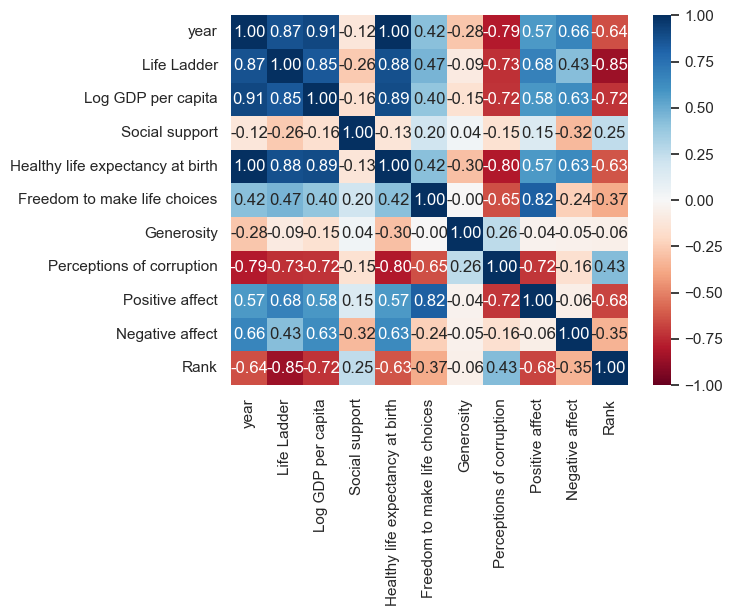

In [558]:
sns.heatmap(Nicaragua.select_dtypes(include=['float', 'int']).corr(), vmax=1, vmin=-1, fmt='.2f', annot=True, cmap='RdBu')

<Axes: xlabel='year'>

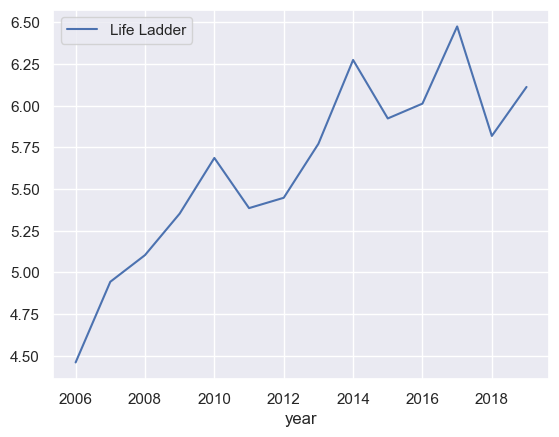

In [559]:
Nicaragua.plot(x='year', y='Life Ladder')

<Axes: xlabel='year'>

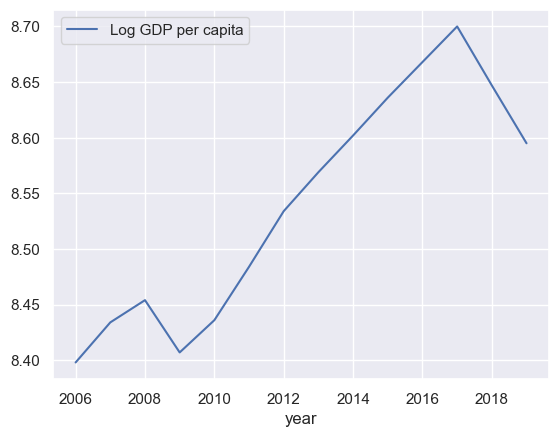

In [560]:
Nicaragua.plot(y='Log GDP per capita', x='year')

<Axes: xlabel='year'>

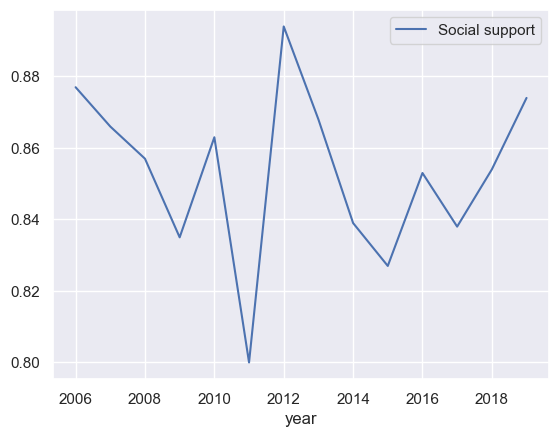

In [561]:
Nicaragua.plot(x='year', y='Social support')

<Axes: xlabel='year'>

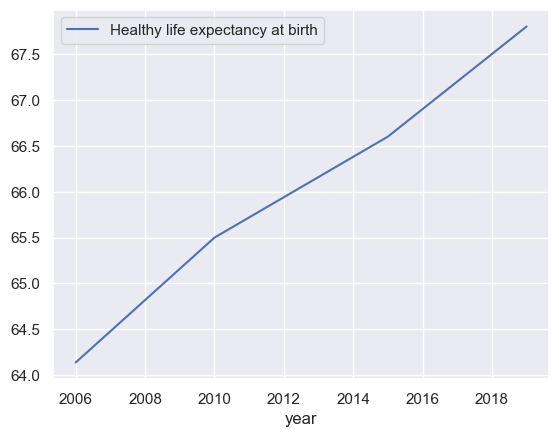

In [562]:
Nicaragua.plot(x='year', y='Healthy life expectancy at birth')

<Axes: xlabel='year'>

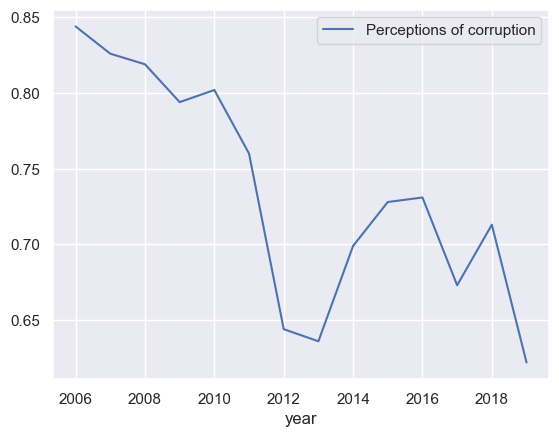

In [563]:
Nicaragua.plot(x='year', y='Perceptions of corruption')

<Axes: ylabel='Frequency'>

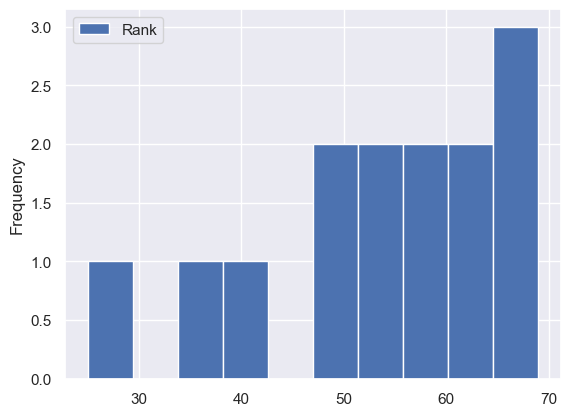

In [564]:
Nicaragua.plot(y='Rank', kind='hist')

In [565]:
Nicaragua['Rank'].value_counts()

Rank
67.0    1
64.0    1
63.0    1
58.0    1
52.0    1
66.0    1
69.0    1
53.0    1
37.0    1
49.0    1
41.0    1
25.0    1
59.0    1
47.0    1
Name: count, dtype: int64

In [566]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world

C:\Users\asus\AppData\Local\Temp\ipykernel_18984\54017565.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

In [567]:
merged = world.merge(df, right_on = 'Country name', left_on = 'name')
merged

pop_est      continent                 name iso_a3  gdp_md_est  \
0     58005463.0         Africa             Tanzania    TZA       63177   
1     58005463.0         Africa             Tanzania    TZA       63177   
2     58005463.0         Africa             Tanzania    TZA       63177   
3     58005463.0         Africa             Tanzania    TZA       63177   
4     58005463.0         Africa             Tanzania    TZA       63177   
...          ...            ...                  ...    ...         ...   
1798   1394973.0  North America  Trinidad and Tobago    TTO       24269   
1799  11062113.0         Africa             S. Sudan    SSD       11998   
1800  11062113.0         Africa             S. Sudan    SSD       11998   
1801  11062113.0         Africa             S. Sudan    SSD       11998   
1802  11062113.0         Africa             S. Sudan    SSD       11998   

                                               geometry         Country name  \
0     POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...             Tanzania   
1     POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...             Tanzania   
2     POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...             Tanzania   
3     POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...             Tanzania   
4     POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...             Tanzania   
...                                                 ...                  ...   
1798  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  Trinidad and Tobago   
1799  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...             S. Sudan   
1800  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...             S. Sudan   
1801  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...             S. Sudan   
1802  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...             S. Sudan   

        year  Life Ladder  Log GDP per capita  Social support  \
0     2006.0        3.922              7.4850           0.783   
1     2007.0        4.318              7.5220           0.708   
2     2008.0        4.385              7.5490           0.774   
3     2009.0        3.408              7.5720           0.837   
4     2010.0        3.229              7.6040           0.813   
...      ...          ...                 ...             ...   
1798  2017.0        6.192             10.1830           0.916   
1799  2014.0        3.832              7.8648           0.545   
1800  2015.0        4.071              7.8840           0.585   
1801  2016.0        2.888              7.6516           0.532   
1802  2017.0        2.817              7.9180           0.557   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                                48.70                         0.787   
1                                49.60                         0.716   
2                                50.50                         0.562   
3                                51.40                         0.607   
4                                52.30                         0.597   
...                                ...                           ...   
1798                             63.50                         0.859   
1799                             49.84                         0.567   
1800                             50.20                         0.512   
1801                             50.60                         0.440   
1802                             51.00                         0.456   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  \
0        -0.0270                      0.649            0.748            0.209   
1        -0.0130                      0.707            0.755            0.220   
2         0.2560                      0.930            0.744            0.178   
3         0.3080                      0.903            0.778            0.161   
4         0.1390                      0.866            0.717            0.146   
...          ..

<Axes: >

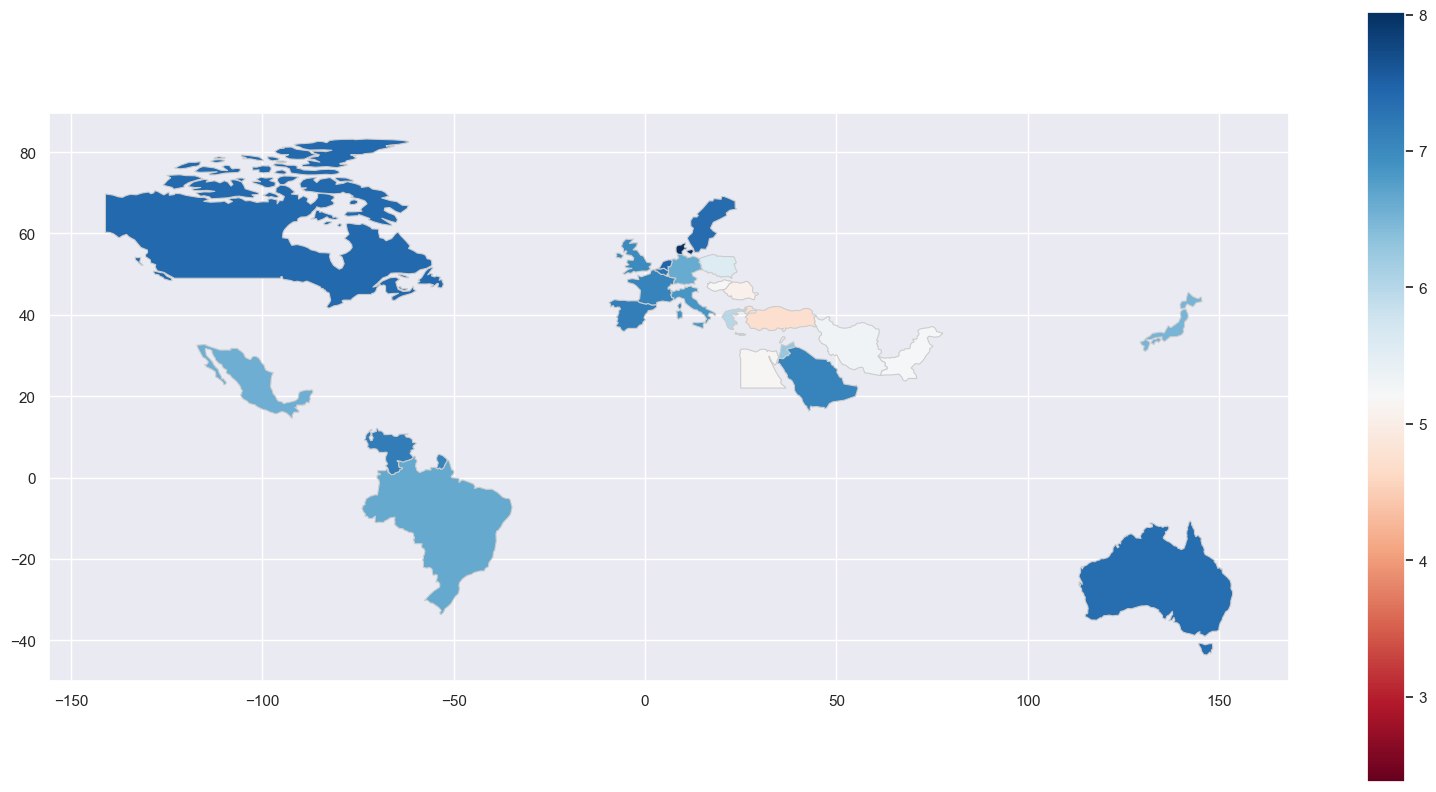

In [568]:
fig, ax = plt.subplots(figsize=(20,10))
merged[merged['year']== 2005].plot(column='Life Ladder', cmap='RdBu',ax=ax, linewidth=0.8, edgecolor='0.8', legend=True, vmin = 2.375000, vmax = 8.019000)

<Axes: >

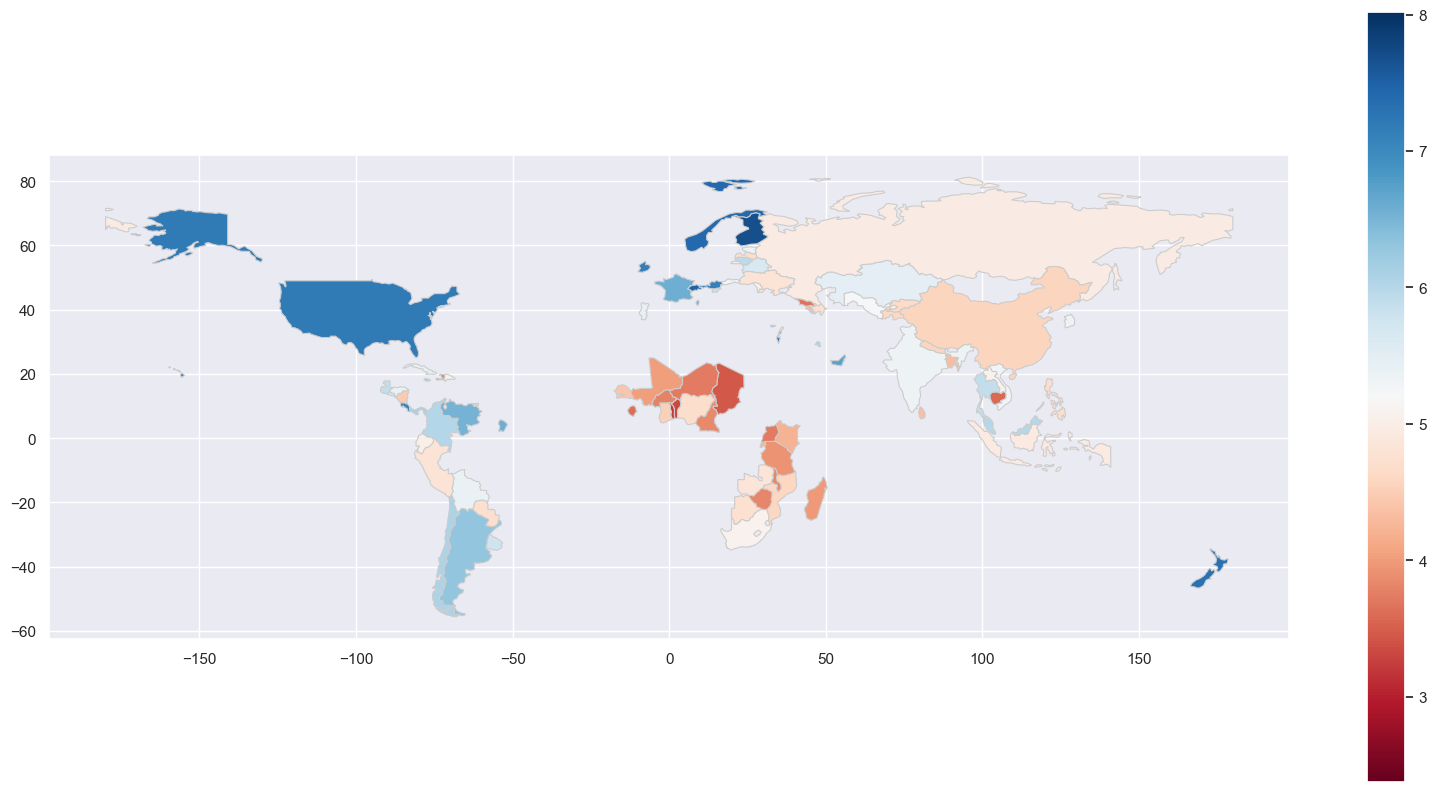

In [569]:
fig, ax = plt.subplots(figsize=(20,10))
merged[merged['year']== 2006].plot(column='Life Ladder', cmap='RdBu',ax=ax, linewidth=0.8, edgecolor='0.8', legend=True, vmin = 2.375000, vmax = 8.019000)

<Axes: >

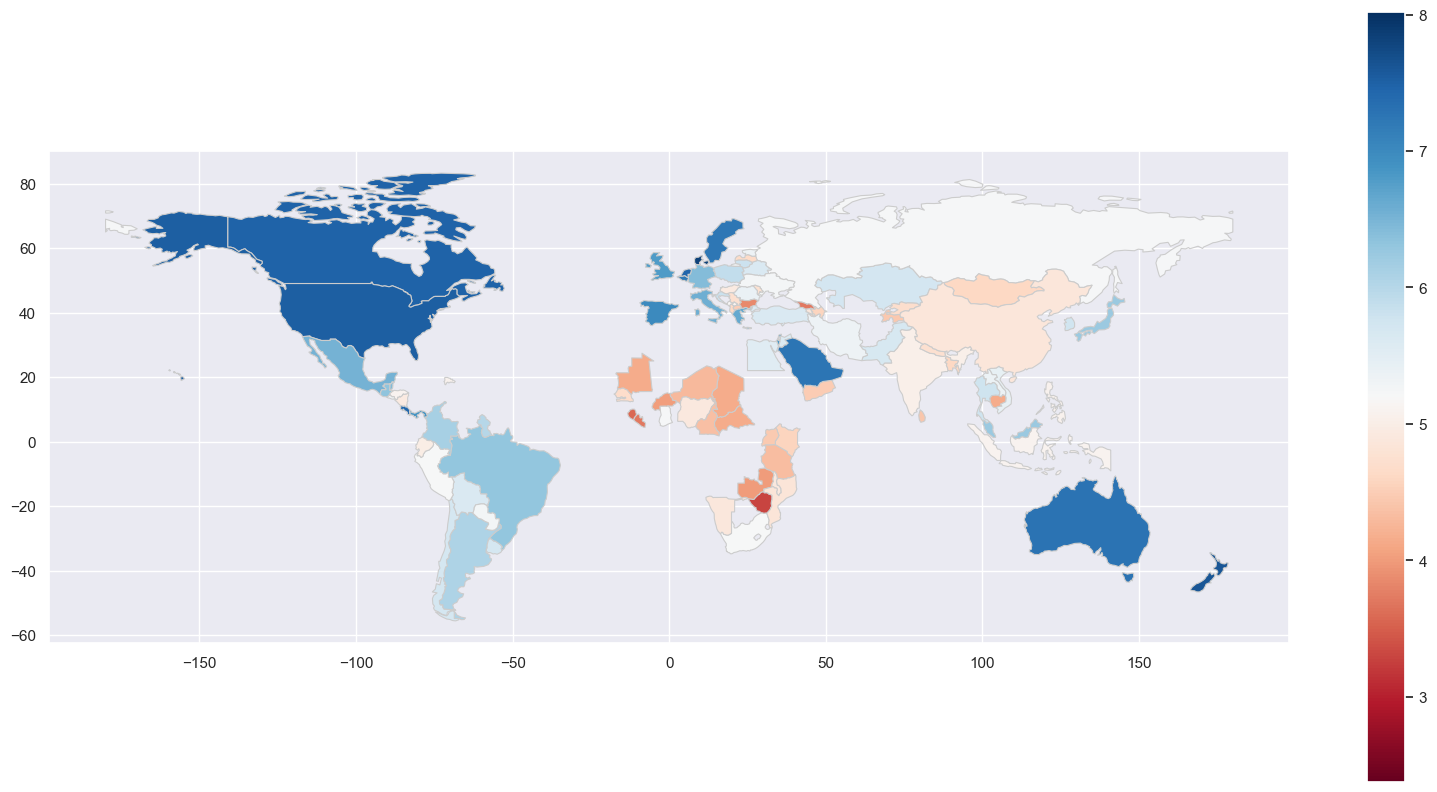

In [570]:
fig, ax = plt.subplots(figsize=(20,10))
merged[merged['year']== 2007].plot(column='Life Ladder', cmap='RdBu',ax=ax, linewidth=0.8, edgecolor='0.8', legend=True, vmin = 2.375000, vmax = 8.019000)

<Axes: >

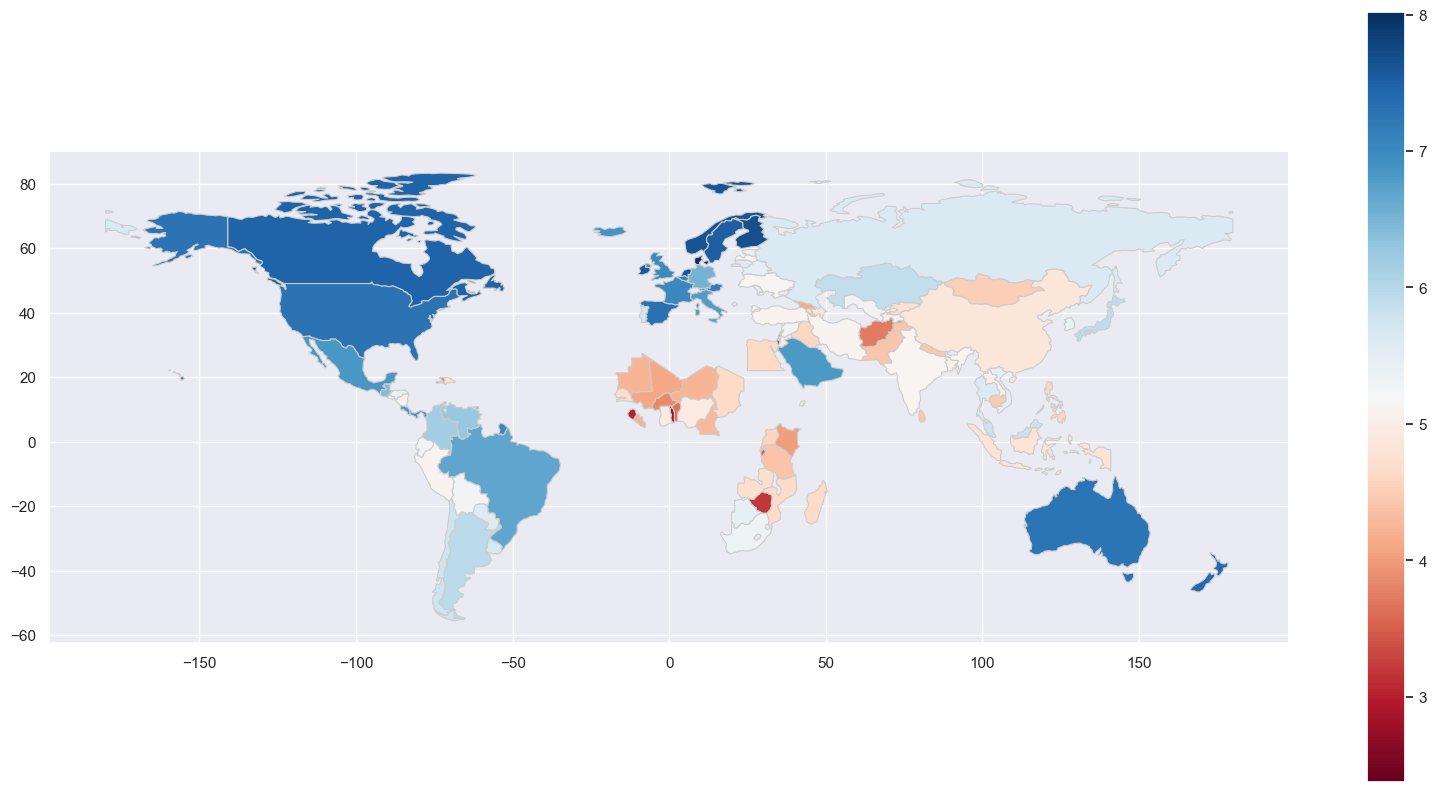

In [571]:
fig, ax = plt.subplots(figsize=(20,10))
merged[merged['year']== 2008].plot(column='Life Ladder', cmap='RdBu',ax=ax, linewidth=0.8, edgecolor='0.8', legend=True, vmin = 2.375000, vmax = 8.019000)

<Axes: >

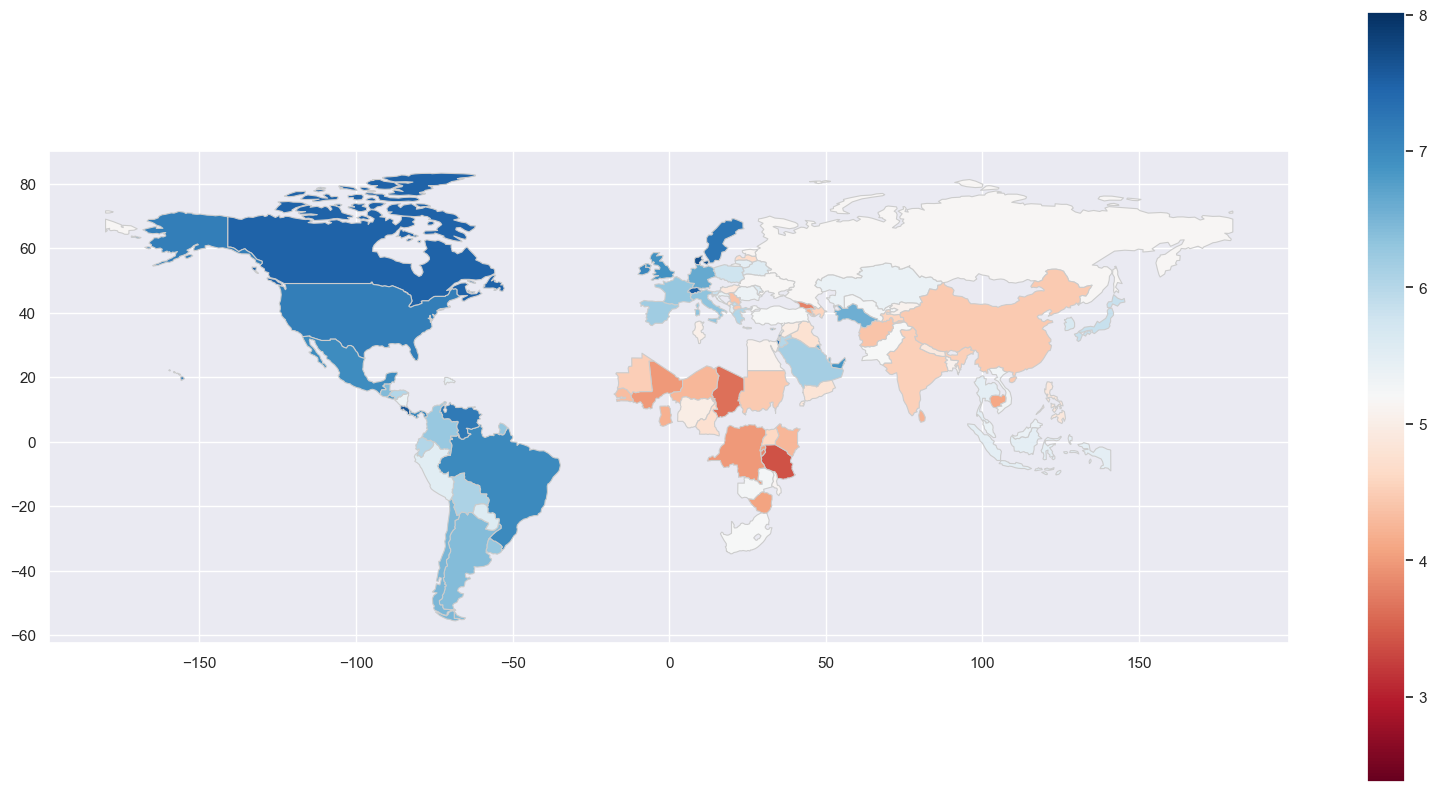

In [572]:
fig, ax = plt.subplots(figsize=(20,10))
merged[merged['year']== 2009].plot(column='Life Ladder', cmap='RdBu',ax=ax, linewidth=0.8, edgecolor='0.8', legend=True, vmin = 2.375000, vmax = 8.019000)

<Axes: >

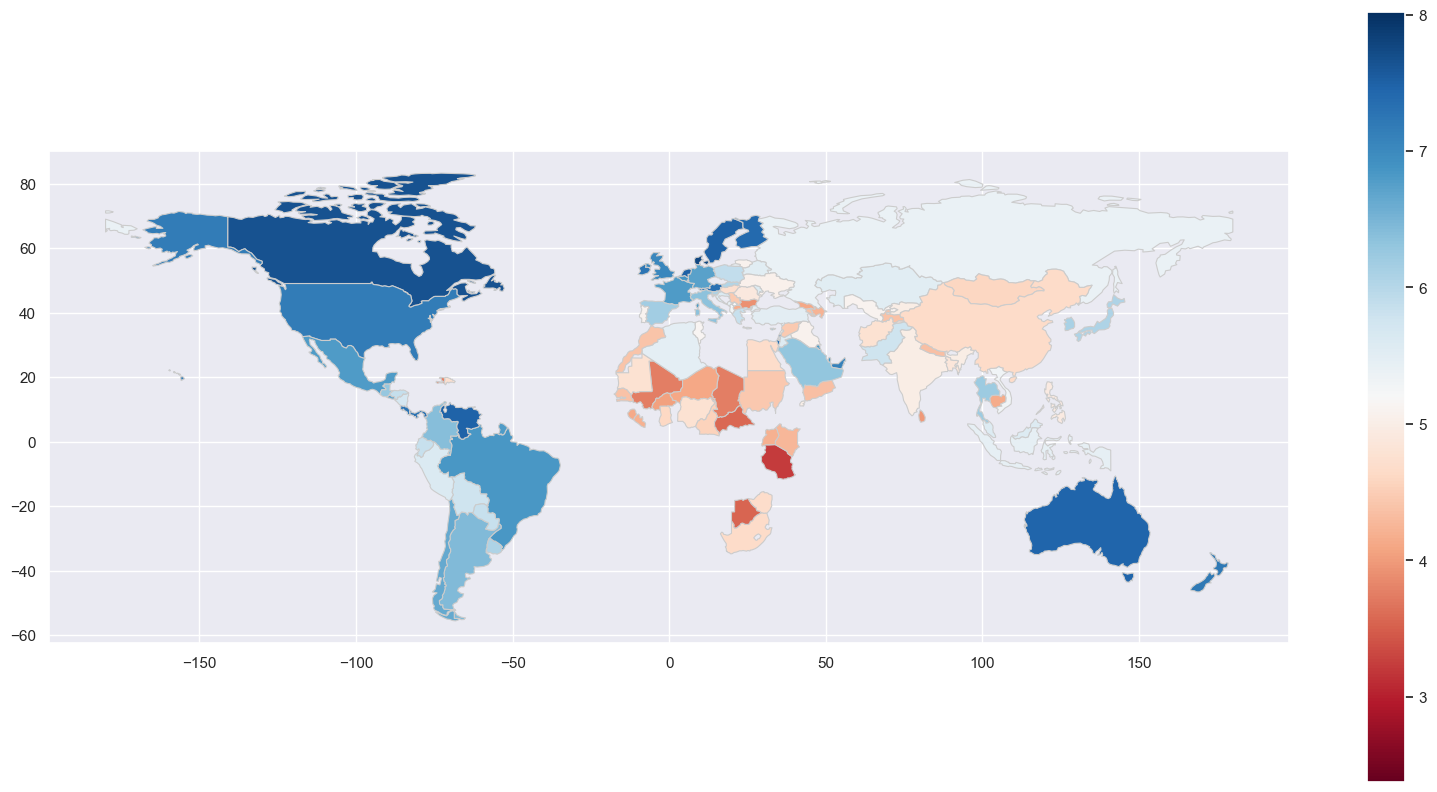

In [573]:
fig, ax = plt.subplots(figsize=(20,10))
merged[merged['year']== 2010].plot(column='Life Ladder', cmap='RdBu',ax=ax, linewidth=0.8, edgecolor='0.8', legend=True, vmin = 2.375000, vmax = 8.019000)

<Axes: >

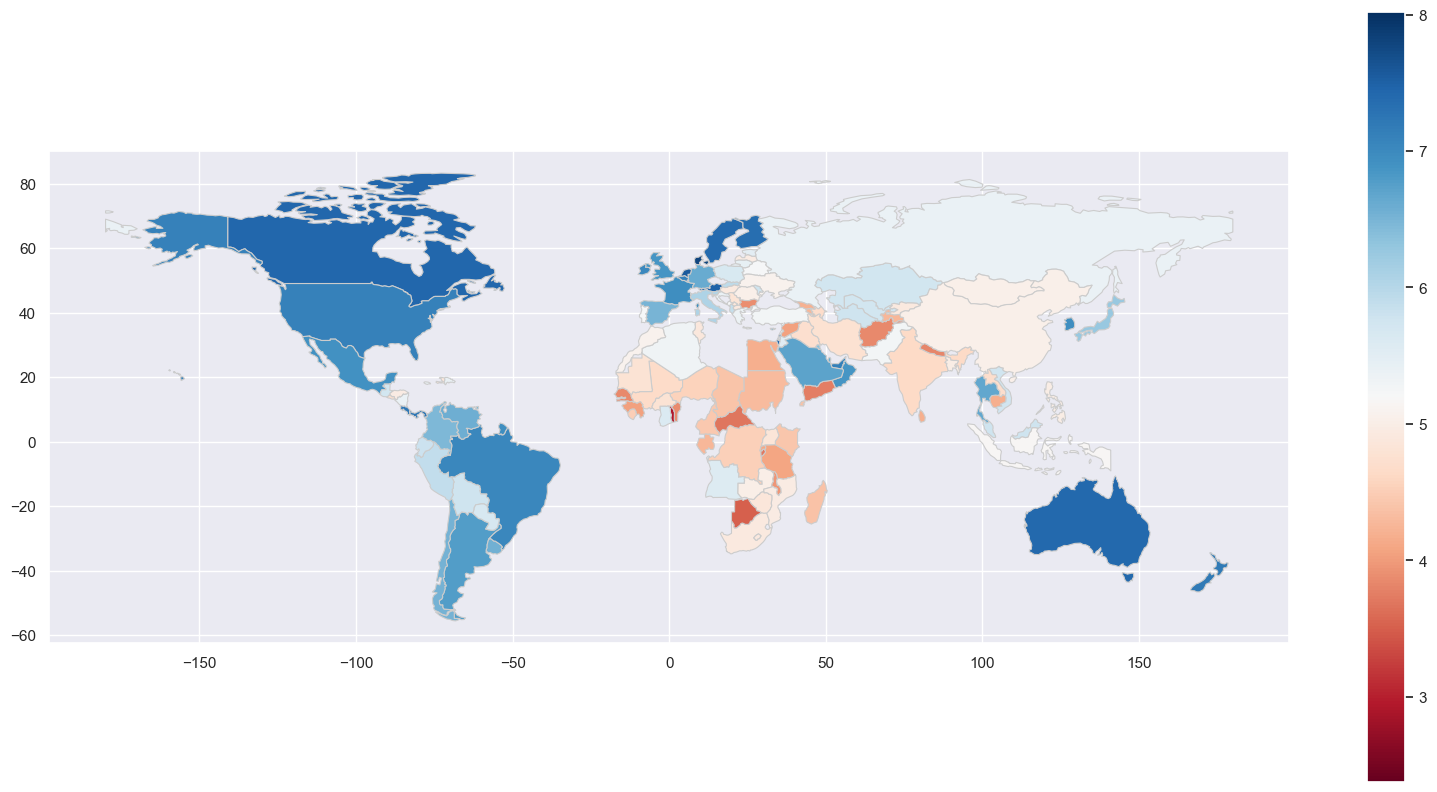

In [574]:
fig, ax = plt.subplots(figsize=(20,10))
merged[merged['year']== 2011].plot(column='Life Ladder', cmap='RdBu',ax=ax, linewidth=0.8, edgecolor='0.8', legend=True, vmin = 2.375000, vmax = 8.019000)

<Axes: >

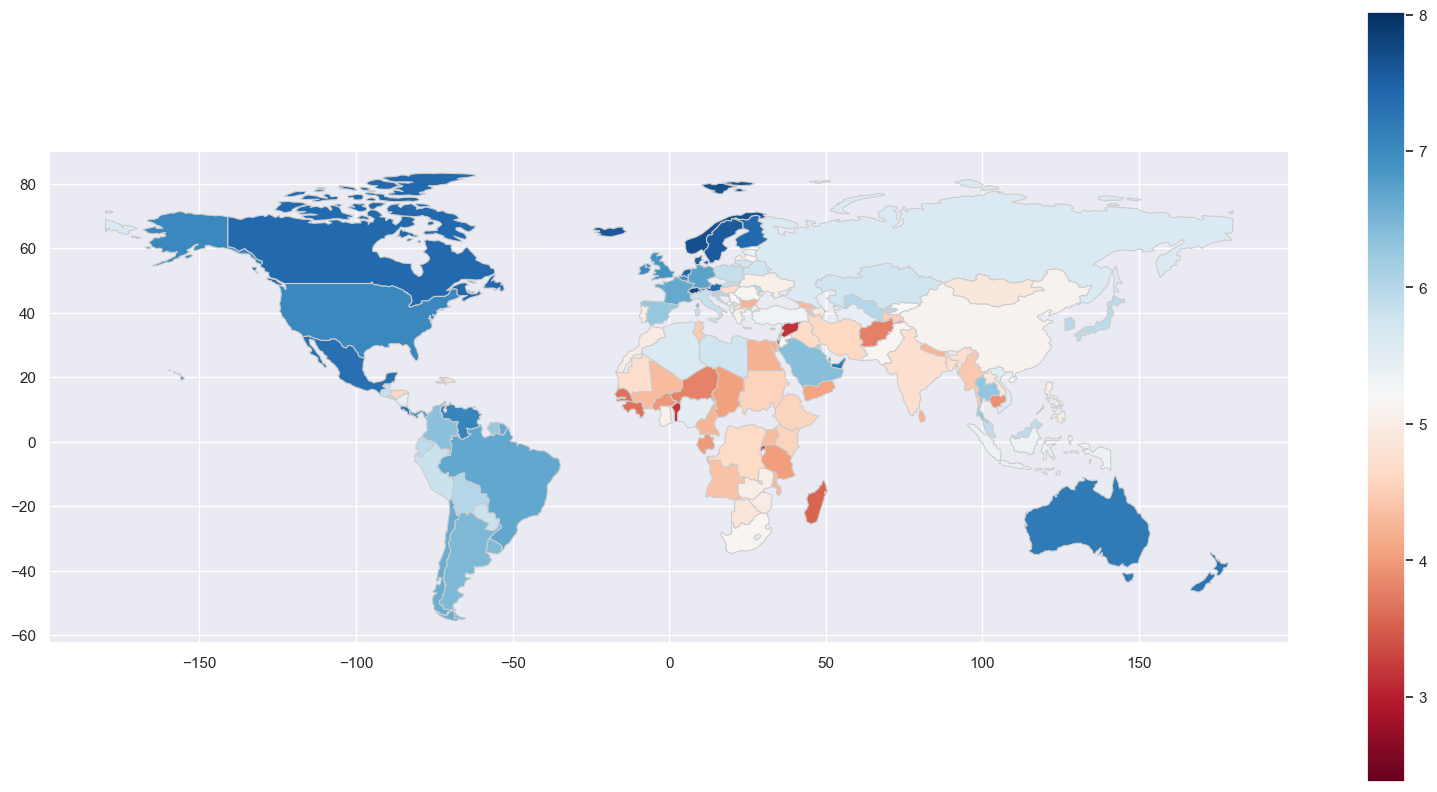

In [575]:
fig, ax = plt.subplots(figsize=(20,10))
merged[merged['year']== 2012].plot(column='Life Ladder', cmap='RdBu',ax=ax, linewidth=0.8, edgecolor='0.8', legend=True, vmin = 2.375000, vmax = 8.019000)

<Axes: >

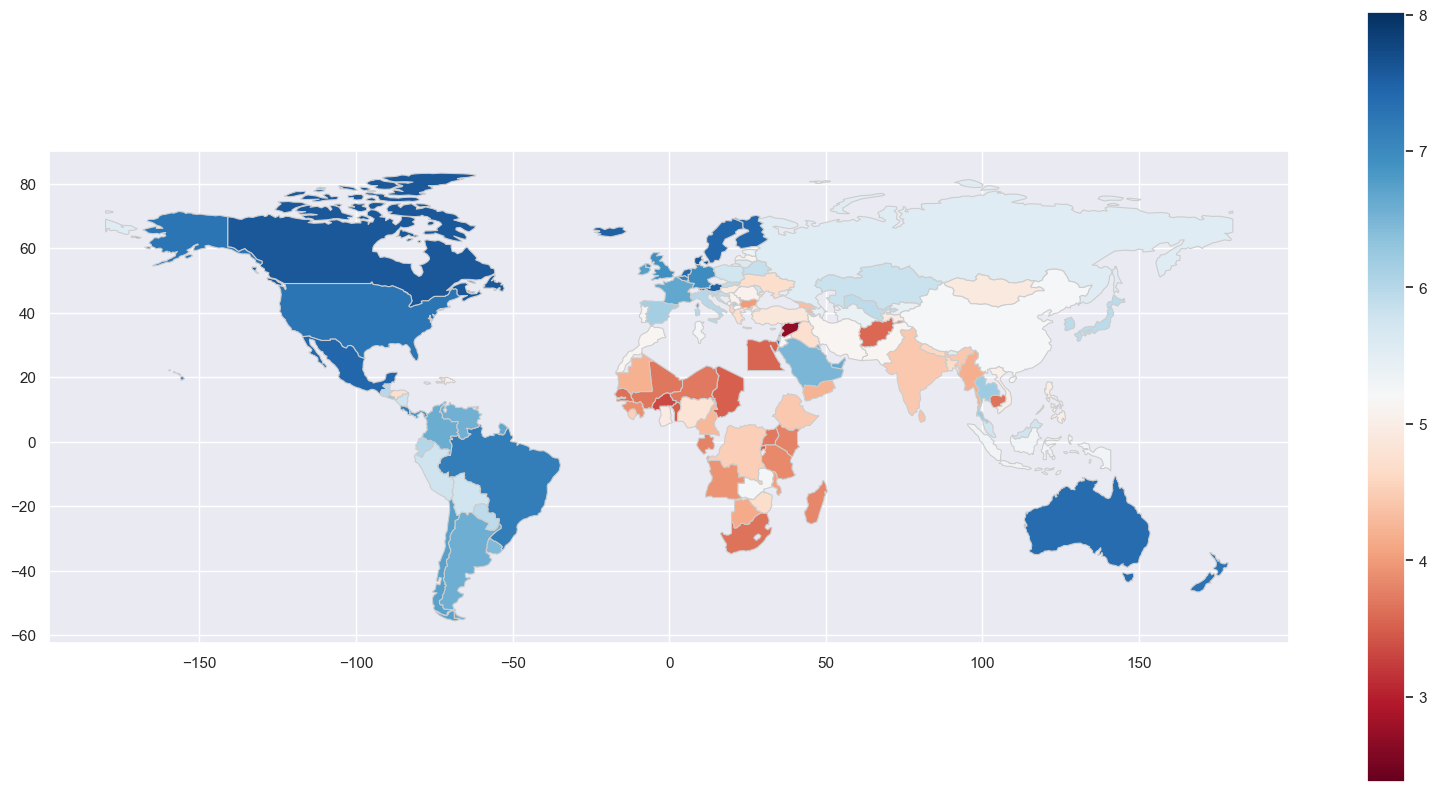

In [576]:
fig, ax = plt.subplots(figsize=(20,10))
merged[merged['year']== 2013].plot(column='Life Ladder', cmap='RdBu',ax=ax, linewidth=0.8, edgecolor='0.8', legend=True, vmin = 2.375000, vmax = 8.019000)

<Axes: >

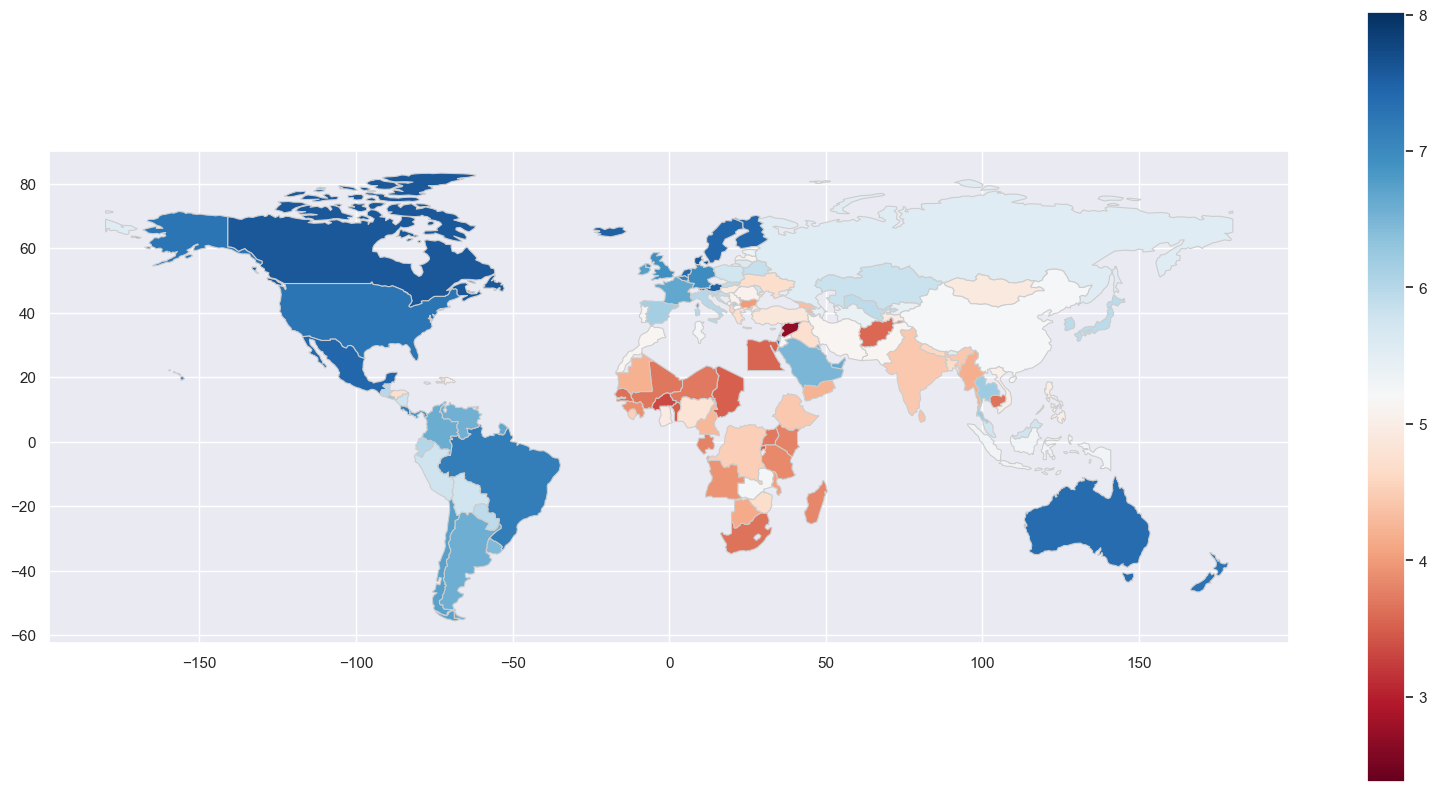

In [577]:
fig, ax = plt.subplots(figsize=(20,10))
merged[merged['year']== 2013].plot(column='Life Ladder', cmap='RdBu',ax=ax, linewidth=0.8, edgecolor='0.8', legend=True, vmin = 2.375000, vmax = 8.019000)

<Axes: >

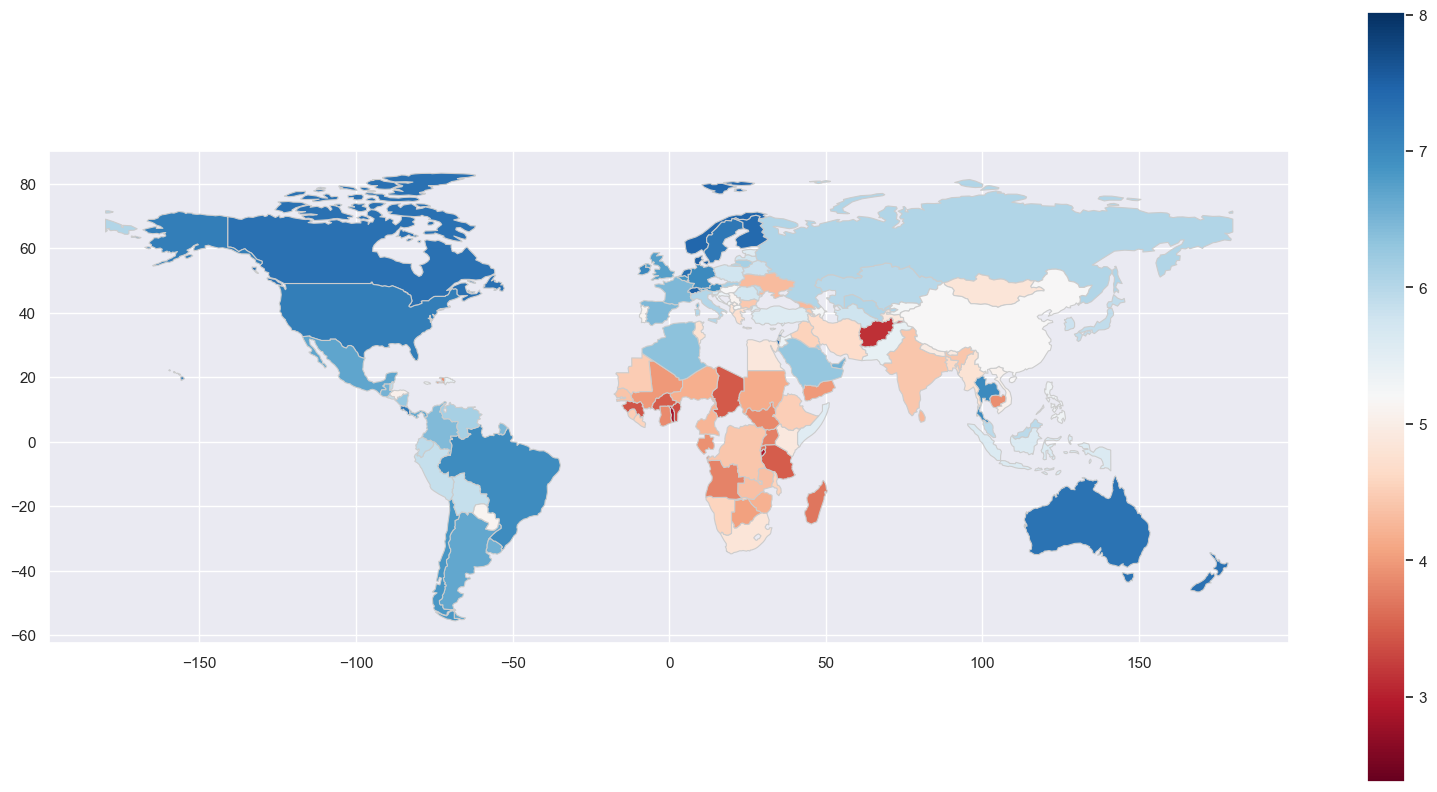

In [578]:
fig, ax = plt.subplots(figsize=(20,10))
merged[merged['year']== 2014].plot(column='Life Ladder', cmap='RdBu',ax=ax, linewidth=0.8, edgecolor='0.8', legend=True, vmin = 2.375000, vmax = 8.019000)

<Axes: >

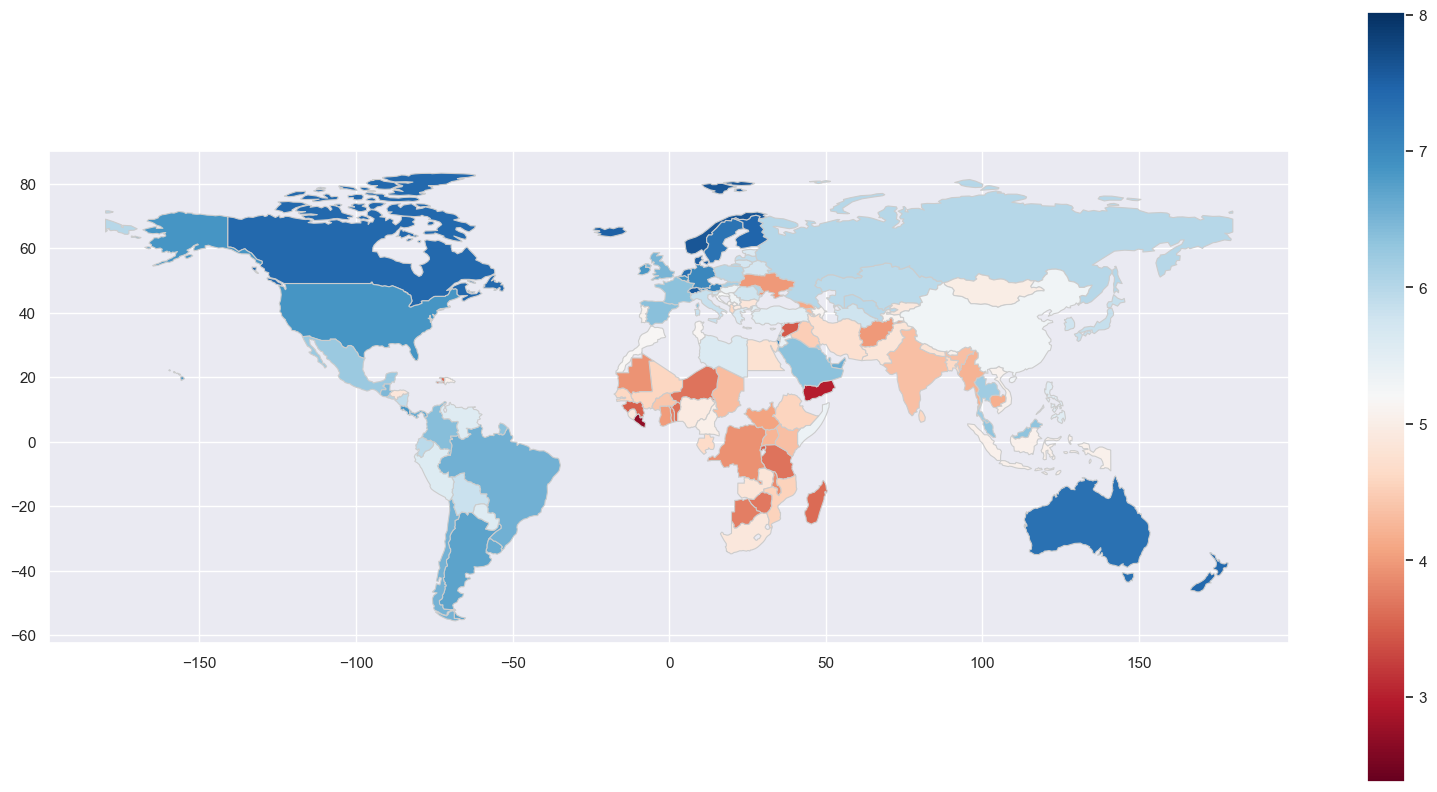

In [579]:
fig, ax = plt.subplots(figsize=(20,10))
merged[merged['year']== 2015].plot(column='Life Ladder', cmap='RdBu',ax=ax, linewidth=0.8, edgecolor='0.8', legend=True, vmin = 2.375000, vmax = 8.019000)

<Axes: >

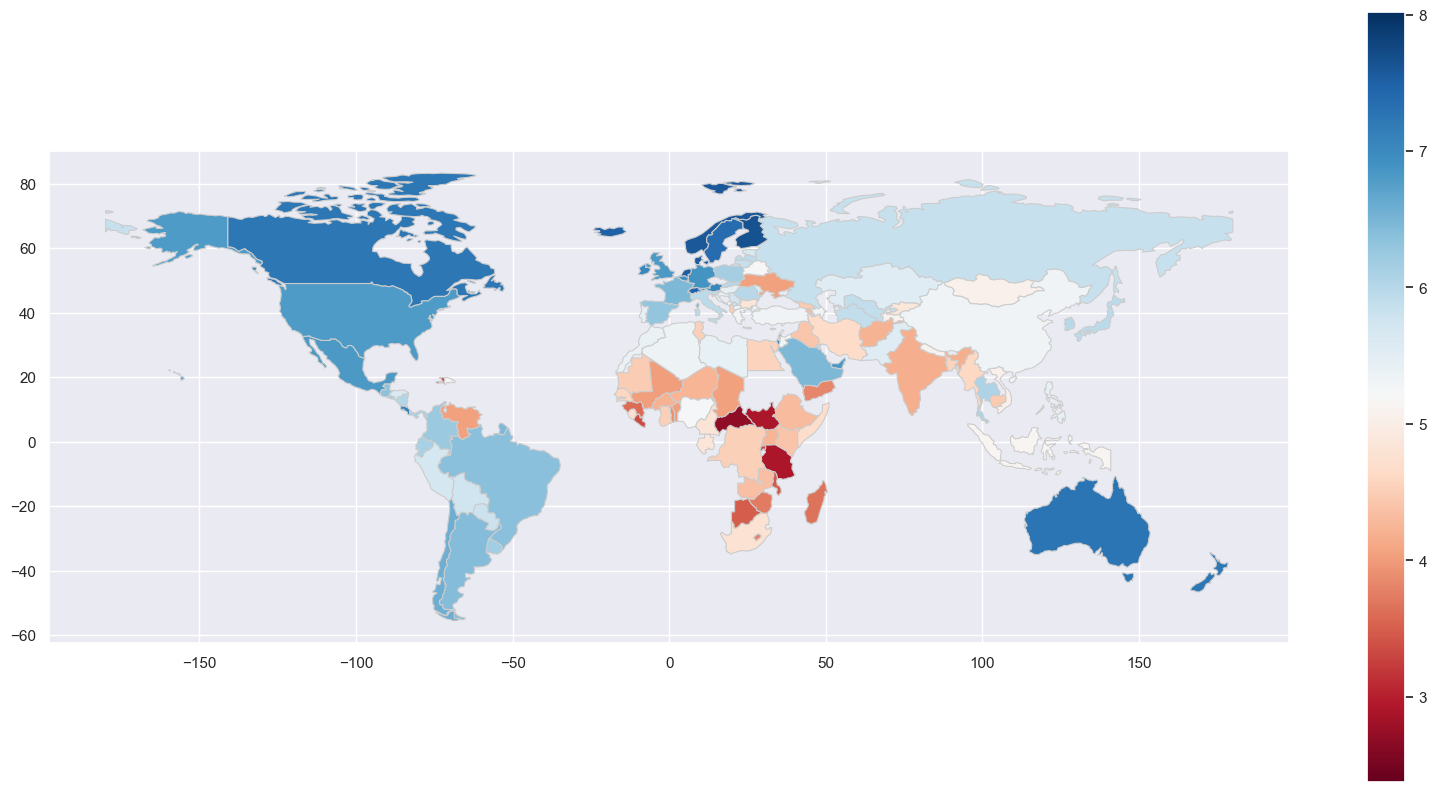

In [580]:
fig, ax = plt.subplots(figsize=(20,10))
merged[merged['year']== 2016].plot(column='Life Ladder', cmap='RdBu',ax=ax, linewidth=0.8, edgecolor='0.8', legend=True, vmin = 2.375000, vmax = 8.019000)

<Axes: >

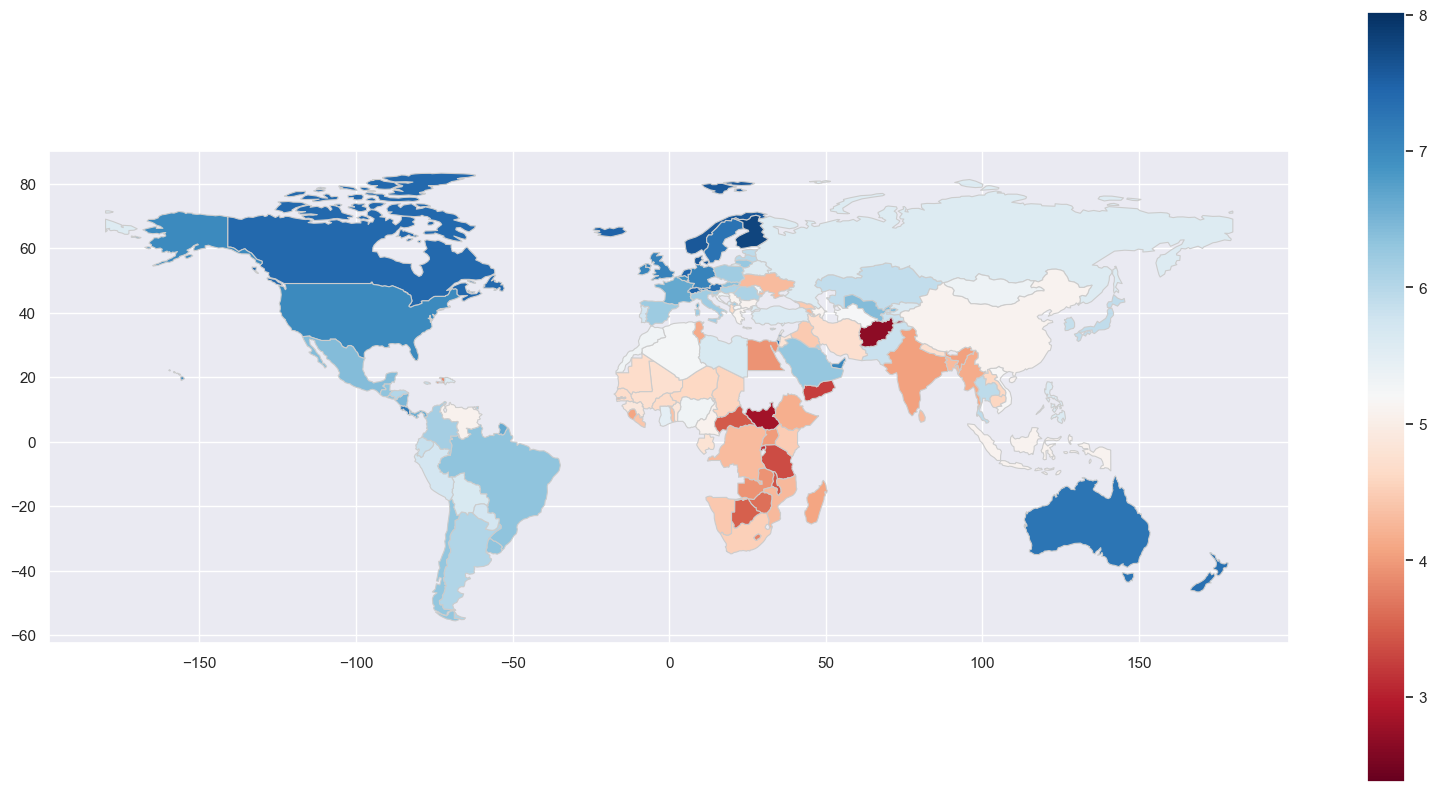

In [581]:
fig, ax = plt.subplots(figsize=(20,10))
merged[merged['year']== 2017].plot(column='Life Ladder', cmap='RdBu',ax=ax, linewidth=0.8, edgecolor='0.8', legend=True, vmin = 2.375000, vmax = 8.019000)

<Axes: >

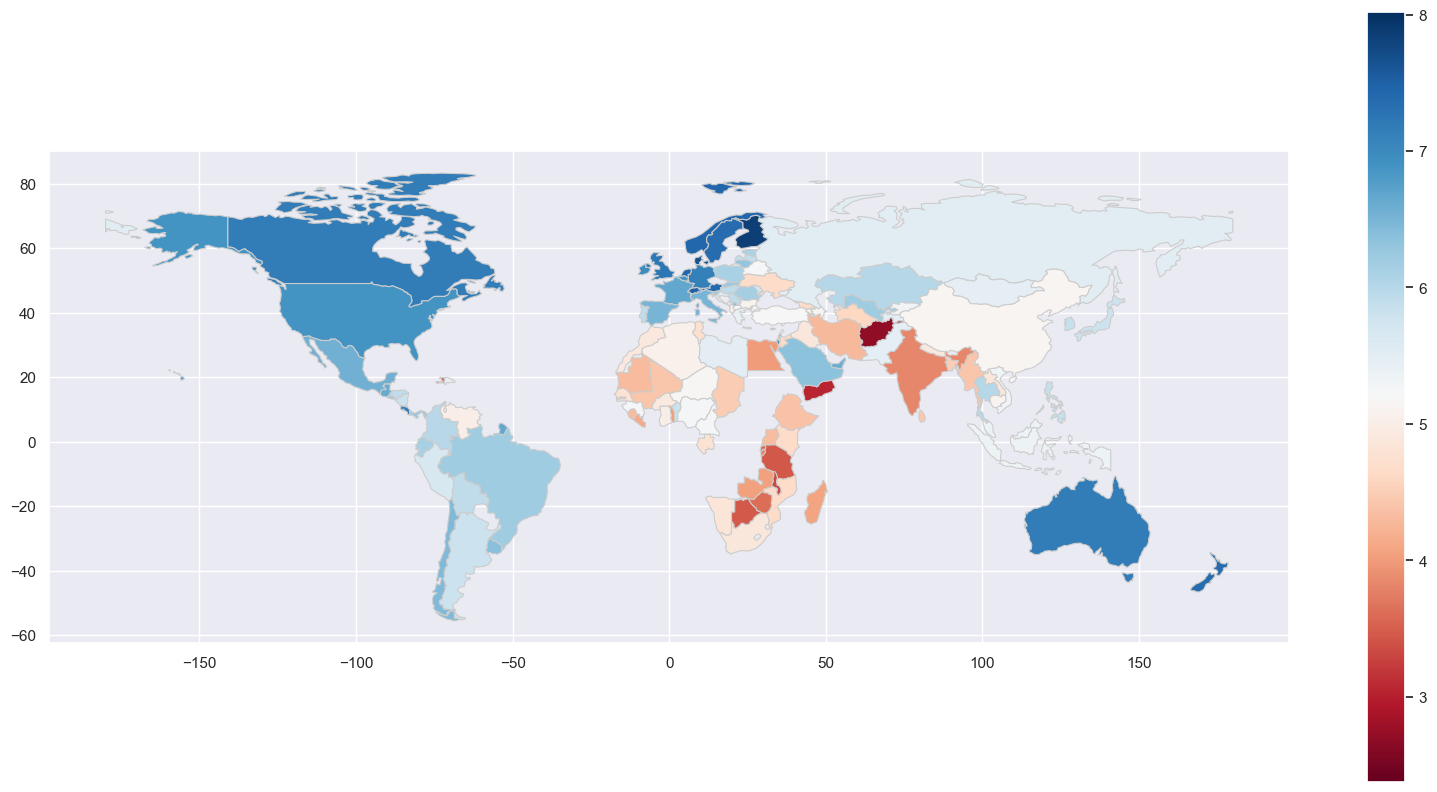

In [582]:
fig, ax = plt.subplots(figsize=(20,10))
merged[merged['year']== 2018].plot(column='Life Ladder', cmap='RdBu',ax=ax, linewidth=0.8, edgecolor='0.8', legend=True, vmin = 2.375000, vmax = 8.019000)

<Axes: >

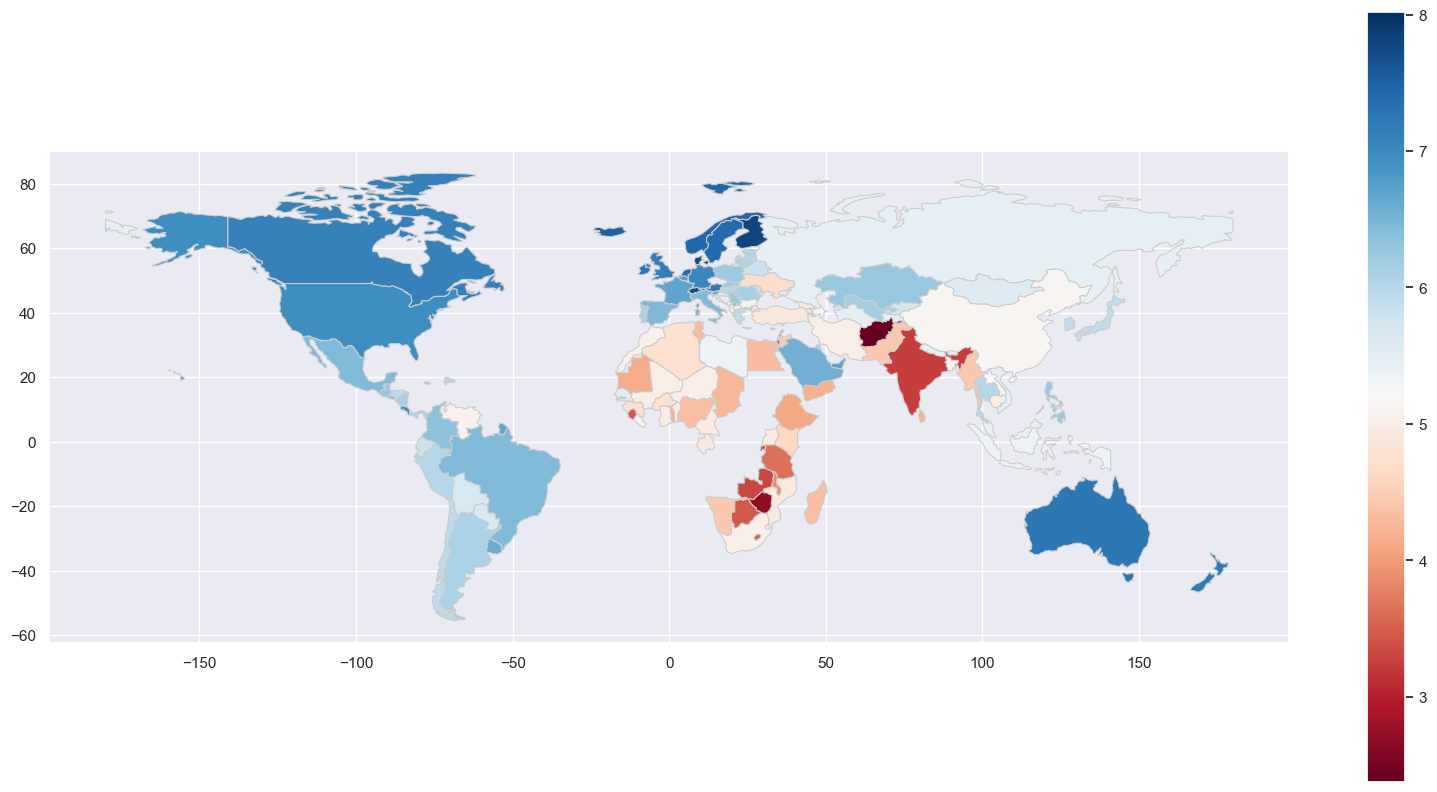

In [583]:
fig, ax = plt.subplots(figsize=(20,10))
merged[merged['year']== 2019].plot(column='Life Ladder', cmap='RdBu',ax=ax, linewidth=0.8, edgecolor='0.8', legend=True, vmin = 2.375000, vmax = 8.019000)

<Axes: >

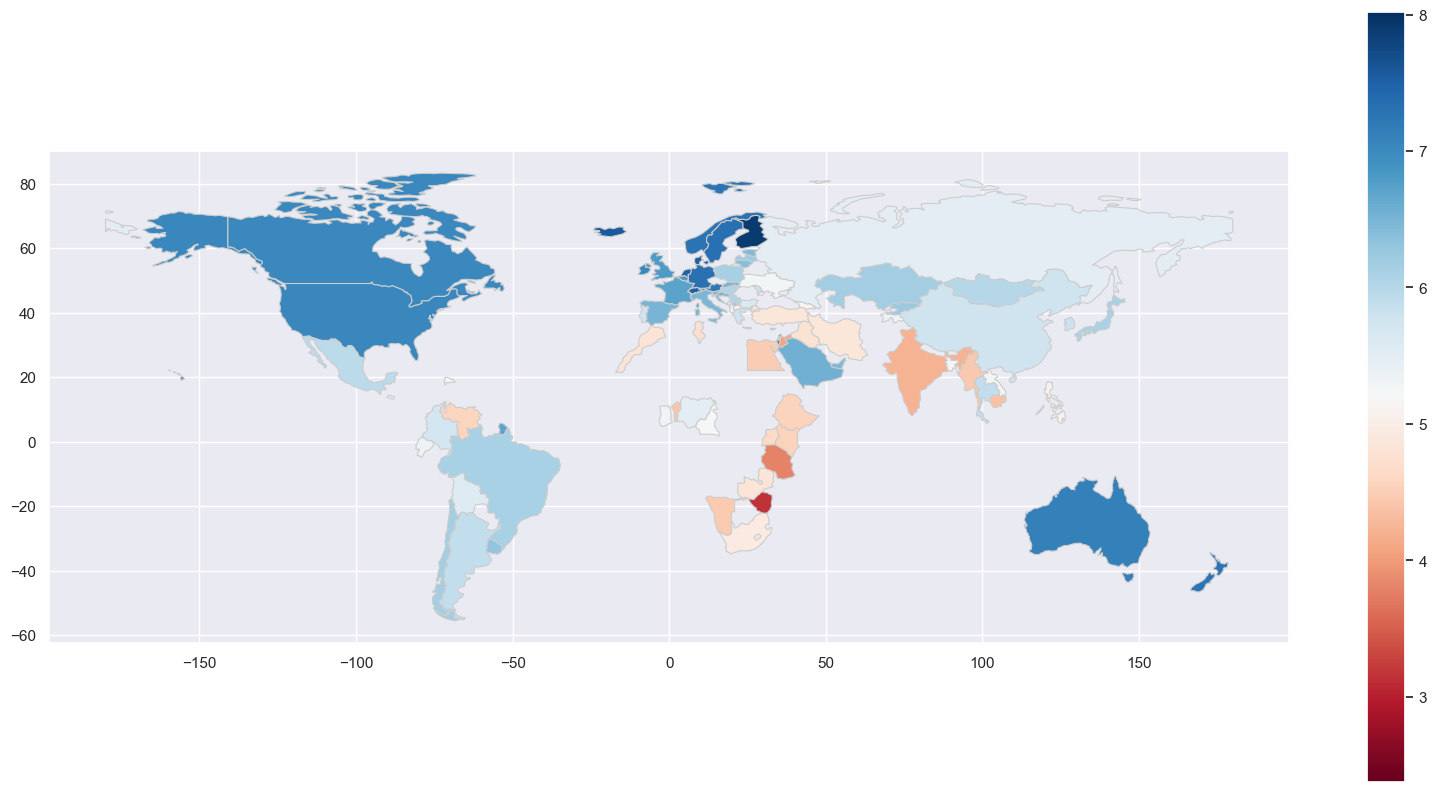

In [584]:
fig, ax = plt.subplots(figsize=(20,10))
merged[merged['year']== 2020].plot(column='Life Ladder', cmap='RdBu',ax=ax, linewidth=0.8, edgecolor='0.8', legend=True, vmin = 2.375000, vmax = 8.019000)

<Axes: >

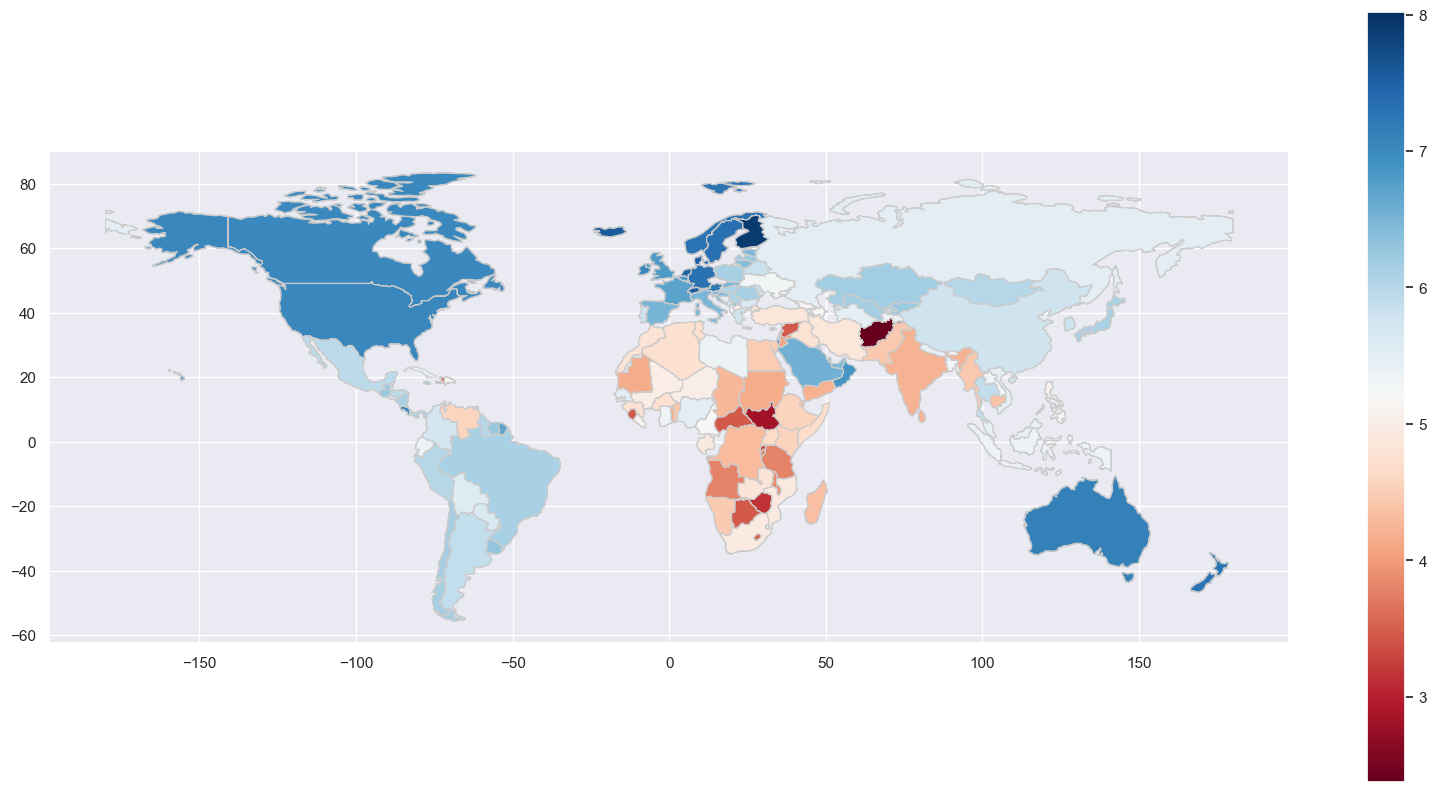

In [585]:
fig, ax = plt.subplots(figsize=(20,10))
merged.plot(column='Life Ladder', cmap='RdBu',ax=ax, linewidth=0.8, edgecolor='0.8', legend=True, vmin = 2.375000, vmax = 8.019000)

In [586]:
def label(Life_Ladder):
    if Life_Ladder < 4.5:
        return 'Unhappy'
    elif 4.5 <= Life_Ladder <= 6.5:
        return 'Average'
    else:
        return 'Happy'

In [587]:
df['Label'] = df['Life Ladder'].apply(label)
df

Country name    year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008.0        3.724               7.370           0.451   
1     Afghanistan  2009.0        4.402               7.540           0.552   
2     Afghanistan  2010.0        4.758               7.647           0.539   
3     Afghanistan  2011.0        3.832               7.620           0.521   
4     Afghanistan  2012.0        3.783               7.705           0.521   
...           ...     ...          ...                 ...             ...   
1944     Zimbabwe  2016.0        3.735               7.984           0.768   
1945     Zimbabwe  2017.0        3.638               8.016           0.754   
1946     Zimbabwe  2018.0        3.616               8.049           0.775   
1947     Zimbabwe  2019.0        2.694               7.950           0.759   
1948     Zimbabwe  2020.0        3.160               7.829           0.717   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                                50.80                         0.718   
1                                51.20                         0.679   
2                                51.60                         0.600   
3                                51.92                         0.496   
4                                52.24                         0.531   
...                                ...                           ...   
1944                             54.40                         0.733   
1945                             55.00                         0.753   
1946                             55.60                         0.763   
1947                             56.20                         0.632   
1948                             56.80                         0.643   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  \
0          0.168                      0.882            0.518            0.258   
1          0.190                      0.850            0.584            0.237   
2          0.121                      0.707            0.618            0.275   
3          0.162                      0.731            0.611            0.267   
4          0.236                      0.776            0.710            0.268   
...          ...                        ...              ...              ...   
1944      -0.095                      0.724            0.738            0.209   
1945      -0.098                      0.751            0.806            0.224   
1946      -0.068                      0.844            0.710            0.212   
1947      -0.064                      0.831            0.716            0.235   
1948      -0.009                      0.789            0.703            0.346   

       Rank    Label  
0     105.0  Unhappy  
1      96.0  Unhappy  
2      84.0  Average  
3     140.0  Unhappy  
4     136.0  Unhappy  
...     ...      ...  
1944  132.0  Unhappy  
1945  139.0  Unhappy  
1946  135.0  Unhappy  
1947  143.0  Unhappy  
1948   95.0  Unhappy  

[1949 rows x 13 columns]

# Modeling

In [588]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Rank', 'Label'],
      dtype='object')

In [589]:
X = df.drop(['Country name', 'year', 'Life Ladder', 'Rank', 'Label'], axis=1)
y = df['Life Ladder']

In [590]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X)

X = pd.DataFrame(scaler.transform(X), columns=X.columns)
X

Log GDP per capita  Social support  Healthy life expectancy at birth  \
0              -1.113600       -2.500000                         -1.469388   
1              -1.022933       -1.844156                         -1.428571   
2              -0.965867       -1.928571                         -1.387755   
3              -0.980267       -2.045455                         -1.355102   
4              -0.934933       -2.045455                         -1.322449   
...                  ...             ...                               ...   
1944           -0.786133       -0.441558                         -1.102041   
1945           -0.769067       -0.532468                         -1.040816   
1946           -0.751467       -0.396104                         -0.979592   
1947           -0.804267       -0.500000                         -0.918367   
1948           -0.868800       -0.772727                         -0.857143   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
0                        -0.211538    0.956914                   0.468208   
1                        -0.399038    1.067134                   0.283237   
2                        -0.778846    0.721443                  -0.543353   
3                        -1.278846    0.926854                  -0.404624   
4                        -1.110577    1.297595                  -0.144509   
...                            ...         ...                        ...   
1944                     -0.139423   -0.360721                  -0.445087   
1945                     -0.043269   -0.375752                  -0.289017   
1946                      0.004808   -0.225451                   0.248555   
1947                     -0.625000   -0.205411                   0.173410   
1948                     -0.572115    0.070140                  -0.069364   

      Positive affect  Negative affect  
0           -1.186047         0.000000  
1           -0.802326        -0.184211  
2           -0.604651         0.149123  
3           -0.645349         0.078947  
4           -0.069767         0.087719  
...               ...              ...  
1944         0.093023        -0.429825  
1945         0.488372        -0.298246  
1946        -0.069767        -0.403509  
1947        -0.034884        -0.201754  
1948        -0.110465         0.771930  

[1949 rows x 8 columns]

In [591]:
X.describe()

Log GDP per capita  Social support  Healthy life expectancy at birth  \
count         1949.000000     1949.000000                       1949.000000   
mean            -0.049163       -0.150002                         -0.180871   
std              0.613035        0.767577                          0.753251   
min             -1.505600       -3.545455                         -2.180867   
25%             -0.530133       -0.551948                         -0.653061   
50%              0.000000        0.000000                          0.000000   
75%              0.469867        0.448052                          0.346939   
max              1.168000        0.980519                          1.214286   

       Freedom to make life choices   Generosity  Perceptions of corruption  \
count                   1949.000000  1949.000000                1949.000000   
mean                      -0.095108     0.119076                  -0.303463   
std                        0.677130     0.801790                   1.054421   
min                       -2.060096    -1.563126                  -4.427746   
25%                       -0.557692    -0.430862                  -0.612717   
50%                        0.000000     0.000000                   0.000000   
75%                        0.442308     0.569138                   0.387283   
max                        1.072115     3.612224                   1.052023   

       Positive affect  Negative affect  
count      1949.000000      1949.000000  
mean         -0.070075         0.086238  
std           0.619951         0.722838  
min          -2.074128        -1.535088  
25%          -0.558140        -0.456140  
50%           0.000000         0.000000  
75%           0.441860         0.543860  
max           1.290698         2.043860

In [592]:
from sklearn.model_selection import KFold, train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1559, 8), (1559,), (390, 8), (390,))

In [593]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [594]:
model_lr.score(X_test, y_test), model_lr.score(X_train, y_train)

(0.7618555461027621, 0.7665359151628317)

In [595]:
cross_val_score(model_lr, X, y, cv=KFold(10)).mean()

0.7302278425621312

In [596]:
from sklearn.tree import DecisionTreeRegressor

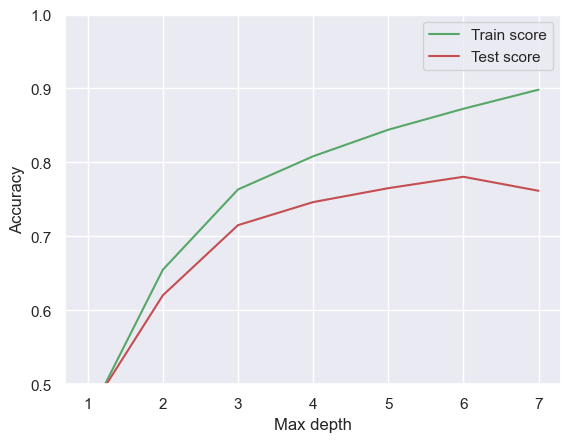

In [597]:
train_scores = []
test_scores = []

for i in range(1, 8):
    model_dtr = DecisionTreeRegressor(max_depth=i)
    model_dtr.fit(X_train, y_train)
    train_acc = model_dtr.score(X_train, y_train)
    train_scores.append(train_acc)
    test_acc = model_dtr.score(X_test, y_test)
    test_scores.append(test_acc)

plt.plot(range(1, 8), train_scores, 'g', label='Train score')
plt.plot(range(1, 8), test_scores, 'r', label='Test score')
plt.ylim((0.5, 1))
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend()

In [598]:
model_dtr = DecisionTreeRegressor(max_depth=3)
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [599]:
model_dtr.score(X_train, y_train) - model_dtr.score(X_test, y_test), model_dtr.score(X_train, y_train), model_dtr.score(X_test, y_test)

(0.04828830713646037, 0.7633678414276399, 0.7150795342911795)

In [600]:
model_dtr = DecisionTreeRegressor(max_depth=2)
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [601]:
model_dtr.score(X_train, y_train) - model_dtr.score(X_test, y_test), model_dtr.score(X_train, y_train), model_dtr.score(X_test, y_test)

(0.03461324877087524, 0.6547802443434998, 0.6201669955726246)

In [602]:
model_dtr = DecisionTreeRegressor(max_depth=3)
model_dtr.fit(X_train, y_train)

cross_val_score(model_dtr, X, y, cv=KFold(10)).mean()

0.6809425574521806

In [603]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [604]:
model_ls = Lasso()
model_ls.fit(X_train, y_train)

Lasso()

In [605]:
model_ls.coef_

array([ 0.,  0.,  0.,  0.,  0., -0.,  0., -0.])

In [606]:
model_ls.score(X_train, y_train), model_ls.score(X_test, y_test)

(0.0, -0.0001348871569470944)

In [607]:
cross_val_score(model_ls, X, y, cv=KFold(10)).mean()

-0.05677514586705627

In [608]:
model_rg = Ridge()
model_rg.fit(X_train, y_train)

Ridge()

In [609]:
model_rg.score(X_train, y_train), model_rg.score(X_test, y_test)

(0.7665349605173768, 0.7617372286962507)

In [610]:
cross_val_score(model_rg, X, y, cv=KFold(10)).mean()

0.7302519873934981

In [611]:
model_el = ElasticNet()
model_el.fit(X_train, y_train)

ElasticNet()

In [612]:
model_el.score(X_train, y_train), model_el.score(X_test, y_test)

(0.15296122073388152, 0.14881473803735368)

In [613]:
cross_val_score(model_el, X, y, cv=KFold(10)).mean()

0.10037437834719169

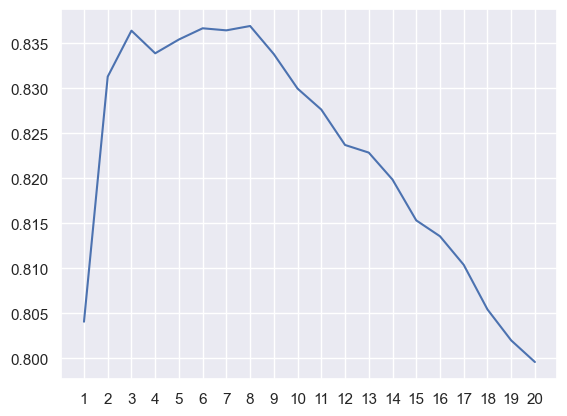

In [614]:
from sklearn.neighbors import KNeighborsRegressor

accuracy = []
for i in range(1, 21):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracy.append(acc)

plt.plot(range(1, 21), accuracy)
plt.xticks(range(1, 21));

In [615]:
model_kn = KNeighborsRegressor(n_neighbors=8)
model_kn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [616]:
model_kn.score(X_train, y_train), model_kn.score(X_test, y_test)

(0.8794886401494748, 0.8369148929197721)

In [617]:
cross_val_score(model_kn, X, y, cv=KFold(10)).mean()

0.670595112860697

In [618]:
cross_val_score(model_kn, X, y, cv=KFold(10))

array([0.83637782, 0.6505676 , 0.70277986, 0.46296387, 0.60767525,
       0.68943584, 0.77662743, 0.46975829, 0.72897346, 0.78079171])

In [619]:
data = {
    'model' : ['LinearRegression', 'DecisionTreeRegressor', 'ElasticNet', 'Ridge', 'Lasso', 'KNeighborsRegressor']
    ,'score' : [cross_val_score(model_lr, X, y, cv=KFold(10)).mean(), cross_val_score(model_dtr, X, y, cv=KFold(10)).mean() ,cross_val_score(model_el, X, y, cv=KFold(10)).mean(), cross_val_score(model_rg, X, y, cv=KFold(10)).mean(), cross_val_score(model_ls, X, y, cv=KFold(10)).mean(), cross_val_score(model_kn, X, y, cv=KFold(10)).mean() ]
    }
result = pd.DataFrame(data)
result

model     score
0       LinearRegression  0.730228
1  DecisionTreeRegressor  0.680943
2             ElasticNet  0.100374
3                  Ridge  0.730252
4                  Lasso -0.056775
5    KNeighborsRegressor  0.670595

In [620]:
df

Country name    year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008.0        3.724               7.370           0.451   
1     Afghanistan  2009.0        4.402               7.540           0.552   
2     Afghanistan  2010.0        4.758               7.647           0.539   
3     Afghanistan  2011.0        3.832               7.620           0.521   
4     Afghanistan  2012.0        3.783               7.705           0.521   
...           ...     ...          ...                 ...             ...   
1944     Zimbabwe  2016.0        3.735               7.984           0.768   
1945     Zimbabwe  2017.0        3.638               8.016           0.754   
1946     Zimbabwe  2018.0        3.616               8.049           0.775   
1947     Zimbabwe  2019.0        2.694               7.950           0.759   
1948     Zimbabwe  2020.0        3.160               7.829           0.717   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                                50.80                         0.718   
1                                51.20                         0.679   
2                                51.60                         0.600   
3                                51.92                         0.496   
4                                52.24                         0.531   
...                                ...                           ...   
1944                             54.40                         0.733   
1945                             55.00                         0.753   
1946                             55.60                         0.763   
1947                             56.20                         0.632   
1948                             56.80                         0.643   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  \
0          0.168                      0.882            0.518            0.258   
1          0.190                      0.850            0.584            0.237   
2          0.121                      0.707            0.618            0.275   
3          0.162                      0.731            0.611            0.267   
4          0.236                      0.776            0.710            0.268   
...          ...                        ...              ...              ...   
1944      -0.095                      0.724            0.738            0.209   
1945      -0.098                      0.751            0.806            0.224   
1946      -0.068                      0.844            0.710            0.212   
1947      -0.064                      0.831            0.716            0.235   
1948      -0.009                      0.789            0.703            0.346   

       Rank    Label  
0     105.0  Unhappy  
1      96.0  Unhappy  
2      84.0  Average  
3     140.0  Unhappy  
4     136.0  Unhappy  
...     ...      ...  
1944  132.0  Unhappy  
1945  139.0  Unhappy  
1946  135.0  Unhappy  
1947  143.0  Unhappy  
1948   95.0  Unhappy  

[1949 rows x 13 columns]

In [621]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Rank', 'Label'],
      dtype='object')

In [622]:
X = df.drop(['Country name', 'year', 'Life Ladder', 'Rank', 'Label'], axis=1)
y = df['Label']

In [623]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [624]:
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
for i in range(1, 21):
    model = KNeighborsClassifier(i)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracy.append(acc)

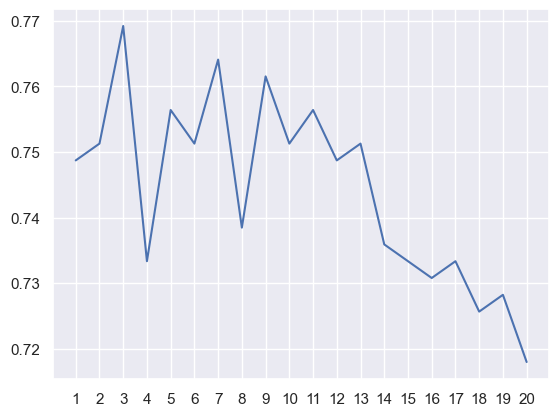

In [625]:
plt.plot(range(1, 21), accuracy)
plt.xticks(range(1, 21));

In [626]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [627]:
model_knn.score(X_train, y_train), model_knn.score(X_test, y_test)

(0.8935214881334188, 0.7692307692307693)

In [651]:
cross_val_score(model_knn, X_test, y_test, cv=KFold(10)).mean()

0.7205128205128205

In [646]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
model_knn = KNeighborsClassifier()

params = {
    'n_neighbors': range(1, 9),
    'algorithm':    ['auto', 'ball_tree', 'kd_tree', 'brute'],
}
grid = RandomizedSearchCV(model_knn, params, cv=5, n_jobs=-1)
grid.fit(X, y)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': range(1, 9)})

In [647]:
grid.best_estimator_, grid.best_score_, grid.best_params_

(KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7),
 0.7259785116340386,
 {'n_neighbors': 7, 'algorithm': 'kd_tree'})

In [648]:
model_knn = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7)

In [649]:
model_knn.score(X_train, y_train), model_knn.score(X_test, y_test)

(0.8422065426555484, 0.764102564102564)

In [650]:
cross_val_score(model_knn, X_test, y_test, cv=KFold(10)).mean()

0.7205128205128205

In [629]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

In [652]:
print(classification_report(y_test, model_knn.predict(X_test)))

              precision    recall  f1-score   support

     Average       0.76      0.85      0.81       224
       Happy       0.81      0.68      0.73        80
     Unhappy       0.73      0.62      0.67        86

    accuracy                           0.76       390
   macro avg       0.77      0.71      0.74       390
weighted avg       0.76      0.76      0.76       390



In [653]:
confusion_matrix(y_test, model_knn.predict(X_test))

array([[191,  13,  20],
       [ 26,  54,   0],
       [ 33,   0,  53]], dtype=int64)

In [636]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
model_dtc = DecisionTreeClassifier()

params = {
    'criterion':    ['gini', 'entropy', 'log_loss'],
    'max_depth':    range(1, 9),
    'min_samples_split' : [2, 5, 10, 15, 20, 30],
}
grid = RandomizedSearchCV(model_dtc, params, cv=5, n_jobs=-1)
grid.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(1, 9),
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              30]})

In [637]:
grid.best_estimator_, grid.best_score_, grid.best_params_

(DecisionTreeClassifier(criterion='log_loss', max_depth=3, min_samples_split=10),
 0.7326820908311912,
 {'min_samples_split': 10, 'max_depth': 3, 'criterion': 'log_loss'})

In [642]:
model_dtc = DecisionTreeClassifier(criterion='log_loss', max_depth=3, min_samples_split=10)
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=3, min_samples_split=10)

In [644]:
model_dtc.score(X_train, y_train), model_dtc.score(X_test, y_test)

(0.7966645285439384, 0.7564102564102564)

In [654]:
cross_val_score(model_dtc, X_test, y_test, cv=KFold(10)).mean()

0.6564102564102565

In [656]:
data = {
    'model' : ['KNeighborsClassifier', 'DecisionTreeClassifier']
    ,'score' : [cross_val_score(model_knn, X, y, cv=KFold(10)).mean(), cross_val_score(model_dtc, X, y, cv=KFold(10)).mean()]
    }
result = pd.DataFrame(data)
result

model     score
0    KNeighborsClassifier  0.728020
1  DecisionTreeClassifier  0.730589